In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [278]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submit=pd.read_csv("sample_submission.csv")

In [279]:
test["is_pass"] = 1
data["label"]=1
test["label"]=0

In [280]:
new_data = pd.concat([data, test])

In [281]:
new_data.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,1


In [282]:
new_data.reset_index(inplace=True)

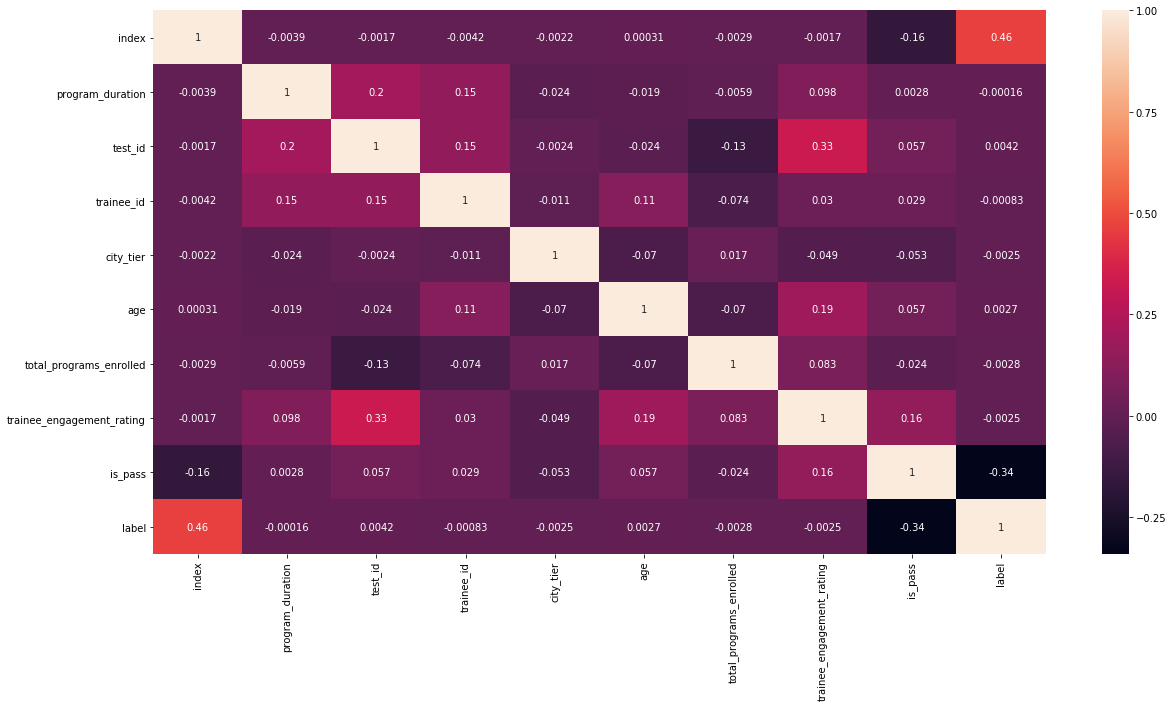

In [283]:
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr(),annot=True)

In [284]:
new_data.drop(['id','program_id','index','test_id','trainee_id','city_tier','test_type','is_handicapped'],axis=1, inplace=True)

In [285]:
new_data.shape

(104496, 10)

In [286]:
new_data.head(3)

,program_type,program_duration,difficulty_level,gender,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label
0,Y,136,intermediate,M,Matriculation,24.0,5,1.0,0,1
1,T,131,easy,F,High School Diploma,26.0,2,3.0,1,1
2,Z,120,easy,M,Matriculation,40.0,1,2.0,1,1


In [287]:
new_data.program_type.value_counts()

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

In [288]:
# g = new_data.groupby([new_data.program_type,new_data.is_pass])

In [289]:
# g.first()

In [290]:
dummy=pd.get_dummies(new_data.program_type)

In [291]:
new_data= pd.concat([new_data, dummy],axis=1)

In [292]:
new_data.head(2)

,program_type,program_duration,difficulty_level,gender,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label,S,T,U,V,X,Y,Z
0,Y,136,intermediate,M,Matriculation,24.0,5,1.0,0,1,0,0,0,0,0,1,0
1,T,131,easy,F,High School Diploma,26.0,2,3.0,1,1,0,1,0,0,0,0,0


In [293]:
new_data.drop(['program_type','Z'],axis=1,inplace=True)

In [294]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [295]:
new_data.gender=le.fit_transform(new_data.gender)
new_data.difficulty_level=le.fit_transform(new_data.difficulty_level)
new_data.education=le.fit_transform(new_data.education)

In [296]:
new_data.head(3)

,program_duration,difficulty_level,gender,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label,S,T,U,V,X,Y
0,136,2,1,3,24.0,5,1.0,0,1,0,0,0,0,0,1
1,131,0,0,1,26.0,2,3.0,1,1,0,1,0,0,0,0
2,120,0,1,3,40.0,1,2.0,1,1,0,0,0,0,0,0


In [297]:
new_data.isnull().sum()

program_duration                 0
difficulty_level                 0
gender                           0
education                        0
age                          39520
total_programs_enrolled          0
trainee_engagement_rating      108
is_pass                          0
label                            0
S                                0
T                                0
U                                0
V                                0
X                                0
Y                                0
dtype: int64

In [298]:
# new_data.program_duration = np.log(new_data.program_duration)
# new_data.age = np.log(new_data.age)

In [299]:
new_data.trainee_engagement_rating.fillna(3,inplace=True)
new_data.age.fillna(42, inplace=True)

In [301]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# new_data.program_duration = sc.fit_transform(new_data.program_duration)
new_data.age = new_data.age/max(new_data.age)

In [302]:
new_data.drop(['program_duration'],axis=1, inplace=True)

In [303]:
data1 = new_data[new_data.label==1]

test1 = new_data[new_data.label == 0]

In [304]:
p=data1.pop('label')
test1.drop(['is_pass','label'],axis=1,inplace=True)

In [305]:

print(data.shape)
print(data1.shape)

(73147, 17)
(73147, 13)


In [306]:
print(test.shape)
print(test1.shape)

(31349, 17)
(31349, 12)


In [307]:
test1.reset_index(inplace=True)

In [308]:
p = test1.pop('index')

In [309]:
data1.head()

,difficulty_level,gender,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass,S,T,U,V,X,Y
0,2,1,3,0.380952,5,1.0,0,0,0,0,0,0,1
1,0,0,1,0.412698,2,3.0,1,0,1,0,0,0,0
2,0,1,3,0.634921,1,2.0,1,0,0,0,0,0,0
3,0,0,3,0.666667,4,1.0,1,0,1,0,0,0,0
4,2,0,1,0.666667,2,4.0,1,0,0,0,1,0,0


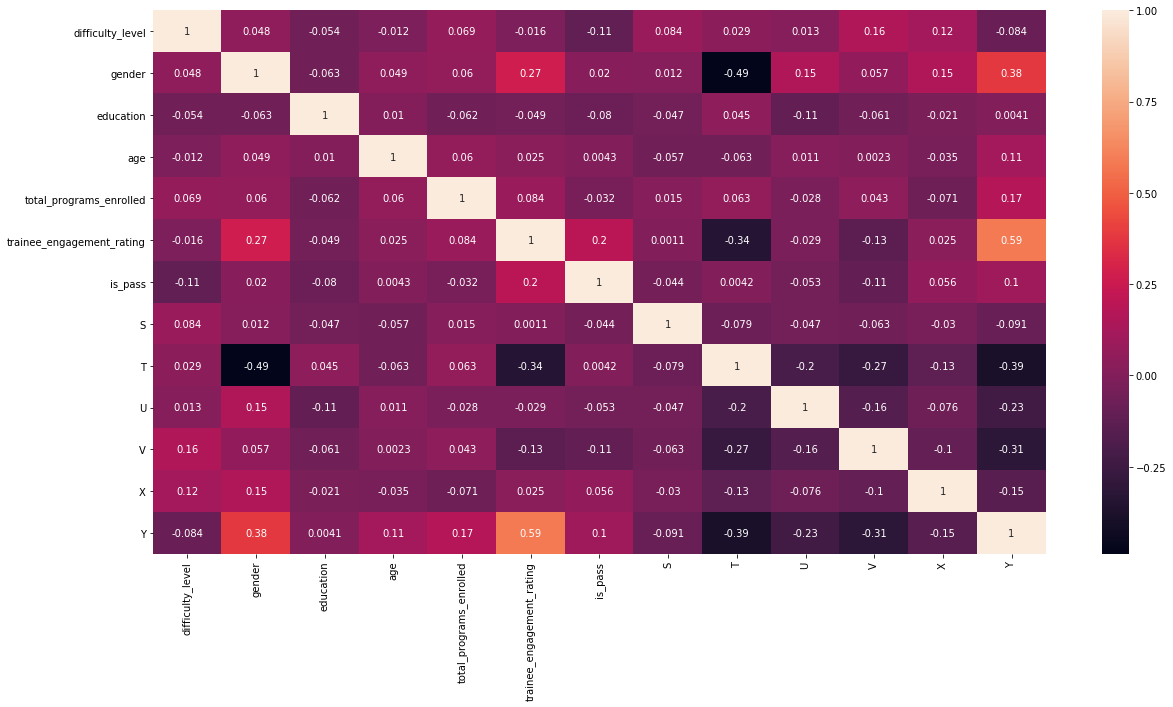

In [255]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(),annot=True)

In [310]:
x = data1.drop('is_pass',axis=1)
y = data1.is_pass

In [311]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

LR: 0.672287 (0.006824)
LDA: 0.671977 (0.006735)
KNN: 0.648578 (0.006032)
CART: 0.671653 (0.005573)
NB: 0.641929 (0.006910)


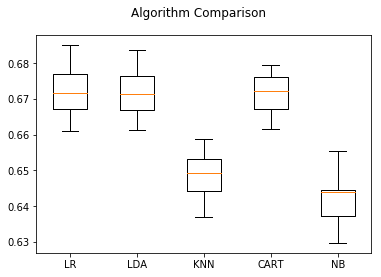

In [312]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare cdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJUAAALDCAYAAACsMzEOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzs3Xd4VEXfxvHvbApJSEISWkIPTbqhoyAElaAoRUGBBxHbo2AviIgCFlREbI+ogKJiAxVREVFApVkQMTQB6QQCCS2dhNTz/rFLTFslkGyyvPfnunLJnjN7MjNOOZn9nVljWRYiIiIiIiIiIiKlYavoDIiIiIiIiIiIiPvRopKIiIiIiIiIiJSaFpVERERERERERKTUtKgkIiIiIiIiIiKlpkUlEREREREREREpNS0qiYiIiIiIiIhIqWlRSURERERERETEDRhj3jHGHDXG/OnkvDHG/M8Ys9sYs9kY06HAuVHGmF2On1FlkR8tKomIiIiIiIiIuIf3gCv+4fyVQDPHz+3AmwDGmBBgMtAV6AJMNsYEn2tmtKgkIiIiIiIiIuIGLMtaDST8Q5KBwPuW3VogyBgTBvQFlluWlWBZViKwnH9enDojnud6AZF/k318r1XReahM3ugwqaKzUOnE2HIqOguVjj8eFZ2FSiU011R0FiqdeA8NrUXFklnRWahULsrxqegsVDrJ+ji1mGwNr4W0ysyr6CxUOmk2dZyifvbOqugsVDpv7P/0vB5NXPk3rXfNJndgjzA6bbZlWbNLcYm6wMECr2Mdx5wdPydaVBIRERERERERqQQcC0ilWUQqqqQFPusfjp8TLTuLiIiIiIiIiJwfYoH6BV7XAw7/w/FzokUlERERERERERFn8nJd93PuFgE3Or4FrhuQbFlWHLAUiDLGBDs26I5yHDsnevxNRERERERERMQNGGPmAZFADWNMLPZvdPMCsCxrJrAE6AfsBtKBmx3nEowxTwO/Oy71lGVZ/7Th9xnRopKIiIiIiIiIiDNW5dnE37Ks4f9y3gLucnLuHeCdssyPHn8TEREREREREZFSU6SSiIiIiIiIiIgzeZUnUqmyUaSSiIiIiIiIiIiUmiKVREREREREREScsCrRnkqVjSKVRERERERERESk1BSpJCIiIiIiIiLijPZUckqRSiIiIiIiIiIiUmpaVBIRERERERERkVLT428iIiIiIiIiIs5oo26nFKkkIiIiIiIiIiKlpkglERERERERERFn8nIrOgeVlhaV5Lz3+LMvsfrndYQEB/HlhzMrOjvlqmGvdvR6YiTGw8bW+StZ/8bXhc57eHsS9fJoarUN51RiKkvumkFq7PH88wF1qnPDD8/z28sLiZ69BID2t15B6+GRWJbFib9iWT52NrmZ2S4t17m4ZvIoWvZuT1ZGJvPGvsmhrfuLpanXJpzh08fg5ePN9hUb+OLJuQD0vX8I3YZdSlpCCgBLps1n+8qN+e8LqlOdR5a/yNJXFrDyrcUuKU9Z6Df5Rpr1vpDsjCy+GDuLuBLqJKxNI66dPhpPHy92rdjEkiffB6B1vy70vn8wNZrWYfbASRzesg+AJj3a0OeRYXh4eZKbncPSZz9m36/bXFmss1I/sh09nhiJzcPGtnkr2VCkz9i8Pbn8ldHUdPSZZXf+3Weqt6hPr6m34O3vi2VZLLh6ErmZ2TTt35WO9wzE2GzE/LiRX5+dXxFFOyfl0UYAareoz4Bnb6WKvy9WnsWsgRPJcaPx5LT/TL6Ftr3bk5WRxZyxMziwdV+xNNeOHc7F1/bCr1pV7mw9Mv948y4tGT7pZuq1aMjMe17mj2/XujLrZaZeZDsuetI+3+yYt5JNrxfvO5GvjKZGu3AyE1P5YcwM0mKPYzw96PnCbdRo2wjjYWPXgp8KvdfYDIOWPE16fCJLb3rR1cU6a416teNSx/y7Zf5K1pUw/1758mhqO8aSr++aQUrscRpe0oZLxg/NHztXPTOPg7/Yx84L+nel290DMR429v64kdVuNpY07tWOyyfbx9eN81ey9s3idXL1S6MJaxtORmIqX949g+TY4/gG+XPNzHsJa9eYLQtWs2zS+/nvGTp3HFVrVcPm6cHBdTtYNvE9rDzL1UUrE7V6t6Pt0zeCh40DH61g14zC9VO9WwvaPDWSwFYNWD/6NeIWr8s/51u3OhEv/hffOtUBi19HTCPj4HHcWVhkOzo9PRJjs7F73kq2FamPWl0voONTIwlqWZ+fxszg4De/AxDcugGdn7sZrwBfrNw8tv7vK2IW/VYRRSgz102+mda925Odkcn7Y9/gYAlzTP024dw4/S68fLzZumIDnz35LgD1WjVk+DP/xbOKN3k5ucyf+DYxm/bkv69huyY8/MUzzLn7ZTZ86971JJWHHn+T896gfn2Y+dKUis5GuTM2Q+SUUXw5ahofXDaO5gO6EdKsTqE0rYdGkpl8krk9H2LD29/R49Fhhc73nDSCmJWb8l9XrR3MhTdHMe+qiXzU51GMh43m/bu5pDxloWVkBDXCw3g28n4+m/AWQ565rcR0Q6bcyqcT3uLZyPupER5Gi8iI/HOr5izhxX7jebHf+EILSgCDJt5Y7Fhl1yzyQqqHh/Jq5EMsmjCH/s/cXGK6/lNuYdGEt3k18iGqh4fSLPJCAI7siGXe6FeIWfdXofQnE1P56NbpvH7FeBY+NJPBL48p97KcK2Mz9Jwyim9unMa8S8fRbGA3gov0mZbDIslMOslHlzzEpre/46IJ9j5jPGxc/r8xrHr0XeZfPp4vr3uGvOwcqgT5c9Fjw/lq2HPMv3w8vjWqUbd764oo3lkrrzZi87Ax+OU7WfTYO8yIeoR3hk0hNzun3MtT1tpGtqd2eBiPRt7D3AkzufGZ20tMt/GH9Tw9cHyx4ycOH2fO2Nf57aufyjur5cbYDN2njOK7kdNY0HscTQZ2I6hI37lgWCRZySf5tMdDbHnrO7o4+k7jq7vg4e3J55c/yhdXTqTlDZfiX69G/vva3HoFSbsPu7Q858rYDJdPGcXno6bx7mXjaDGgG9WL1EfboZGcSj7JnJ4Psf7t7+jpmH8zElL54pYXmRv1KN89MIt+r4wGwCfIn14ThvPp8Od47/LxVK1RjQZuNJYYmyHq6VF8Omoasy8fR6sS6uRCR53M7PUQ6+Z8R+R4e53kZGazevoCfnzm42LX/eKu13jnysd4u894/KoH0OKqri4pT5mzGdo9dzO//mcaP/Z8mLrXXExA87qFkqQfOs6G+2Zy6Itfir29w2tj2P3GYn7s+TCrrphI1vEUV+W8XBibofOzo1gxYhqLI8fRaGA3Aou0l5OHTvDr/bPYX6Q+cjKy+PW+mXzTezwrRkyj45Mj8Qr0c2X2y1TryPbUCg/lich7+WjCbIY5uXcdPuW/fDxhFk9E3kut8FBaOe5drxl/A9+8uoDn+o1j8Uufcs2jN+S/x9gMg8aPYNtq97p3rTSsPNf9uBktKp0lY8wTxpixxpinjDGXO45dYozZaozZaIzxNca84Hj9gjFmtDHmxrP8XSuNMZ0c/55wltdoZIz582ze68prlodOEW2pFhhQ0dkod7UjmpC8/wgpB46Rl53Lzq/X0jiqY6E0jaM6sG3BGgB2LVlH/QI3qI2jOpJ84Bgndh4q9B6bpweePt4YDxtevt6cPJJY/oUpI22iOrF+4WoAYjbsxjfAj4CaQYXSBNQMokqALzHRuwBYv3A1baM6ndG1Txw4ypFdsWWf8XLUIqojGxfa20Dsht34BPjhX6RO/B11cjB6NwAbF66hhaMtHd9zmBN744pdN35rDKlHkwA4ujMWzypeeHhX7mDYWkX6zO5Fawkv0mfCozrwl6PP7PlmXf4CUf2ebTmx/SAnth8AIDMpDSvPolrDWiTtjedUQioAsT/9SZN+nV1YqnNXXm2kySVtOfLXAY446izDUWfupn1UZ35ZuBKAvRt24RfgR7Ui9XP6XPKxpGLHT8QeI/avGPLc8KbxtJoRTUjZf4RUR9/Z89VaGhbpO42iOrDzM3s72vfNOur2cMw3Fnj6VcF42PD08SYvO4fstAwAqoaFUP+yCHZ8vNKFpTl3oRFNSNx/hGRHffz19VqaFKmPJlEd2OoYS3YuWZe/QHR0awwnj9jbyfECY2dQg1ok7osnwzGWxPz0J82vdJ+xpI6jTpIO2utk+9drad6ncJ0069OBPz+318lfS9bRyFEn2RmZxK7fWWIUY5ajrdg8PfDw8gTL/cYQgOD2TTm57wjpB45iZedy6MtfCe1buH4yDh4nZftBrLzCY0VA87oYDw+OrbbfguemZ5KbkeWyvJeH6u2bkLr/CGmOPhTz1VrqF6mPk7HHSdp+sNi8kbo3ntR9RwDIOJLEqePJ+FR33/v+dlGd+M1x77p/wy78AqoSWGSOCawZhE+AL/sc966/LVzNhVH28cHCwtffFwDfQD+SC9y3R950JRu+/Y3UE+69CCmVjxaVzpFlWZMsy/re8XIEMN2yrAjLsjKAO4AOlmU9bFnWTMuy3nd+pTN2VotKcv7zDw0m9XBC/uu0uAT8awcXSlM1NJg0RxorN4/M1HR8gv3x9K1CpzFX89srCwulP3kkkejZS7hl7avctn4GmSnpHFhT6dcR8wXWDiHp8In810nxCVQLDSmUplpoCMlxf9dbUlwCgbX/TtNjVF/Gfvs8Q6fdgW9gVQC8fatw6egBLH11QTmXoOwF1g4huUCdpMQnEBhauJ0EhgaTUqBOUorUyb9pdWUX4rbGkJtVuaNQCvYHsPeZqqH/3GeyHH0mqHEolmVx9YfjuG7JFCJGXwVA8v54gpvWIaBeDYyHjfC+HfEPO/O6qwzKq43UaByGZcGN7z/C6MVT6HHH1WWbcRcJrl2dhAL1kxCfQHBo9QrMketVDQsmrcD//5PxCVQNK9xG/EKDORlXoO+kpFMl2J+936wjJz2TEdEzGL7uFTbPWkJm0kkAuj1xA+uemYflZgsFASXMvwFF5t+CaU6PJb7B/oXSNO/XmaOOsTMxJp6QJnUIdIwlTaM6ElDHfcYS/yJjRGpcAgGhxeskpcg9SdE6KcnQ98dxb/QbZJ08xV9L1v1r+srIJyyYjALjSEZcAj5nOFdUbRxGdspJOs+5n17Ln6XVpP+AzZRXVl3CNzSY9AJ9KD0uAd8iY8qZqB7RGJu3J6n7j5Zl9lwqqHYIiYf/fpQxMf4EQUXuXYNCQ0iK+7v9JMadIMgxBy94ci7XPDqSZ355g2snjOSrafaIv2q1g4no24U1Hy1zQSnOU3l5rvtxM1pUKgVjzGPGmB3GmO+BCxzH3jPGDDHG3AZcD0wyxnxkjFkEVAV+M8YMPR3Z5HhPU2PM98aYTcaYaGNME2NMpDFmcYHfNcMYc1OR3z8V8HVEQn1kjHnaGHNfgfPPGGPuPYNyeDiip343xmw2xtzhOP6JMaZfgXTvGWMGO0v/L7/jdmPMemPM+rffn/dvyaUsmOI3FEXvy00JabCg24PXsmHOd2SnZxY6VaWaH437dOC97g8wp/M9ePlV4YJrupdlrstVScUtWin/lObnD5fzTM97ebHfeFKOJjHgcXsIcd8HrmPVnCVkFakvd1BiEyjeUEpKdEbXr9msLlHjh7FowpyzyJ1rldQfilUFJaexeXoQ1rk539/zBl9c+xSNr+hE3e6tyUxOZ9WEd4l6426u+XwiqbHHyct1r5uD8mojNg8bDTs3Z8F9rzNnyFO07NuJxhe7z+M8+c6kfs57Jc8lhVI4mW9qRTTGysvjo473MP+iB2l7ez8CGtSkwWURnDqewvEt+8slx+XqDMaSf0tTvXldej46jGWPvgNAZnI6yx97l/6v383wBRNJiT1OXo77jCXOxs7Cif69HZXkkxun8Vrnu/Hw9qShO44hOOsfZzaOGE8b1bu2YOuTH7P6isep2qAWDYb2KuMcupaz8aI0fGoFcfFrY/j1gdluG8EGzu5Nit67Oq+vS26IYsHTc3ns4jtZ8PRcbnje/kjtdZNu4oupH7llhLBUfpX72YRKxBjTERgGtMdeb9HAH6fPW5b1tjGmB7DYsqwFjvekWZYV4fj3EwUu9xEw1bKsL4wxPtgX9+r/Wx4syxpvjLm7wDUbAQuBV40xNkf+upxBcW4Fki3L6myMqQL8bIxZBswHhgJLjDHewGXAmH9I73RUsixrNjAbIPv4Xo1eLpAWl1DoU0z/sBBOHk0slsa/Tghp8QkYDxtVAvw4lZRGaPumNOvXhR6PDqNKoB+WZZGTmU368WRSDh7LD7/f/d166nRsxo4vfnZp2Uqj+8goug2/FICDm/YQVOfvCIKg0JBCYcBgj0yqVuDTwaCwEFIc9ZZ2PDn/+Nr5P3LbnHEANIxoyoX9utL/0RH4Bvph5dnr66f3l5Zbuc5Fl5F96Di8NwCHNu2lWoE6CQwNIfVI4Ud0UuISCCxQJ4EF6uSfBIaGMHzWAyx8cCaJByr/p4Sn+8Np/mEhpBdpH2nx9jQnHX3GO8CPzKQ00uISOPzbX5xKTAMgZsUmarZpxKGftxLz/QZivt8AQKv/9MZyg0UlV7SR5PgE9v/2F+mOOtu5YiNhbRqx95etZVWMcnPpyCvoOfwyAPZt2kNIgfoJCQ0h6UiCs7eel07GJRSKwKsaGsLJ+MRiaaqGhXAyztF3Au19p8mgizm4cjNWTi6nTqRw5Ped1GzXmOptGtIgqgP1L70QjypeeAf4Evm/May8901XF6/UUkuYf9OK9IfTadIKjCWnkux9wT80hIGz72fJAzNJjvl77Nz7/Qb2OsaSdv/pTZ4bfXqdGl94jAgICyHtSPE6CawTQmqBe5IMR538m9zMbHYv30DzqA7s/8l9IqhPyzic4Nhk2843LIRT8We2vcCpwwkk/7mfdMc8G/fdekI6NuWAG3+Gmx6XgF+BPuQXFkLGGdYHgKe/L70/GMum5z/jRPSef39DJdNzZF+6O+aYmE17CK5TA9gBQHBo9WL3rolxJwgK+7v9BIdVJ+mofR7qNrhX/qbd0d/8yoip9liABu2acOtr9liEqsGBtIlsT15uHpuW/V6uZTufWG782Hp5U6TSmbsE+MKyrHTLslKARWdzEWNMAFDXsqwvACzLOmVZVvrZXMuyrP3ACWNMeyAK2GBZ1ol/fhc40t5ojNkI/AZUB5oB3wKXOhaOrgRWOx7jc5ZeKpEjm/YSFB5KYP2a2Lw8aN6/G3uXRxdKs3d5NK2GXAJAs35d8r9hZsGQp3m3+wO82/0BNryzlN9nLGLz3OWkHjpBaIemePp4A1C/e2sSdhfec6my+fmDZfkba29Ztp5O1/YEoGH7ppxKTSe1yB4nqceSyEw7RcP2TQHodG1P/ly2HqDQ/ktt+3YmfudBAGZc/wRTetzDlB73sPqdb/n+9S8r7YISwLoPlvNmvwm82W8Cfy1bT8S19jZQr31TTqVmkFakTtKOJZGVlkE9R51EXHsJfy37o9h1C/IJ9OOGd8fy/bRPOPDHzvIpSBk7umkv1RqFEuDoM00HdGNfkT6zf3k0LRx9pslVXTj0s73PHFy1meotGuTvN1anawsSd9n7hm/1QMAe6dfmxsvZNm+l6wp1llzRRnav2kztFvXx8vHG5mGjUdeWHNtVuceT03784Due6PcwT/R7mA3L1nHxtZEANG7fjPTU9BL3TjqfHdu0l8Dwv/tOk4HdOFCk78Qsj6b5dfZ2FH5VFw47+s7Jwyeo44gu8fStQq0OTUnac5jfp37KvM73Mv+iB/jxrtc5/PM2t1hQAojftJfg8FCqOeqjRf9u7ClSH3uWR9PaMZY0LzD/Vgn049r3HmLN859yeP2uQu/xKzCWRIy8nC1uMJacdrhInbTs341dRepk1/fRtBlsr5MW/boQ88s/f2Ool18Vqtayz8vGw0bj3hdyYk/x/dvcQdLGPVRtHIpfg5oYLw/qDrqI+H8ZQ09L3LgHr2pV8XbsG1SzR2tSd7rHWOrMiY17CQgPpaqjvTQc2I3YZdH//kbA5uVBrzn3s/ezNRxY7J6PQ67+YCnP9RvHc/3GsXnZOro67l0btW9GRmo6KUXmmJRjSWSmZdCovf3Psa7X9mSz4941+WgCzbq1AuCCi9twbH88AJMuuZuJPew/G75dy/yJb2tBScqMIpVKpywibpw99JxD4UU+nzO83tvATUAo8E4p8nCPZVnF/go2xqwE+mKPWJr3T+kdkVKV3sOTp/L7hs0kJaVw2aAbuPPWkQzu37eis1XmrNw8Vk6cy6APxmE8bGz7ZBUJOw/R7cHBHNmyj33Lo9n6ySr6vjKaUatf5FRSGt/ePeMfr3lk4x52L1nH8CVTyMvN5djWGP78eIWLSnTutq/YQMveEUxY9SrZGZnMe3hm/rmHlkzlxX72b2Za8Pgchk8fg5ePN3+t3Jj/jW79Hx1B3VYNsSyLhNhjfDbh7QopR1nauWIjzXpHcP+ql+xfF//wrPxzY5Y8y5v97Nu2ff34u1wz/Q68fLzZtXITuxzfCtiybyf6PTGKqiEB3PDOw8Rvj+H9G5+n641RhDSsTa97r6HXvdcA8P7IqZysxJtBWrl5rJk4l/4f2vvMX5+sInHnITo/NJhjm/exf3k02+ev4rJXRjNijb3PLL/L3mcyk9PZ9Na3DFn8FBYWB37cRMyP9nbT48mRVG/ZAID1r35B8r74Civj2SivNnIqJZ1f3v6WOxY9jWVZ7FqxiZ0r3O8baDaviKZd7w5MXTWDrIxM3nn4jfxzTyx5gSf6PQzAdeNvoOvAS/D2rcL0X2ex5pMf+OqVT2nUrgl3zxpH1WpVibisE4MeGMrEqAcqqjhnxcrN45eJc7nyo3EYm40djr7Tcexgjm3ax4Hl0eyYv4rIV0dz/U8vkpmUxo932vvO1veW0+ul2xnyw1Qwhp2friZh+8EKLtG5sXLz+GHiXAZ/MA6bh40tn6zixM5DdH9wMPFb9rFneTRbPllFv1dGc6tj/l3smH/bj+pDcKPaXHTvIC66dxAAC254nvQTKfR+YiS1WtnHkl9e+YJENxpLrNw8lk+ay7D37ePr5k9XcXzXIS55cDBxm/ex+/toNn2yiv4vj2b0qhfJSErjqwL3JGN+epkqAb54eHnSLKoT80dOJSMxjevefhAPb0+Mh42YX7YR/eEPFVjKs2fl5rF5wntcNG88xsPGgXkrSd1xiBbjhpC0cS/xy6IJimhMl3cewCuoKqF9OtDi4SGs6DUO8iy2PvkRF3/2GMZA0uZ97P/wx4ou0jmxcvNY/9hcLv3Y3l72zF9F8s5DtHt4MCc27ePQsmhCLmxMrzn34x3kR70+7Wk3djDf9B5Pg/7dqNXtArxD/Gk81L4Ys/b+WSRuPVDBpTo7f67YQOveHXhy1f/IysjigwJzzKNLpvFcP3vU/LzH3+bG6Xfi5ePN1pUb2brSHtX40fhZXDf5ZmyeNrIzs/no0Vkl/h45C24ULepq5v/fPgBnxxjTAXgP6Mrfj7/NAtrgeOTNGPMexR9/83f8+wkgzbKs6caYtdgff/vSERXkgT36Zw32vZp8gI3Ak5ZlvedY6BlrWdZ6Y0wiUMuyrGzHdb2BLYAX0MyyrFwn+W/kyFsbY8ztQD/gOsuyso0xzYFDlmWdNMZcBdwGdAKaWJaV5Sw9UPP0Nf+p7vT4W2FvdJhU0VmodGJslXtD54rgj0dFZ6FSCc11701Iy0O8h4bWomJxv33OytNFOWf6+dT/H8mK0S8mW8NrIa0y9YdjUWk2dZyifvZ272/cKw9v7P/0vB5NMnf94rIbryrNLnarulSk0hmyLCvaGPMJ9sWeGOwLQGdrJDDLGPMUkI19sWavMeZTYDOwC9jg5L2zgc3GmGjLskY4Fn1WAEnOFpRK8DbQCIg29p3ejgGDHOeWAe8DiyzLyjqD9CIiIiIiIiLnL+2p5JQildycY4PuaOwLU7v+LX1FUKRSYYpUKk6RSsUpUqkwRSoVp0il4hSpVJgilYpTpFJxilQqTJFKxSlSqThFKhV33kcq7fzJdZFKzXu4VV0qUsmNGWNaAYuxbyBeKReURERERERERNxa3pk+FPT/jxaV3JhlWduAxgWPGWPaAh8USZppWVZXl2VMRERERERERM57WlQ6z1iWtQWIqOh8iIiIiIiIiMj5TYtKIiIiIiIiIiLOaKNup7TrmoiIiIiIiIiIlJoilUREREREREREnMlTpJIzilQSEREREREREZFSU6SSiIiIiIiIiIgz2lPJKUUqiYiIiIiIiIhIqSlSSURERERERETEGe2p5JQilUREREREREREpNQUqSQiIiIiIiIi4oRl5VZ0FiotRSqJiIiIiIiIiEipKVJJRERERERERMQZffubU1pUknL3RodJFZ2FSuXO6KcqOguVzrhOEyo6C5VO9TxT0VmoVDSNF3dNXlpFZ6HSWWoCKjoLlcpxj4rOQeUzMW5FRWeh0lkQ0quis1CpHPDSgxxF1c/WLFzUY2HHKzoLIpWGFpVERERERERERJzRt785paV4EREREREREREpNUUqiYiIiIiIiIg4oz2VnFKkkoiIiIiIiIiIlJoWlUREREREREREpNT0+JuIiIiIiIiIiDN5uRWdg0pLkUoiIiIiIiIiIlJqilQSEREREREREXFGG3U7pUglEREREREREREpNUUqiYiIiIiIiIg4k6dIJWcUqSQiIiIiIiIiIqWmSCUREREREREREWe0p5JTilQSEREREREREZFSU6SSiIiIiIiIiIgz2lPJKUUqiYiIiIiIiIhIqSlSSURERERERETEGUUqOaVFJXFbDXu1o9cTIzEeNrbOX8n6N74udN7D25Ool0dTq204pxJTWXLXDFJjj+efD6hTnRt+eJ7fXl5I9OwlALS/9QpaD4/EsixO/BXL8rGzyc3Mdmm5XOHxZ19i9c/rCAkO4ssPZ1Z0dsrVNZNH0bJ3e7IzMpk39k1it+4vlqZem3CGTx+Dl48321ds4Isn5+afu2RUX3rc2Je83Fy2/biBr6d+TIMLm3D9c/+1JzCGpa8sYMvS311UonNTHv0m4pa+tB4eiTGGP+etYOOcpS4tU1lqENmOSxz1s23eSqKL1I/N25M+r4wAjPv2AAAgAElEQVSmpqN+lt75d/1Ub1Gf3lNvwcvfFyyLT6+e5PbjR0Cv9tR74r8YDxsn5i/nyBufFzpf87YBVB8eBTm55CQkEzP2NbIPHcP/orbUnXRLfjqfJvXYf/d0kpf95uoilLnwXu24fPJIbB42Ns1fydo3i/ehq18aTWjbcDISU/nq7hkkxx6nUY82RI4fis3Lk7zsHFY8O4+YX7ZVUCnOXeMC9bDxH+ohzFEPXzrqwTfIn2tm3ktYu8ZsWbCaZZPeB8DTx5tr3ryX4Aa1yMvLY/f3G1j5/CcVUbQy8fJLT3HlFZeSnpHBrbc+wIaNfzpN+8XCdwkPb0BE+8sAaNeuFW/MmEpVfz9iYmIZeePdpKamuSrr5aJW73a0ffpGjIeNmI9WsGtG4fZSvVsL2j41ksBWDVg/+jUOL16Xf27goQ9J2X4AgPRDJ/ht1IsuzXtZahDZjp4F5pg/SphjogrMMd855piAejW4YcU0EvfEARAfvZuVE97Fq6oPgz+fmP9+/7AQdiz8mTVPfujScpUFtZHiqnTrTLX778Z42Di5aAlpH8wrdN7vmv74Dx6IlZuHlZFB0tSXyNkfAx4eBE8Yi9cFzcDDg/Rvl5H2/jwnv0Xk3GlRSYoxxrwHLLYsa0FF58UZYzNEThnFFyOmkhaXwLCvn2Lv8j9I2HU4P03roZFkJp9kbs+HaN6/Gz0eHca3d83IP99z0ghiVm7Kf121djAX3hzFB5c9Qm5mNle+cQ/N+3dj+4I1Li2bKwzq14f/DB7AhKenV3RWylXLyAhqhofxbOT9NGzflCHP3MYrgx4vlm7IlFv5dMJbxETv4vb3xtMiMoK/Vm6k6UWtaNOnE9OuHEduVg7+1QMBiNtxkJf6TyAvN4/AmkGM/fZ5tn7/B3m5lfsTjPLoN9Wb16P18Eg+6T+Z3OwcBn0wjv0/bCRp/xGXlq0sGJuh15RRfPUfe/1cv/gp9i3/g8QC9dNqWCSZSSf58JKHaDagGxdPGMbSO2dgPGz0+d8Ylt83kxPbD+AT5E9edk4FlqYM2GzUn3IHu0dMJjvuBBd8PZ3k5es4tetgfpKMrfvYcdWDWKeyqHHDFdSdcBP773qBtF+3sOPKBwDwqOZPqzUzSVm9oaJKUmaMzRD19Cjmj5hKanwCNy16il3f/8GJAm2k3dBITiWfZFavh2jZvxuR44fx1d0zyEhMZcEtL5J2NIkazesx9INxvN713goszdkrWA8pTurhQkc9zCxSDzmZ2ayevoCaF9Sj5gX1Cl33t9nfcODX7di8PPjPxxNoHNmOvSs3u7p45+zKKy6lWdNwWrTqQdcuHXh9xnNc3KN/iWkHDbqStLSThY7NmvkCjzzyNKvXrOWmUUMZ+9AYJj/xgiuyXj5shgufu5mfr3+OjLgTRH43hfhl0aTuPJSfJOPQcaLvm0nTO68u9vbcU1msuHyCK3NcLk7PwV865pihi+1zcME5pvWwSE4lneQDxxzTfcIwvrvTPgcnxxxh/hWPFbpm9slThY4N/eZp9nznHh9yFaI2UpzNRtBD93H8vofJPXqMWu+8yak1v9gXjRwylv5A+hf2xTefHhdT7b4xnHhgPL6X9QIvL47ecBumShVqzXuXjGU/khvvfvdmlYll5VZ0Fiot7akk58wY4/LFydoRTUjef4SUA8fIy85l59draRzVsVCaxlEd2OZYENq1ZB31u7cucK4jyQeOcaLAZAVg8/TA08cb42HDy9ebk0cSy78wFaBTRFuqBQZUdDbKXZuoTvy+cDUAMRt24xvgR2DNoEJpAmsG4RPgS0z0LgB+X7iatlGdAOg+og8/vPkVuVn2xYG0EykAZJ/Kyl9A8qziBZblkvKcq/LoN8HN6hAfvYecU1lYuXkcWvsXTa7o5JoClbGi9bNrUcn185ejfnZ/s456jvpp0LMtJ7Yf5ITjk9JTSWlYee7RLpzxi2hG5v54sg4cwcrOIfHrNVSL6lIoTdqvW7BOZQFwcsMOvMKqF7tO0FUXk7IiOj+dOwuLaELi/iMkH7S3kW1fr6VZn8JtpFmfDmz53N5G/lqyjoaONnJkawxpR5MAOL4zFs8qXnh4u+dne3Uc9ZDkqIftX6+leQn18GeBemjkqIfsjExi1+8kp0gUX86pLA78uh2AvOxc4v/cT0BoiAtKU/b69+/LBx/ZP5f7bV001YKqERpaq1i6qlX9eOC+23n2uVcLHb+geRNWr1kLwPc/rOGaa/qVf6bLUXD7pqTtO0L6gaNY2bnEfvkroX0Lt5f0g8dJ2X7wvH68pHZEE5IKzsElzDHhTuaYM1GtUW18awRy+LcdZZpvV1AbKc67VQtyYg+RezgOcnJI//5HfHpeXCiNlZ6e/2/j6/P3/agFxtcXPGyYKlUgO5u8AmlFypoWldycMWaiMeYvY8xyY8w8Y8xYY0wTY8x3xpg/jDFrjDEtHGnfM8b8zxjzizFmrzFmiOO4McbMMMZsM8Z8A9QqcP2OxphVjmstNcaEOY6vNMY8a4xZBdzn6nL7hwaTejgh/3VaXAL+tYMLpakaGkyaI42Vm0dmajo+wf54+lah05ir+e2VhYXSnzySSPTsJdyy9lVuWz+DzJR0DqxxHq4ulV+12iEkHT6R/zopPoFqRf5IqRYaQnLc320pOS6BarXtaWo2DqNxlxbc/+UU7vpkEvXbNc5P1yCiKY8se4FxS1/gs8fnVPooJSiffnNiRyx1u16AT5A/nj7eNOp9If4lLCy4g6ol1E/V0OL1k1qgfrIc9RPUOBTLshjw4TiuXzKF9qOvcmney4N3aHWyDv/96GNW3Am8ajv/f1t9aB9SVvxR7Hhw/0tIXLS6XPLoagGhwaQWGC9S4xIIKNJGAoq0kczUdHyD/QuluaBfZ45sjclfsHY3/qHBpJxBPaT8Sz04UyXQj6aXtyfm561ll2kXqlsnlNiDf0efHIqNo26d0GLpnnpiHC+9Mov09IxCx7du3UH//lEADBl8NfXr1SnfDJcz37BgMgrMxafiEvANO/MFQ1sVL3otnULPb54kzE0/tIDC8ys45uAi/cbfyRwDEFi/JsO+ncK1nz1GnS4XFLt+84EXsevrteVYgvKjNlKcrWYNco8ezX+de/Q4HjVrFktXdfBAan/2IYF33U7SS/aotowfV2FlZBD69QJqfzmP1I8/xUpJdVnez1t5ea77cTNaVHJjxphOwGCgPXAtcHoUnQ3cY1lWR2As8EaBt4UBPYCrgamOY9cAFwBtgf8CFzuu7wW8BgxxXOsd4JkC1wqyLKuXZVnFHlw2xtxujFlvjFn/S9qusihu0V9Q7FDRYBFTQhos6PbgtWyY8x3Z6ZmFTlWp5kfjPh14r/sDzOl8D15+Vbjgmu5lmWtxsRKbQLGGUsIbHWlsHh74BlbllUGP8/WzHzHq9fvzkxzYuJvnox7mpQETuGzMQHvEUmVXDv0mcfdh/nhzMdd8NJ5BH4zj+PYDWLluGh7spOxFEpWYxubpQZ3OzVl2zxssvPYpmlzRqVSfMFdK/9A3igq+phd+7ZpydNYXhY571grGp0VDUla5/6NvdmfQRv6ln9VoVpfI8cP47tF3yjZrLmRKqIdiTeOM+lMJ1/awMfC1u/jj3aUkHTx2dhmsYCWNo0XnngsvbE2Tpo346qvviqW97fYHuXP0Tfy29lsCAqqSleXee7M5mYzP+O3LOt7Dqr6Ps37M67R9eiR+DYtHfbmDkttFsVTF32jByaNJvNf1fuZf+ThrnvqIqNfutO/fV0DzARex86tfyy7DrqQ2UtwZ1snJz7/iyHU3kPLGbAJvvgEA79YtIC+P+P7XcWTwCPyHX49HnbDyzrH8P+aecddyWg/gK8uyMgCMMV8DPtgXhT4rMHlVKfCeLy3LygO2GWNqO471BOZZ9gdFDxtjfnQcvwBoAyx3XMsDiCtwLac7aFqWNRv74havNrihzJ8BSYtLIKDO359g+IeFcPJoYrE0/nVCSItPwHjYqBLgx6mkNELbN6VZvy70eHQYVQL9sCyLnMxs0o8nk3LwGBkJ9pX83d+tp07HZuz44ueyzr6Uo+4jo7ho+KUAHNi0h6A6f0dWBIWGkFLkkcbkuASqFfg0rFpYCMmOtpQUf4LNjg24D2zag5VnUTUkgJMJf3/ac3TPYbIyMglrXp+DW/aWW7nKQnn0m81zl7P1k1Vs/WQVABePu560AhEM7uRkSfVTpL2cjLenOemoH29H/aTFJXDot784lWjfTHf/ik3UbNOIWDeNtAB7ZJJ3nRr5r73DqpN9tPj/24AeFxJ693Xsuv4xrCKRN8FXdyd56VrIcdOFxiJS4xMIKDBeBISFkFqkjaQ62lFqkT4EEBAawrWz72fxgzNJOnAUd5Uan0BgkXpIK6EeAovUQ0bSv282feXUW0ncF8/v77jXhv9jRo/i1ltHALB+/Ubq1f87uqhuvTAOxxXey6Rb1450aN+W3TvX4unpSa1a1flh+Wdc1uc6duzYw5VX/QeAZs0a0+/Ky1xXkHKQcTgB3wJzsU9YCBnxZ769wKkj9sdG0w8c5fgv2whq24j0GPfrP6fn19NKmmPSnMwxAKey7P89tmU/yTFHCW4cytHN+wCo0bIBxtPGsS37XVOYMqY2Ulze0WN41Pp7ccyjVg1yjx93mj5j+QqCHrZ/+OkbdRmn1v4OubnkJSaRteVPvFs2J+NwnNP3i5wLRSq5t5I+R7YBSZZlRRT4aVngfMEwg4LvL2nhxwBbC1ynrWVZUQXOnyzhPS5xZNNegsJDCaxfE5uXB837d2Pv8uhCafYuj6bVkEsAaNavCwcd37KzYMjTvNv9Ad7t/gAb3lnK7zMWsXnuclIPnSC0Q1M8fbwBqN+9NQm7C++5JJXfzx8sY3q/8UzvN54/l62n87U9AWjYvikZqemkHEsqlD7lWBKZaado2L4pAJ2v7cmfy9YD8Oey9TS7yB5tUjM8DA8vT04mpBJSryY2D/vwGVy3BrUah5EQW/k/US+PfgPg69jAPKBOdZpc0Ykdi35xYanKzpFNe6nWKJQAR/00G9CNfUXqZ9/yaFo46qfpVV2I/dlePwdWbaZ6iwb5e7LV7dqChF3uPX6kb9pFlfAwvOvXwnh5Etz/EpKXryuUxrd1OPWfG8PeW58h50RysWsED+hJ4lfnz5cdxG3aS0h4KNUcbaRV/27sLtJGdn8fTdvB9jbSol+X/G94qxLox3XvPsSqaZ9yaH05RPC60OFNewkuUA8t+3djV5F62PV9NG1KqId/0nPsEKoE+LLcDb+56s2Zc+nUOYpOnaNYtGgpI0cMAaBrlw6kJKcQH1/4D9xZs9+nQaOONG3ejV69B7Fz114u63MdADVr2v+4NsYw4dH7mDX7A9cWpowlbdyDf+NQ/BrUxHh5UG/QRcQvK/6obEm8qlXF5th7zDskgJDOFxTavNmdHNm0l6BGBebgUswxPiEBGJv9tj2wQU2CwmuTXGBhuvnAi9jlrlFKqI2UJGv7X3jWr4tHWCh4euJ3+aWcWlP4/7FHvbr5//bp3o2cg/Zy58YfpUrH9gAYHx+8W7cke/9B5BxZea77cTOKVHJvPwGzjDHPYf9/eRXwFrDPGHOdZVmfGXuIUTvLsjb9w3VWA3cYY97Hvp9Sb+BjYAdQ0xhzkWVZvzoeh2tuWVaFf/Ru5eaxcuJcBn0wzv61rJ+sImHnIbo9OJgjW/axb3k0Wz9ZRd9XRjNq9YucSkrj27tn/OM1j2zcw+4l6xi+ZAp5ubkc2xrDnx+vcFGJXOvhyVP5fcNmkpJSuGzQDdx560gG9+9b0dkqc9tWbKBl7wgeW/UqWRmZzH94Zv65sUumMr3feAAWPD6H4dPH4OXjzfaVG9m+ciMAv326gmHTRjNu6QvkZufw8UP2J0kbd27BZWMGkJuTi5VnsWDiO5xMrPzPqpdHvwG4atZ9+ATbv+1s5cS5ZCa752aQVm4eqyfOZeCHheuny0ODObp5H/uXR7Nt/ir6vDKaG9a8SGZSGksd34yXmZzOxre+5brFTwEWMT9uIubHjRVboHOVm0fsxNk0+eAJjIeNE5/8wKmdBwl98D+kb9lNyvJ11H3sZmx+vjR6cxwA2YePs/dW+1PS3vVq4VWnBmlrz5+96azcPJZNmsvQ9+1tZPOnqzi+6xCXPDiYuM372P19NJs+WUX/l0dzx6oXyUhK4ytHH+o4qg9BjWpz8T2DuPieQQB8MvJ50h1fAOBOrNw8lk+ay7AzqIfRReoBYMxPL1MlwBcPL0+aRXVi/sipZKWeovs9gzi++xC3fDMFgD/eX86m+SsrqJRnb8m3P3DFFZeyY/vPpGdkcNttD+afW//7Mjp1jvqHd8OwoYMYM+YmAL78cgnvzXUaGO4WrNw8Nk94j4vnjbd/Xfy8laTuOESLcUNI2riX+GXRBEU0pus7D+AVVJXQPh1o8fAQfuw1joBmdbjwhVshzwKbYddri9x2wcDKzWPVxLkM+HActgJzTFfHHLOvwBwz0jHHfOeYY+p2bUHXhwZj5eaSl2ux4tF3yUz6+7Pdpld35etR7vsNgWojJcjNI+nF16jxyvNg8+Dk4m/J2befgP/eRPb2nZz66Rf8hwyiSueOWDk5WKmpJD79PAAnP/+S4McfodZH74CB9G+WkrOnckfTi3szxfYXEbdijHkCGA7EAMeAlcD3wJvY90/yAuZblvWUMeY9YLFlWQsc702zLMvfsfD0GnApsNNx6Q8ty1pgjIkA/gdUw75w9YplWW8ZY1YCYy3LWv9veSyPx9/c2Z3RT1V0FiqdcZ3Os6+BLQON8rTmX5CHRpFiupvKv5DpakvN+f+tlqWhblPcxLjz88Oic7EgpFdFZ6FSOeilBzmKqp/tfpET5a1zeHxFZ6HSqfvrjyU9RXPeyPhhtsumVd/LbnerutRfLe5vumVZTxhj/LBHHL1oWdY+4IqiCS3LuqnIa3/Hfy3g7pIublnWRux7LhU9HnnOORcRERERERERt6VFJfc32xjTCvsG3XMty4r+tzeIiIiIiIiIyBlyw72OXEWLSm7Osqz/VHQeREREREREROT/Hy0qiYiIiIiIiIg4k6dIJWe0E52IiIiIiIiIiJSaIpVERERERERERJzRnkpOKVJJRERERERERERKTZFKIiIiIiIiIiLOaE8lpxSpJCIiIiIiIiIipaZIJRERERERERERZxSp5JQilUREREREREREpNQUqSQiIiIiIiIi4oy+/c0pRSqJiIiIiIiIiEipaVFJRERERERERERKTY+/iYiIiIiIiIg4o426ndKikpS7GFtORWehUhnXaUJFZ6HSmbb+2YrOQqUzrePEis5CpXLcllvRWah09uNX0VmodE6RXdFZqFR8FJBezAuhvSs6C5XOYtupis5CpRKgP4+KOeKhsaSoLYfDKjoLlY7uXP//0qgpIiIiIiIiIuKMNup2SsvOIiIiIiIiIiJSaopUEhERERERERFxRnsqOaVIJRERERERERERKTVFKomIiIiIiIiIOFOJ9lQyxlwBvAp4AG9bljW1yPmXgdPfTOEH1LIsK8hxLhfY4jh3wLKsAeeaHy0qiYiIiIiIiIhUcsYYD+B1oA8QC/xujFlkWda202ksy3qgQPp7gPYFLpFhWVZEWeZJi0oiIiIiIiIiIs5Unj2VugC7LcvaC2CMmQ8MBLY5ST8cmFyeGdKeSiIiIiIiIiIilV9d4GCB17GOY8UYYxoC4cCPBQ77GGPWG2PWGmMGlUWGFKkkIiIiIiIiIuKMCyOVjDG3A7cXODTbsqzZp0+X8BbLyaWGAQssy8otcKyBZVmHjTGNgR+NMVssy9pzLvnVopKIiIiIiIiISCXgWECa7eR0LFC/wOt6wGEnaYcBdxW59mHHf/caY1Zi32/pnBaV9PibiIiIiIiIiIgzluW6n3/2O9DMGBNujPHGvnC0qGgiY8wFQDDwa4FjwcaYKo5/1wC643wvpjOmSCURERERERERkUrOsqwcY8zdwFLAA3jHsqytxpingPWWZZ1eYBoOzLesQqtULYFZxpg87AFGUwt+a9zZ0qKSiIiIiIiIiIgzlefb37AsawmwpMixSUVeP1HC+34B2pZ1fvT4m4iIiIiIiIiIlJoWlUREREREREREpNT0+JuIiIiIiIiIiDOV6PG3ykaRSiIiIiIiIiIiUmqKVBK3ds3kUbTs3Z6sjEzmjX2TQ1v3F0tTr004w6ePwcvHm+0rNvDFk3MB6Hv/ELoNu5S0hBQAlkybz/aVG/PfF1SnOo8sf5Glryxg5VuLXVKesnC6TrIddRJbijoBuGRUX3rc2Je83Fy2/biBr6d+TIMLm3D9c/+1JzCGpa8sYMvS311UItd4/NmXWP3zOkKCg/jyw5kVnR2XaNyrHVGTR2I8bGycv5Jf3/y60HkPb08GvDSG0LaNyEhM44u7XyM59ji+Qf5cO/M+6rRrzOYFq1k6aa6T3+A+yqPfNO/RlqsfGY6Hlye52TksevYjdv+61YWlOnsDJ4+iZe8IsjKy+MTJ2Fq3TTjDpo921MdGvnqycDvo9d+r6P/YDUxqfzvpian4Blbl+hfuoHqD2uRkZvHpuFnE74x1UYnK1pDJN9HaMfd8MPZNYrfuK5amfptwRk6/Ey8fb7au2MCCJ98DoG6rhgx75r94VfEiLyeXTybOIWbTHheXoGyURzuJvP1q2g/qDoCHhwe1mtZlcofbyUg+6YoinbWGvdoR+cRIbB42/py/kt/fKD6e9n15NLXbhpORmMqSu2aQEns8/3xAnerc+MPzrH15IX/Mtu+9esvPL5N98hR5uXlYubl8fHWhPVjdzvDJt9C2d3uyMrJ4Z+wMDpTQb64ZO5yLru2FX7Wq3N16ZP7xZl1aMmzSzdRr0ZDZ97zMH9+udWXWy1R5zDd+Qf7c9OYDNGjXhHULVrFw8rsuLNG5uWryjTTvHUF2Rhafj51JXAn1UadNONdOvwMvH292rtjIN0++D0DfR/9Di8s7kJuVQ8KBIyx8eBanUtLxDfJn+Jv3UbddEzYsWM3iye+5tlCl1KRXO/o67sc2zF/JLyXcjw18aQxhjvuxzx33YwDd7xxAxNBeWLl5fPfE++xdvSX/fcZmuG3xFFLiE/nklukAdBrVh663XEFIo1CmR9xBRmKa6wrq7ixFKjmjSCU3YYy5yRgzo4yvOcgY06rA66eMMZeX5e8oTy0jI6gRHsazkffz2YS3GPLMbSWmGzLlVj6d8BbPRt5PjfAwWkRG5J9bNWcJL/Ybz4v9xhdaUAIYNPHGYscqu5aREdR01MmnZ1gnNQvUSdOLWtGmTyemXTmO56MeZoVjMS1ux0Fe6j+B6f3GM/vG57jumduweZxfw8egfn2Y+dKUis6Gyxib4Yqnb2L+qGnMunwcrQdcRI1mdQuliRgayankk7zZ6yHWzfmWS8cPByAnM5tV0z/jh2c+roCcl73y6jcnE1N5+9YXeOGKcXz80BuMePkul5XpXLSIjKBmeChTIx9gwYS3GPzMrSWmGzzlFhZMeJupkQ9QMzyUFpEX5p+rFhZC80vakhh7LP/YZXcN5PC2GF668hHmPfQmAyePKveylIdWjvp5MvI+5k14i2FO6mfolNuYN2E2T0beR83wUFo52sug8SP49tUFTO33CItf+pRBj45wZfbLTHm1k5WzF/Nyv0d5ud+jLJk2n72/ba/0C0rGZrh0yii+HDWNuZeN44IB3QhpVqdQmtZDI8lMPsm7PR8i+u3v6PHosELne00awf6Vm4pd+7Ohz/DRlY+5/YJS28j21AoPY0LkPbw/YSY3PHN7iek2/bCeZwaOL3Y84fBx3h37Or999VN5Z7Vcldd8k5OZzbcvfsqiZz90WVnKQvPICKqHh/Jy5IN8OeFtBjxzS4npBky5ha8mzOHlyAepHh5KM8c4suenLbwWNY4ZV47n+L44et45ALDXxw8vLuC7Zz9yWVnO1un7sY9HTePNy8fR5h/ux17v9RC/zfmWyxz3YzWa1aV1/27M7PMIH4+axpVTbsbYTP77utxyBcd3Hy50rdj1O/lwxHMkHTyGSFk5v/4qlNIaBOQvKlmWNcmyrO8rMD+l0iaqE+sXrgYgZsNufAP8CKgZVChNQM0gqgT4EhO9C4D1C1fTNqrTGV37xIGjHNnlXp+it4nqxO9F6iSwSJ0E1gzCp0Cd/F6gTrqP6MMPb35FblYOAGkn7FFc2aeyyMu1r857VvECy3JJeVypU0RbqgUGVHQ2XKZORBMS9h8h6eAx8rJz2fb1Wpr36VgoTbM+Hdn8ub09bV+yjkbdWwOQnZFJ7Pqd5GRmuzzf5aG8+s2hrftJOZoIQPzOWLyqeOHhXfkDhFtHdWT9wjUAHNiwGx8nY6tPobF1Da0LjK0DJ97I4uc+puBIUbtZPXb9/CcAx/YcJrheTfxrVCvfwpSDdlGdWedoL/s37MI3oKrT9rLPUT/rFq6mXVTn/PM+/r4A+Ab6kXwk0UU5L1vl1U4KihhwMRsW/VIu+S9LoRFNSNp/hOQD9vF0x9draRJVeDxtEtWBbQvs9bVryToaOMZT+7mOJB84xomdh1yab1eKiOrMrwtXArB3wy78AvyoVqS9nD6XfCyp2PETsceI/SsGy80jBcprvsnKyGTf+h1ku9m83DKqIxsd40isYxzxL1If/o57+YOO+ti4cA2tHPWxe82W/PvTgxt2Uy20OmC/T4lZv8Mt7lPqRDQhscD92Nav13JBkfuxC/p0ZJPjfmzbknWEO8aPC/p0ZOvXa8nNyiHp4DES9x+hTkQTAAJCQ2h2aQQb5q8odK34rTH5UU5SSnl5rvtxM1pUqiSMMTcYY9YZYzYaY2YZYzyMMTcbY3YaY1YB3Qukfc8YM6TA67QC/x5njNlijNlkjJnqOPZfY8zvjmOfG2P8jDEXAwOAFxy/s0nB6xpjLjPGbL28DrYAACAASURBVHBc6x1jTBXH8f3GmCeNMdGOcy1cVEXFBNYOIenwifzXSfEJVAsNKZSmWmgIyXEJf6eJSyCw9t9peozqy9hvn2fotDvwDawKgLdvFS4dPYClry4o5xKUvWpnUSfJcQlUc9RJzcZhNO7Sgvu/nMJdn0yifrvG+ekaRDTlkWUvMG7pC3z2+Jz8SVzcU0BoCKlxf7eVlLgE/o+9O4+rqugfOP4ZdhQQUBPc930BV8wNU7Eo1NTKMtOsp7TMyi0101LzZ2ZqaWX1VJqVS2ZqRY9LiaZmLiCuKai4ggvIKpswvz/uES8XUDEuS33frxevvPfOOXfm28ycuXPnzHX18rBI40HiBVNd0VnZpCddw9nDpVjzWRys2W5uaPVAB84fjsr5IFCaWcYjoYB4xOeKR2xOPJr2bEPCxTiij57JdcyFo6dpcb9pYqVGq3p4VKuU57xlgXsVD67mqi+xuFuUw90iPvHRcbhXMbWv1W8tpd+kJ5mx80MenjyEdXOWF0/Gi5i16skN9k4ONO7WigO//GmF3BctFy8Pki7cLGdydBwuVTwKTHOjP3XycMHO2ZG2Ix9i14I1eU+sNf2/nsgTP8+gxRPdrVoGa3OvUpE4s/pyNSYOd2MC4N+kOK43ZYlrFQ8SzNpOYkwcbhZjETcvDxIt4uFq0b4A2jziz/EydocBgJuXJ4mFHI+lGeMxVy+P3MfGxOFm1Kfe04awedZydPY/74tgUfrIpFIpoJRqAjwGdNJa+wBZwJPAW5gmk3phtqLoFud5ANPqow5a61bAHOOlNVrrdsZzR4FntNY7gfXAeK21j9b6hNl5nIAlwGNa6xaY9t4aafZWV7TWrYGPgXEF5OU5pdRepdTeA0nW2StCqXyetFhBc6s0O77exNtdR/Ne4EQSL8XTZ8qTAPR+9RG2fh5MxrX0Is6x9eVXXm25qugWMbGxtcXZrTwL+k3hx1nfMPTDV3KSnNkfyTsB45nXZzI9RvY1rVgS/yiWdUXlW6GKKTPFyJrtBsCrQXUemvgEqyb/t4hybF35/X/PWzfyOVBr7J0c6DmqHxvmfZfn5d8+Xk+5CuV5Nfj/6Dy0NxcOR5GdlVVU2S4+dxCf/NOY/tvlyV6smbGUN+59ke9nLGXwOyOskUurs1Y9uaFpz9ZE7T1W6m99A275//tmkvz7045j+hP2+f/IzGfMsXLAdL59cAo/PPUurZ7qSbX2jYoqx8XuTsZs/wbWvt6UNXcyzriTNN1e7Et2Vhbha3cUXeZK0B2Pxwrohxvc50tKbAIxh6Ksk8F/K62L76+MKf3r8P8degBtgD1Gp+EM3AuEaK0vAyilVgINb3OensCXWutrAFrrG9P6zZVSMwF3wAXYcJvzNAJOaa2PG4+XAi8CC4zHN75O2wf0z+8EWutPgU8BxtQeVGQto9OQAPwevw+As+EncK9681sudy/PPLcRxEfHUcH75jdA7t6eObejJF9JyHl+14rfePbzCQDU8qlPq8AOBE0ajLNbOXS25np6Jtu/ul3YSkanIQF0NGJyJp+YJFrEJMEiJhW8PUkwYhIfE8sBYwPuM+En0Nma8p6upMQl5aS/dOICGanpeDeswdmDJ61WLmFdSTFxuHrfrCtu3p4kX8x9y0FidBxuVT1JiolD2drg6FqO1Ph/xoaOxdVuKnh58vQnY/l2zIfEnrlo7WLdtXuH9KJDTt96Mlc8KuQTj/joONxzxaMiCZeuUrFWFTyrV2bML+/kHPvqT7P4oN8Uki4nsHL8JznHTN7+AXFlZE+HrkMCuPfxHgCcDj+BR676UjGfa09srvi4m9WXDgO65WzaHfbzLp6Y/byVc190iqueAPgElY1b38C0Msm16s1yunh7knIpdyySjDTJZv1pWnwy3r71aRDYns6TBuHoVg60acwRvnQTKUafnBqbSOSGfXj51OP87mPFWra/o/uQ++litJuo8BN4mtUXDy9P4i/GFXToP0pxj9NKuw5DetH2cdPKu/PhJ6lg1nbcCoiHm0U8kszal++ALjTq0Zovn3jbyjm3jsSYONwKOR5zMsZjSdEWx3p5knTxKo16tqFhzzbU9/fBztEeR1dn+i0YydpXPi62col/F5lUKh0UsFRrPSnnCaX6AQ8XkP46xiozZZqFcjA7T34TOEuAflrrcKXUMMD/DvJzKze+TsuimOvQjmUb2bFsIwBNuvvSeWhvwtbvpJZvfdKSrpFkcR9+0uV40pPTqOVbn9NhkbTt35XtS/4HmPZ6uJG+Re92xBw/C8CiR9/MOb73KwNJT0krtRNKkDsmTS1ikpp0jUSLmCRaxKRd/678bsTk0Ma9NOjYjBO7jlC5jje29nakxCXhWb0y8dGxZGdl41GtEvfU9SbuXNn4MCjydyH8JJ51vKhQozJJMXE0DfJj7egPc6WJ2BxKywFdOR8aSZPA9kTtLBu/XHYniqPdOLmV4z9fvsbPc5Zzat/xPHkoTXYu28TOZZsAU9/aaWgA+9fvpOZt+taavvU5ExZJ2/5d2L5kAzHHzvJm25srbyZv/4AFQa9z7aopHpmp6WRlZtFh0H2c/PMo6cmpxVrOu7Vt2Ua2GfWlWXdfug7tzb71O6nt2+CW9aW2bwOiwiJo378rW436knDpKg38mhKx6wgN723O5aiYYi/P3SqOegLg5OpMvQ5NWP5K7j6ptIoJP4lHHS/calQmOSaORkF+/DL6o1xpTm4KpenALkSHRtIgsD1ndx4BYNXAGTlp/F7tT2ZKGuFLN2Hn7IiyUWSmpGHn7EitLs3Z9f7aYi3X37Vl2f/YssxU71t0b819Qx9g9/od1DXaTX57J/0TFcf1piz5c9km/jT6kYbdffAbGsCB9X9Q3bc+6UmpJFvEI/lyPOnJqVT3rc+5sEh8+ndh1xJTPBt0a0mXEUH897EZZKZlFHtZisKN8Zh7jcokxsTRLMiPHyzGY8c3h9LKGI81NRuPHd+0j4c/eJFd/w3GtYoHnnW8uLD/BOdDI/ltzkoAavk1we+5B2VCqSiUwb2OiotMKpUOvwLrlFLztdaXlFKeQBjwvlKqIpAIPALc+FmQKEwrm1YBfYEb9yFtBKYqpb7VWl9TSnkaq5VcgWillD0wGLixE2SS8Zqlv4DaSqn6WutIYAiwtWiL/Pcd3RJGk+4+TN76vulnWcff/Bn4scGzeS/Q9Oshq6d8nvOzrH+F7M/5RbegSYOp1rQWWmvizl3muzJya8qtHDFi8vrW98lITWeFWUzGBc9mbj4xOWoWkz9XbWHQnBFM2PAuWZnX+XasaVBct11jeozsQ9b1LHS2ZvUbX5BytWwNYm5n/LTZ7Ak7QHx8Ij36PckLzwxhQFDvks6W1eisbDZMXcLjX72Gja0N4au2ciXiPF3HDCD6wCkiNoeyf2UIfeePZOTW90iLT+GHUQtzjn9x+wIcXZ2xtbejYUBblg+ZzZWIsrnJrLXaTZenelOpVhUCRvcnYLRpUefiIbNyNlYtrY5uCaNxdx8mbl1AZmp6rtVFrwb/H/MDTd9/fD/lCwbNHYGdkwPHQvbz1232sqhSvxqD3huJzs7mYsR5Vk341KrlsJbDW8Jo1t2XaVvfJzM1g6/H3xyoTwx+h9mBrwGwcsp/eXLuC9g72XMkZD9HjPh8O/ETBk4bho2dLdfTM1g+qWzGwVr1BKB573Yc+/0AGall4zZ0nZXNb28spf+yCShbGw6v3Ers8fN0HDOAiwdPcXJTKIdWbuX+BSN4ett7pMUnEzzq1j/oW76yG0Gfmm5tsrGz5a+1Ozm99UBxFMcqDm4JpUX31szauoiM1HS+HH9z0m1q8LtMDxwPwMCJT9K+bxccnB2Z88cnbF/5K+sXrKJ2y3q88MkEylcoT6sebenz6mNMC3i1pIpz16x1vQF4Y/tCHF2csbO3o0VAWxYPmcXFyNJ9XT6+ZT8Nu/swZut8MlLTWWPWj7wYPIsPAycDsH7KFwyYOwJ7JweOh4Tn7J300FvDsHOw5+mvTf3N2bBI1r/+BQBjt7+Po4tpnNIkoA1LhszmcimMh87K5n9Tl/DEV6+hjPHY5YjzdDPGY8c3hxK2MoR+80fy4tb3SI1PYY0xHrsccZ4jP//JiM1z0Nez+OWNJbfdQ6ndsN7cO+IhXCpX4PkNs4ncsp+fXiv7n4FEyVJ57uMVJUIp9RgwCdMKpExMt5s1MZ6LBvYDtlrrUUqpKsA6I+2vwEtaaxfjPBOBp4AMIFhrPVkpNRKYAJwGDgKuWuthSqlOwGeYVh4NBN4AftJar1ZK9QDmYpp43AOM1FqnK6WigLZa6ytKqbbAXK21/63KVpS3v/0TSDDymrN3VklnodSZ0+aNks5CqXJFlcG9d6zM9raLSv990pBvEc05ydaZeVTLti3pLJQ6h23SSjoLpYqrfOeeR3npS/Jw1HINtvTG6W/+0UFJ/XxcsX2Mc35mbpmKpfSapYTWeiWw0uLpXcCX+aS9CPiZPTXJ7LXZwGyL9B9j2lTb8jw7yL0B+DCz134FfPM5prbZv/dy+1vphBBCCCGEEEII8Q8kk0pCCCGEEEIIIYQQBdGyGrogspZRCCGEEEIIIYQQQhSarFQSQgghhBBCCCGEKMDtNkH/N5OVSkIIIYQQQgghhBCi0GSlkhBCCCGEEEIIIURBsmVPpYLISiUhhBBCCCGEEEIIUWgyqSSEEEIIIYQQQgghCk1ufxNCCCGEEEIIIYQoiJbb3woiK5WEEEIIIYQQQgghRKHJSiUhhBBCCCGEEEKIgmTrks5BqSUrlYQQQgghhBBCCCFEoclKJSGEEEIIIYQQQoiCZMueSgWRlUpCCCGEEEIIIYQQotBkpZIQQgghhBBCCCFEQWSlUoFkUklYnQu2JZ2FUqVitirpLJQ6c9q8UdJZKHUm7JtR0lkoVT7xnVrSWSh1rsla4zzSZQF2LldVVklnodQ5Y3O9pLNQ6tTTTiWdhVLlOrIZr6VrSmJiqU6mjOeFuEEmlYQQQgghhBBCCCEKomVytSDylZ4QQgghhBBCCCGEKDRZqSSEEEIIIYQQQghRENlTqUCyUkkIIYQQQgghhBBCFJqsVBJCCCGEEEIIIYQoSLbsqVQQWakkhBBCCCGEEEIIIQpNVioJIYQQQgghhBBCFETLnkoFkZVKQgghhBBCCCGEEKLQZFJJCCGEEEIIIYQQQhSa3P4mhBBCCCGEEEIIURDZqLtAslJJCCGEEEIIIYQQQhSarFQSQgghhBBCCCGEKIDOlo26CyIrlYQQQgghhBBCCCFEoclKJSGEEEIIIYQQQoiCyJ5KBZKVSkIIIYQQQgghhBCi0GSlkhBCCCGEEEIIIURBtOypVBBZqSSEEEIIIYQQQgghCk1WKokyLXDaUzTo3orM1Ax+GPcJ0Yej8qTxbl6b/nNHYOdkT8SWcILf+gqAZoHt6f7KACrVr8qnfady4eApAOp1bk6v1wZha29HVuZ1Nsz6llN/HCnOYt21Wt1a0u3NIShbGw6vCGHvRz/met3WwY6A+SO4p0Ud0q4mEfziIpLOXcl53bVqRZ789R3+nL+G0E+DAfAZ3ptmj/ujlOLQ8i3s/3xDsZapqNTt1pKAaabY7F8Rwh8f541Nn3kj8WpRm9SryfwwaiEJ567g7O5C/8UvU7VlXQ6s3saGqUtLqATFa8qseWzbsRtPD3fWfr24pLNTbGr6t6SL0YaOLA8h1KIN2TjY0WvBCCobbWjDCzfbUMXGNeg+ezj2Ls6gNasemkpWemZJFONvqdOtJT2MtnJgRQh/5tNWHpw3giot6pB6NYn1oxaReO4KtTo3p9vEx3L6zpBZyzmz09R3DlrxOi73uJOZlgHAd0Pe4VpsYrGXrTDqdWtJbyMOYStC2JlPHPrOG4m30Wd8b/QZAJ1e6IPPY93QWdn8782vOLntYM5xykbx7E8zSYy5ysrhcwF4aM5/qNqiDihF3KkY1o1dTOa19OIr7F16eNpQmnT3JSM1neXjPuZ8Ptfg6s3r8Pjckdg7OXB0Sxg/vGXqQ3u/MhC/QfeRHGeqB8FzVnA0ZD+t+3ai+/NBOcd7N67JvIcmceHI6WIp099xIx6ZRjzOFSIeAF2G9qbzU73JzsriyG9h/Dj7W2q2qsej//cfUwKl2LBgNQc37CmmEv09dbu1pOe0IdgY191d+bShh+aNwNvoS9aOWpRz3X148Wi8W9bl4OptbJz6Vc4xXcc/Qov+nXGqUJ73mj5b3EUqtKLuR9y8Pek7fyQulSugszWh3/7G7i9N4zL/sQNp2KsNOluTEpvI+rGLSb4UX+xlLqygaU/RqLsPGakZrB63mAv5tJuqzevwyNznsXdy4NiW/fxojOV7jXmEJr3aoHU2KVcS+W7cYpIuxVPHrwlPfTqWuHOXADj8vz389sEPxVmsIuHt35J2M4agbGyIXB7C4UW56889HRrRdvoQ3JvUYPvIRZz5+WbfcN83E6jUuh6Xdh8nZOh7xZ31fybZU6lAMqkkyqwG/q2oWMeL9/3HUt23PkFvP82n/ablSRc0czjrJ/+Xs6GRDFkygQb+rYgICefisXMsH7GAPrOG50qfcjWJb56ZS9KleO5pWJ2nvnqNuX4vFVex7pqyUfjPHMoPg2eTHB3HoB+nc3LTPuIiLuSkafaYP+kJKSztOpaGQX50njSIX15clPN616mDOR0SnvO4YsPqNHvcn5VB08jKvE6/ZROI+nU/8VEXi7Vsf5eyUdw/YxjfDv4/EmPiGL5+BhGbQ7kScT4njc9j/qQlpPBxt7E0DfLjvomP88OohVxPz2Tr3O+4p1ENKjeqXnKFKGb9AnvxxIA+TJ4xt6SzUmyUjaLbzKGse8LUhh79aTqnNu3jqlkbajrIn/T4FL7uMpYGffy4d/IgNrywCGVrQ68PRrLp5cXEHj2Dk7sL2ZnXS7A0d0fZKHrOGMqqwbNJionjqfXTidy8j1izGLQw2spn3cbSOMgP/4mDWD9qEalXk1gz/D2SL8VTqWF1Hlk2gY87jM457qeXPyLGmLwv7W70Gd8Yfcaz62dwvIA+48NuY2kW5EePiY+zZtRCKjWoRrMgPxb3eg3XKh4M/mYSH/mPRRuD0fbD7+dK5AUcXJxzzrVx+tdkJKcC0OuNwbQbGpDnw2dp08Tfh0p1vJnl/wq1fOsz8O1neb/flDzpBs58hlWTP+N0aAT/WTKRxv4+/BWyH4CtnwcT8tlPudKHrttB6LodAHg3qsHwz8aViQmlJv4+VLaIx4LbxOM5s3jU79iU5r3aMueBCWRlXMelohsA0cfOMi9oMtlZ2bhVdmfcL+9wePM+srNK920YykYRMGMoKwbPJjEmjmHrpxNh0Ze0MtrQ4m5jaWL0JetGLeJ6eibb5q6mcqPqea67kZtD2bd0EyNCSv+1yRr9SHZWNptmfkPMoSgcyjvx7E8zObn9EFcizrPzk58JeW81AO2G9abry/0Jfv2LEir9nWnk70PFOl7M9R9DDd/69Ht7OB/1m5onXb+Zw/lh8uecCY1g2JIJNPRvxfGQcLZ9+hOb5n0HwL3DetPj5f6sNcoctecvlj5T+utJQZSNov2sofw6aDbXouN4IHg65zbsI8GsDaWcj2XnK5/QdERgnuOPfPwzts4ONHjyvuLMtviXktvfRJnVOKAN+9f8DsC5sEicXMvhUtk9VxqXyu44ujpzNjQSgP1rfqdxQBsArpy4QOzJ6DznjTl8miTjm51Lx89h52iPrUPpn3+t4lOPhKiLJJ65THZmFsd/3EVdo6w31A1ozZHVpphFBO+mRqdmZq+1IeHMZWKP3xzseDSoSkzoCa6nZaCzsjm/6y/q3d+2eApUhKr61CMu6iLxZ02xOfLjLhr2yh2bBr3acOD7bQAcDd5NbSM2manpnNt7nOtlcMXJ39HWpwUV3FxLOhvFyrINRazPvw39ZbShyJ93U92oJzW7tiD26Flij54BIC0+OWcSoSzx9qlHfNRFEoy2cvTHXdTP01Zac+h7UwyOBe+mphGDS4dP53wrfqUM9Z35qepTj6tmfcbhH3fRyCIOjXq1IdzoM44E76aOEYdGvdpw+MddZGVcJ/7sZa5GXaSqTz0AXL08aXCfD2ErtuQ6140JJQA7RwfQpb/uNA9oy941pvKfDovE2bUcrhbXYFfjGnw6NAKAvWu20SLgzq8hvn06Ebp+Z9Fl2oqaB7Rlj0U83Czi4VbZHSezeOwxi0enwb349eN1ZGWYJqOTjZV8mWkZORNIdo72ZaJuQN42dDTf6+7NvuSvO7zuXgg7QUoZWH0D1ulHki/FE3MoCoCMlDSuRF7AtYqH6bFZP+JQzhFdBupKk4A2hBlj+bPGWL6gfuSM0W7C1vxOU6PdpJuV2b6cY1lpHnekom89kqIukmyMSaLW7aJ679z1J+XcFeKPns13vBGz/TDXk9OKK7v/DtnZxfdXxsikkkAptVYptU8pdVgp9Zzx3DNKqeNKqRCl1GdKqUXG85WVUt8rpfYYf51KKt9uVTxJuBCb8zgxJg43L4/cabw8SIyOu5kmOg63Kp53/B5NH2hP9OHTOYO80szFy4OkCzfLmhwdh0uV3PEo7+VBspFGZ2WTnnQNJw8X7JwdaTvyIf5csCZX+thj56jWoRFO7i7YOTlQu3srXLwrWr8wRczVy5OkaLO6Eh2Hq0VdcfXyINEiNs4eLsWaT1GyyufThsp75W1DSWb1JMNoQ+51vdBa0+frCTwaPBPfEQ8Wa96LiouXB0lmfWZSPm3F5Q7aSsPAdly06DsfmPscQ4PfpuPoflYsQdFw8/IksZB9RpoRB1cvj9zHxsTh5mW67vSeNoTNs5bn+wEg6N3neHXvR1SqX5XdSzZao1hFyq2KJ/Fm1+D4mDgqeOW+vlbw8iTBrD7FW1yDOw/tzbhf3uGxOc/j7FY+z3v4PNSRsPU7rJD7olfhLuKREB1HBSMelet6U7d9Y15ZO5MXV06lRsu6Oelq+tTntY3vMmHDu3w35fNSv0oJjH7iNn3JP/26a61+5IYK1Svh1awW5/efyHmu+/hHGP3HBzTvdy9b5622RrGKVIUqHsSbXXcT7mAsb2o3N9MEjHuU13YuxKdvJzYbq5YAarZuwOhf/o9hSyZwT4NqViyFdZTz8uCaWWyuRcdRztvjFkcIUXJkUkkADNdatwHaAqOVUtWANwA/oBfQ2Czt+8B8rXU7YADw3/xOqJR6Tim1Vym1NzQp0iqZVirvc3m+lck/0R2dv3KDagRMHMT6yZ/fRe5KQD5lzRuO/OIBfmP6E/b5//Ls4XE18gL7Pv6Jh7+ZSL9lE7hy9Aw6K6soc11iLOtKQbER/yJ3VAfyT2NjZ0vVdg3Z+NJHrOk/nXr3t81ZxVSWqHzKdyf9iHmaig2q0W3iIDZOunnbxU8vf8SXvSex/JEZVG/XiGb9OxdZnovLHfcZ+cZH0+A+X1JiE3JWGVj6cfynLGj/Ilciz9MsyK8Icmxd+RXfsrLcKs2OrzfxdtfRvBc4kcRL8fSZ8mSuZDV96pOZmk7M8XNFlGPrurMxST4HGmlsbG1xdivPgn5T+HHWNwz98JWcJGf2R/JOwHjm9ZlMj5F9TSuWSrk76UvurM/9Z/m7/cgN9uUceWTxK2ycvizXCqUt737HBx1Hc2jtTtoNDSiyfFvNXY5dzdNsnLuKd+59if3rdtDRKPOFQ1G802k0HzwwiT+WbGTIp2OLNNvF4g5iI4pZti6+vzJGJpUEmCaSwoFdQA1gCLBVax2ntc4EvjNL2xNYpJTaD6wH3JRSee6R0Vp/qrVuq7Vu29q1fpFltP2QXowMnsXI4FkkXoynQtWbq2bcvDxJuph7SXRidBxu3je/2XHz9iTx0tXbvo+blyePf/Iqa8Ys5uqZS0WWf2tKjo7DterNsrp4e5JiUdbk6DhcjDTK1gZH13KkxSfj5VufzpMG8fSO+fgO7027UX1oObQXAIdXbmX5g1NY/chM0uJTiD9VtvZTAkiKicPVbIWVm7cnyfnVFYvYpMYnF2s+RclKya8NXczdhlJibqZRtjY4GG0oOTqO83/+RdrVZK6nZRC1JZzKzWsXZ/aLhKmt3IyBq7cnyRYxSMqnraQZbcXFy5OHP32F4DGLiTfrO2+cIyMljaPrduLtU5fSLDEmDrdC9hlORp+RFG1xrJcnSRevUqNtQxr2bMNL2xfQf+Eo6tzblH4LRuY6p87WHP5xF40faG/F0t29TkMCGBs8m7HBs0m8eBV3s2uwu5cnCRZ1JT46jgpm9cnd7BqcfCUBna3RWrNrxW/UbJV7rOAbdG+pv/Wt05AAxgXPZlzwbBLyiUeiRTwSLOJRwduTBCMe8TGxHDA24D4TfgKdrSnvmXt4denEBTJS0/FuWMNaRSoySTG5x1932pf8k6671uhHwPQlxiOLX+Hg2h389b+9+b73oXU7afxAu6IuUpHwG9KLl4Jn8VLwLKMfMWsTZuW8IcFiLF+hgLF8+LqdNLvf1HemJ6eSYXxReixkP7b2tpTzKFu39F+LjqOcWWzKeXuSGnP7zzBClASZVPqXU0r5Y5oo6qi1bgWEAcducYiNkdbH+KumtU4qhqwCsHvZJj4OnMzHgZP5a+NefPp3AaC6b33SklJJvpz7Yp18OZ6M5FSq+5oGqz79u/DXxn23fA8nt3I8+eU4Ns9ZyZl9x61TECu4GH4S9zpeuNWojI29LQ2D/Di5KTRXmpObQmk60BSzBoHtOWv8MtPqgTP4stOrfNnpVcK+2MCeRes5sHQTAM7GZqGuVStS7/62HCvlg/z8XAg/iWcdLyoYsWka5MfxTbnrQcTmUFoO6ApAk8D2RO08XBJZFSXoYvhJKtT2wtWoJw36+HHKog2d2hRKY6MN1X+wPed2mNrQma0HqNi4JnZODihbG6p1aEyc2WasZUV0+Ek8zNpKkyA/Ii1iELk5lOYDTDFoFNg+5xfe8lzMegAAIABJREFUHN3KMfDLsWybs4rzeyNy0itbm5xbWmzsbKnXw5crx0r36pMbfYa7EYdm+fQZxzeH0sroM5qa9RnHN+2jWZAftg52uNeojGcdLy7sP8Fvc1byvt9LLOz8CmteWsSpnUdY+8rHAHjUqpJz3oY9WxN74gKl0Y5lG3kvcCLvBU7k4Ma9tO1vKn8t3/qkJV0jyeIanHQ5nvTkNGoZ1+C2/btyaKPpQ7D5viktercj5vjZnMdKKVoFdiDsx9J9vdmxbCNzAycyN3AihzbupZ1ZPFKTrpFoEY9Ei3i0M4vHoY17adDRtLqxch1vbO3tSIlLwrN6ZWxsTcN1j2qVuKeuN3HnLhdXEe/ahXz6kgiLviTCrC9pHNie0zvLxi/t3ilr9CMAQXP+w5XI8/z5319yncuztlk/0qs1sSfy7htaGuxatomFgZNZGDiZIxv34muM5WsYY/n8+pGM5FRqGO3Gt38Xjhpj+Yq1vXLSNenZmstG3+lSuULO89Vb1UMpxbWrxfZxpUjE7j+Jax0vyhv1p3ZfP85tDL39gcJ6dHbx/ZUxqixs4iasRynVF3hWax2klGoM7AeeAd4GfIEk4FfgoNZ6lFLqWyBMa/2ucbyP1nr/rd5jau3BVqtkD04fRoNuLclMzeCH8Z9wwfhloZHBs/g4cDIAVVvU4WHjZ0gjQsL5eZrp53ub9G5L4JtDKe/pSlriNWKOnuarp96h26h+dHkhiFizXzj7ashsUoro568rZue3/r1o1O7eiq7TnjT9HPrKrexZtB6/MQO4ePAUpzaFYutoT+8FI6jcrDZp8cn8MmoRiWdyD047vNqfzJQ0Qj8NBmDg6jdw8jD9ktXvM77l7I6in2xJVtbvh+p1b0WvqaafNg5ftZUdi9bRdcwAog+cImKzKTZ954+kSrNapMWn8MOohcSfNcXmxe0LcHR1xtbejrTEaywfMjvXr7dYw4R9M6x6/tsZP202e8IOEB+fSEVPd154ZggDgnqXWH4+8c37azDWUKt7K7q8ebMN7Vu4nvZjB3DpwCmijDbUa8EIKjWvTXp8MhtevNmGGj7ciTYvBgGa07+Fs3PWCqvm9ZqVvhaq270V9001xeDgqq3sWrSezmMGEHPgFJFGW3lw/giqGP3I+lGLSDh7mY4v9aXDC0FcNVvN+N2Qd8i8ls7j303Bxs4WG1sborYfZsuMr62ykXl6Ed47U797KwKmmn4KPHzVVrYvWkc3o884bsSh3/yReDWrRWp8CmvM+ozOo/rS6tFu6OtZbJj+NSfMflUToJZfE/yee5CVw+eCUgxbPRVHF2dQcPHoGYJf/zLXLS1366qy7u3K/ac/TeNuPmSmprN8/GLOHTwJwNjg2bwXOBGA6i3q8vjckdg7OfBXyH7WTPsSgCfmvUi1prXQWhN37jLfTf5vzofJen5Neei1x3n/4TeKPM/WvNoMMOKRkZrOivGLOWvEY1zwbOYa8ahhFo+jZvGwtbdl0JwRVGtam6zM66x7+2si/zhM24e70GNkH7KuZ6GzNRs++D5nIqqo3KOts6F+ve6t6Gn0JQdWbWXnovV0MdrQjb4kaP4IvJrVJjU+mXWjFuW0oZHb5+e67q4YMpvYiAt0nzSIpn3vxbWKO0kX4wlfEcJ2i/0g/67rpbgfqdG2IcO+n8bFo2dy+tAt764kcks4Axe/TMW63uhsTcL5KwRP/iLPqp+7dc2K47Q+04fRsFsrMlPTWT3+E84bY/mXgmex0BjLV2tRh4FzR2Dv5MDxkHDWT1sCwOCPX6GSUeb481dY+/rnJF68SsenAujwZE+ys7LITMvg5xlf52z0XVSaZVh/bUbV+1rR9i1TGzqxYiuHPlhPy/EDiAs/xbmNoVRsVZeun7+Co3s5stIySb2cwE/dTX1NwA9v4FbfG7tyTqRfTWbX2M+I3nrQqvl98sLX1vuQUwqkvPFosU2clJ+xqkzFUiaV/uWUUo7AWqAaphVKlYE3gYbAOOACcBSI01q/rpSqBHwINAHsgG1a6xG3eg9rTiqVRdacVCqrimNSqawp6Uml0qa4JpXKEmtNKpVlRTmp9E9g7UmlskhqSF7WmlQqq4pyUumfwpqTSmVVcUwqlTUyqVR0ytqkklxF/uW01unAA5bPK6X2aq0/VUrZAT8AG430V4DHijeXQgghhBBCCCFECSmDG2gXF5liFQV509iM+xBwCtNqJiGEEEIIIYQQQghAViqJAmitx5V0HoQQQgghhBBCiJKms8veBtrFRVYqCSGEEEIIIYQQQohCk5VKQgghhBBCCCGEEAWRPZUKJCuVhBBCCCGEEEIIIUShyUolIYQQQgghhBBCiILISqUCyUolIYQQQgghhBBCCFFoslJJCCGEEEIIIYQQoiBafv2tILJSSQghhBBCCCGEEEIUmqxUEkIIIYQQQgghhCiI7KlUIFmpJIQQQgghhBBCCCEKTVYqCSGEEEIIIYQQQhRAy0qlAslKJSGEEEIIIYQQQghRaLJSSQghhBBCCCGEEKIgslKpQDKpJKzOK0uVdBZKFfkxyryu2GSVdBZKnU98p5Z0FkqV58Oml3QWSp0lPlJHLJ20kwGfucpahnmWXOUinEe0rQTFXKVsuZHD0mV1vaSzUOp4ZMn1RogbpNcUQgghhBBCCCGEEIUmX2EJIYQQQgghhBBCFCRbVnUWRFYqCSGEEEIIIYQQQohCk5VKQgghhBBCCCGEEAWRjboLJCuVhBBCCCGEEEIIIUShyUolIYQQQgghhBBCiILISqUCyUolIYQQQgghhBBCCFFoslJJCCGEEEIIIYQQogBay0qlgshKJSGEEEIIIYQQQghRaLJSSQghhBBCCCGEEKIgsqdSgWSlkhBCCCGEEEIIIYQoNFmpJIQQQgghhBBCCFEQWalUIFmpJIQQQgghhBBCCFEGKKXuV0odU0pFKqUm5vP6MKXUZaXUfuPvWbPXhiqlIoy/oUWRH1mpJIQQQgghhBBCCFEAXUpWKimlbIEPgV7AOWCPUmq91vqIRdKVWutRFsd6AtOAtoAG9hnHXv07eZKVSkIIIYQQQgghhBClX3sgUmt9UmudAawA+t7hsb2BTVrrOGMiaRNw/9/NkEwqCSGEEEIIIYQQQhQkWxfbn1LqOaXUXrO/58xyUg04a/b4nPGcpQFKqQNKqdVKqRqFPLZQ5PY3UWbV8G9J5zeHYGNrw5HlIYR99GOu120c7Oi5YASVW9Qh7WoSG19YRNK5KwBUbFyDbrOH4+DijNaa1Q9NJSs9k/pBHWjzUl+UjQ2nf9vPH7NWlETRikRN/5Z0eXMIyohPaD7x6WUWnw0W8ek+ezj2Ls6gNauM+JRFD08bSpPuvmSmprN83MecOxyVJ0315nV4fO5I7J0cOLoljB/eWprzWpehven8VG+ys7I48lsYP87+loadW/DQa49ja29HVuZ11s/6hsg/DhdjqYqG1JHCmTJrHtt27MbTw521Xy8u6exYTXX/lnR8y1Qvji0PIfzDvPXCf8EIKrWsQ/rVJH4duYjkc1dQdrZ0ffdZKrWojbK1IWL19lzHKhtFv+AZXIu5yoZh7xV3sf62oGlP0ai7DxmpGawet5gL+fQlVZvX4ZG5z2Pv5MCxLfv58a2vAOg15hGa9GqD1tmkXEnku3GLSboUj0/fTnQdEQRAxrU01k75gpijZ4qzWHetbreW9JxmugbvXxHCro9z1xNbBzsemjcC7xZ1SL2axNpRi0g4dwVndxceXjwa75Z1Obh6GxunfpVzzBMrXsflHneup2UAsGLIO1yLTSzWct0ta/SnQcsmUP6eCihbW6J3H2PrlCWl5vaLO/Wg0W4yUzP4/hbtZoBZu/nZaDf3T3qCxj1bk5VxnbgzF/l+/CekJV7Dxs6Wh9/5D1Wb1cbGzpawNb+z7aP1xVyyu1OrW0v8jbHroRUh7Pkob7vpPX8EVYx2E/ziIhKNegLgWrUiT/36Drvmr2Hfp8HYOtrz6HdTsHWww8bOlojg3fwxb01xF+tvGTBtGE27+5KRms434z7m3OFTedLUaF6HwXNfwN7JgSNbwvj+rSUADFv0MvfUrQqAs1s5UhOvMSfwNcq5u/DMx2Oo2bIef64OYfW0L4uzSEWmcvdWNJ35FMrWhrPfbOHEwtz13NOvMU1nPIVr05qEPf8BMT/tBqBip6Y0mT4kJ51L/aqEjVjIxV/2Fmv+xd3TWn8KfFrAyyq/Qywe/wgs11qnK6VGAEuB++7w2EKTSSVRJikbRdeZQ/nxidkkR8cx8KfpRG3ax9WICzlpmgzyJz0+hW+6jKV+Hz86Th7ExhcWoWxt6PnBSDa/vJjYo2dwdHchO/M6ju4udHz9cb4LfIO0uCTum/c81To14/yOsjdZoGwU3WYOZZ0Rn0d/ms4pi/g0NeLzdZexNOjjx72TB7HBiE+vD0ayyYiPkxGfsqiJvw+V63gzy/8VavnWZ+Dbz7Kg35Q86QbOfIZVkz/jdGgEzy2ZSGN/H/4K2U/9jk1p3qstcx6YQFbGdVwqugGQcjWJ/z7zLomXruLVsDrPfzWZt/xeKO7i/S1SRwqvX2AvnhjQh8kz5pZ0VqxG2Sg6zRxK8BOzSYmOo9/P0zm9cR/xZvWi0SB/MhJSWNV5LHX7+NF+8iB+e2ERdR9qj62DHd/3nIStkwOPbHmHE+v+INn4QNT8mfuJj7yAg4tzSRXvrjXy96FiHS/m+o+hhm99+r09nI/6Tc2Trt/M4fww+XPOhEYwbMkEGvq34nhIONs+/YlN874D4N5hvenxcn/Wvv4FcWcv8eljM0hLTKGhfyv6/9+z+Z63tFE2ioAZQ1kxeDaJMXEMWz+diM37iDWrJ60e8yctIYXF3cbSJMgP/4mDWDdqEdfTM9k2dzWVG1WncqPqec69/uWPiDmY90NlaWat/vR/IxeSmZwKwAOfjKb+Qx2IWL+rRMp4Nxr6+1CpjhfzjHbT5+3hLM6nfvedOZy1kz/nbGgEQ83aTeT2g2ycs4LsrGx6TxxEtxf6sGH2CpoHdsDOwZ6F90/E3smBlze/y4H1O4k3m3wpjZSN4r6ZQ1kzeDZJ0XE88eN0TmzaR5xZPWn2mD/pCSl82XUsDYP86DxpEMEvLsp5vdvUwUSFhOc8zkrPZPWgWWReS8fGzpZHv3+DU1vCiQk7Uaxlu1tN/X2oXMeLGf4vU9u3AY++/Qzz8hmnPTrzWVZM/pSo0AhGLJlIE38fjobsZ8mo93PS9Ht9CGlJ1wC4np7Jz++txLtRDbwb1shzvjLBRtFs9tP8+egs0i7E0nnD21zcsI/k4+dzkqSev0L4y4upO/LBXIfG7jjC9h6TALB3L4//rgVcDjlQrNkXVnUOMK/Y1YEL5gm01rFmDz8D3jE71t/i2JC/m6Fiuf1NKeWulLrlJy6lVG2l1BN3cK7aSqlDRZe7fzelVIhSqq3x7yilVKVCHDtMKbXo9imL3j0+9UiIukjimctkZ2YRuX4XdQLa5EpTJ6A1f63+HYATP++mWqdmANTo2oLYo2eJNb4NTo9PRmdrKtS6h/iTMaTFJQFwbvsh6gW2K8ZSFZ0qFvGJWL+LuhbxqWsWn8ifd1PdiE9Ni/ikGfEpi5oHtGXPmm0AnA6LxNm1HG6V3XOlcavsjpOrM6dDIwDYs2YbLQLaAtBpcC9+/XgdWRmmAX6y8Y35+cNRJF4y7WcXc/wc9o722DqUrTl6qSOF19anBRXcXEs6G1ZV2aceiVEXSTLqxYl1u6hlUS9qB7Tm+HemenHq591U62yqF2iwK+eIsrXBzsmB7MzrOR+Iy3t7UqOHD8e+DSnG0hSdJgFtCFtjKvPZsEicXMvhatGXuFZ2x9HVmTNGXxK25neaGn1JuhEHAPtyjmijuZwJjSAtMcX4dyRuXp7WLkqRqOpTj6tRF4k/a6onR3/cRcNeuetJg16tOfS9KWZ/Be+mttF/ZKamc27vca7/g1Y2Wqs/vdF+bOxssbG3Q+uy1c8Wpt2cNWs3TYx2E/n7QbKzsnOOd/OqaBylcXB2xMboa7IyrpOelEpp5+VTj/ioiyQY9eTYj7uoZ1FP6gW05ohRTyKCd1PTqCem19qQcOYysWaTCgCZ19IBo57Y2RXBmoPi0yKgHbuNcVpUWATOruULHKdFGXVk95pttAzIOz73fdCPfet3AJCRms7JvcfILMP9jHvr+lw7FUPq6UvozCwurP2DKve3zZUm9ewVko6cueUYzCuoA5d/2092aoa1s/zPl12Mf7e2B2iglKqjlHIABgG5lrEppbzNHvYBjhr/3gAEKKU8lFIeQIDx3N9SXHsquQO3+xq/NnDbSaWioEz+VtmVUmXmE6SxQ/w/SnkvD5IvxOU8To6Oo7yXR4FpdFY2GUnXcPJwwb2uF1prHvp6Ao8Ez8RnhGl2PyEqBo/6VXGtXglla0Od3m1w8S4bA3xL5b08SLqD+CTdIj59vp7Ao8Ez8R2R+9uPsqRCFU/iL9ycqI+PiaOCxYe2Cl6eJETfjFVCdBwVqpjSVK7rTd32jXll7UxeXDmVGi3r5nmPVg904PzhqJyJp7JC6ojIT3lvD5LN2kNKTBzlvXPXi3JeHqREm9WLxGs4erhw8ufdXL+WzuDQRTy+ewEHPgkmPd40YeL35pPsfnt5mftQfEOFKh7Em7WXhJg43Czai5uXB4l5+pKbaQLGPcprOxfi07cTm41VS+baPebPcbMVCKWZi0VZk6LjcLWIh6uXB4lm/Ud60jWcPVxue+4H5z7H8OC36TS6X9Fm2oqs2Z/2+XoCw8M+IjMljRM/77Z+YYqQWxUPEsziklhAu7G8BrtVyZ0GoM0j/hwP2Q/AoeDdZKSmM3H3R0zY+QHbP/uZ1IQUK5Wi6LjkU09cLMrqYlFP0o16YufsSNuRD7FrQd5b25SNYvAvb/N82Eec2X6QmP1lY5US3OhbzcdpsfmO0+LN6ki8Rd8KUK99E5KuJHA5Ksa6GS5GTl4epJrFJu1CLE5eedvG7VTtdy8XfthZlFkTJUxrfR0YhWky6CiwSmt9WCk1XSnVx0g2Wil1WCkVDowGhhnHxgEzME1M7QGmG8/9LcU1MTIbqKeU2o9ph3GABzDNpc/UWq800jQx0iwFfgCWAeWN9KO01rdtEUqpYcDDgCNQB/hWa/2WUqo28AuwBegI9FNK3QtMxnRv4c9a69eMczwDvIZpGVkEkK61HqWUWgLEAb5AqFJqJbAAcAZSgae11seMPPQDbIHmwHuAAzAESAcCtdZxSqnRwAjgOnBEaz2ogDKVBxYCLTD9P3tTa73OeJ8+QDmgHvCD1nqCcUwyMA/TDu9jlVKOwFzj+D3ASK11+i3i+CSmCugA/Am8oLXOUko9DUwCooHjRnnyO/454DmAx93b09mlQUFvdVeUyns7qOVnFZXPLaNam77J8W7XkNUPTeV6agZ9Vkzi8sEozu84zNbJXxLw0Sh0tiZmXwRuNe8p0nwXm3zik/ebq/zT2NjZUrVdQ1YZ8elnxOdcWbwNML8i5q0o+SUCwMbWFme38izoN4Wareox9MNXmNlldE4yrwbVeWjiEyweMqsIc11MpI6IfN2+XuTX/6LhHp+66OxsvmnzEo4VyhO05g3O/34IjwbVSLuSyJWDUXh3bGKdbFvbnVxzbpNm49xVbJy7im4v9KHj0AA2z/8+57W6HZvS9jF/Phn4VpFl2ZoKur7mTnQnfUxu61/+iOSLV3Eo70T/xS/TvH9nDq3ZfvcZLS5W7E/XPzkHW0d7Aj4YSfVOzTj7e9lZrH8nY7U7iZ3/i33JzsoifK1pFUr1VvXIzspmdocXca5Qnv+smkrk9kNcPXupiHJuJXfZj6Ch45j+hH3+v5xVSbleztZ888DrOLqVI+jTV6jYsDqxx88VVa6tKv/y6jtIk/thmz73sm/9P2ziJL9yF5LjPe64Nq7B5S1y61tRKE2r8rXWwUCwxXNTzf49CdNn9vyO/QL4oijzU1yTShOB5lprH6XUAEwTKa2ASsAepdQ2I804rfVDAEqpckAvrXWaUqoBsBxom//p82iPaTLnmnH+n4ErQCNMEz8vKKWqYrq3sA1wFdiolOoH7AbeAFoDScBvgPlXhw2BnsYEixvQVWt9XSnVE5gFDDDSNcc0+eQERAKvaa19lVLzgacwTUZNBOoYG2jlXuuZ2+vAb1rr4Ua63UqpzcZrPsb7pAPHlFILtdZnMU3GHdJaT1VKOWGaHOuhtT6ulPoKGGnkIQ+lVBPgMaCT1jpTKfURMFgptQl4y4hZAqYJurD8zmG+udhHNZ4s8haYHB2HS9Wb32S4eHty7eLV3GliTGlSYuJQtjY4uJYjPT6Z5Og4Lvz5F2lXkwE4vSWcys1rc37HYU5vDuP0ZlORmj7RHZ11+/WHpVFKdByuFvFJsYhPSowpjXl80oz4nDeLT5QRn7IyYdBpSAAdH78PgDPhJ3CvWjHnNXcvTxIt4pAQHUcFsxVpFbw9STBubYuPieXAhj0559LZmvKerqTEJVHBy5OnPxnLt2M+JPbMRWsXq8j9m+uIKFhKdFyuFZrlvTxJibmaJ015b09Soo164WbqW+v1u5ezIQfQ17NIi03k4p7jVG5Zl4rNa1EzoDU17muFraM9Dq7O+H8wkpDRHxd38QrFb0gv2j3eHYBz4Sdxr+rJaeO1Cl6eJOXTl7hZ9CU3bpM1F75uJ0O/GJ8zqeTVuAb9Z/+HJcPe4Vp8snUKU8SSYnKX1dXbk2SLeCRFx+FW1ZMko/9wdC1H6m3Kd+McGSlpHF63k6o+dcvEpJK1+9Os9ExObQqjTkDrUj+p1MGi3VQwi4tbPu0mMZ9rsHm78R3QhUY9WvPFE2/nPNeq771EbA0n+3oWKbGJnNl3nGot65T6SaXk/OrJpbztxrWqJ8lm7SYtPhlv3/o0CGxP50mDcHQrB1pzPT2T8KWbco5NT7zGuV1Hqe3fslRPKnUZEkDHx3sA+Y3TKpJgUUfio2NxN6sj7mbjNAAbWxta9m7P3KB8Pz+XWWnRcTibxcapakXSYvJeU27Fu68fF3/Zg76eVdTZEyKX4rr9zVxnTDuRZ2mtLwJbgfw2rrEHPlNKHQS+A5oW4j02aa1jtdapwBrjPQFOa61v7HDYDgjRWl82lpB9A3TFNCG1VWsdp7XONN7b3Hda6xstswLwnbHH03ygmVm6LVrrJK31ZUwTMDd+3uEgplv9AA4A3xirgm5170wAMNFYxRWCaaKqpvHar1rrBK11GnAEqGU8nwXc+Bq0EXBKa33ceLzUKGtBemCaONpjvGcPoC7QgZsxywBW3uIcVnUp/CQVanvhWqMyNva21O/jx6lNobnSRG0KpfHALgDUe7A953ccAeDs1gNUbFwTOycHlK0NVTs05mqE6f50Z2MjZscK5Wj+VE+OLA8pvkIVoYsW8WmQT3xOmcWn/oPtOWfE54xFfKp1aExcxPk871Fa7Vi2kbmBE5kbOJFDG/fSrr+pqtfyrU9q0jUSL8fnSp94OZ705DRq+dYHoF3/rhzaaPp1jEMb99Kgo6lZV67jja29HSlxSTi5leM/X77Gz3OWc2rfccqif3MdEQW7HH4Stzo360W9vn6csagXpzeF0vARU72o82B7Lhj1IuVCLFXvNbUXO2dH7mldn/gTF9gzexXL241mRcdX+e3FD7mw40ipn1AC2LVsEwsDJ7MwcDJHNu7Ft7+pzDV865OWlEqSRV+SdDmejORUahh9iW//LhzduA+AirW9ctI16dmayydM+2lWqFqRJxe/yqpXP+LKqbJz28aF8JN41PGiglFPmgT5EWFRTyI2h9J8gClmjQPbc3rnkVueU9na5NweZ2NnS/0evlw+Vno/GJuzRn9qX86RcveYvm9UtjbUuq8VVyOji7dgd+HPZZtYFDiZRYGTOWrRbtILaDfpBbSbBt1a0nVEEMuenUtm2s39YOIvxFLX6GvsnR2p4Vs/p02VZjFGu3Ez6kmjID9OWtSTk5tCaWrUkwaB7TlrtJtVA2fwRadX+aLTq4R9sYHdi9YTvnQTzp6upkkmwNbRnpqdmxNXymPx+7KNzAl8jTmBr3Fg4x7aG+O02r4NSCtgnJaWnEZtX9NdD+37d+Xgxj05rzfq3IJLJy8QH/O37+ApVRLCTlC+rhfONSuj7G2p2q8jFzfsK9Q5qj4st74VqWxdfH9lTEnsC3Sna/leBS5iWtFkA6QV4j0s/0/ceGx+w3VB+bhd/szPMQPT5NHDxu11IWavma9PzTZ7nM3NuD+IaXKnD/CGUqqZMcGVX54GaK2P5XpSqQ4W75Nldu40s8mvwq6fVMBSY9mc+fv1o5Rs/6ezsvn9jaUEfT0BZWvDXyu3cvX4edqNHcDlA6eI2hTK0RVb6bFgBIN/f4+0+GQ2Gb+ekZ5wjfDPfmHgT9PRaM78Fs7p30z36Xd+awgVm5jm6/a+/wMJZWiQb05nZbPtjaX0NeJzZOVW4o6fp/3YAVwy4nNkxVZ6LRjBk7+/R3p8MhvM4rP/s1945KfpgOa0WXzKmiNbwmjS3YfXt75PRmo6K8bf/Bn4ccGzmRs4EYDVUz7n8bkjsXdy4GjIfo4a+zb8uWoLg+aMYMKGd8nKvM63Yz8CoMtTvalUqwoBo/sTMLo/AIuHzMrZyLsskDpSeOOnzWZP2AHi4xPp0e9JXnhmCAOCepd0toqUzspm5xtLeeCbCSgbG44ZfWubcQO4HH6KM5tCObZiK/7vj+DR7aZ68dsLpnpxeMkmus17joG/zgalOL5qG3FHz5ZwiYrGsS37adTdh3Fb55OZms7q8Z/kvPZS8CwWBk4GYO2ULxg4dwT2Tg4cDwnnmNGX3P/aICrV9UZna+LPX2Ht658D0GN0f8p5uNJ35tMAZF/P5sM+eX/5qLTRWdlsmrqUQV+Z+o8Dq7ZyJeI8XcYMIPrAKSI3hxK+citB80cwYut7pMa/LDN2AAAgAElEQVQns27Uzd/1GLl9Po6uztja29EgoC0rhswm8Vwsjy17DVs7W5StDVHbD7N/+ZYSLOWds0Z/6lzJjQe/GIOtgx3KxobzO49w6OtfS7aghXRsy34advdhjNFu1pi1m1HBs1hktJv1U75gwNwR2Dk5EBESnrN3UtBbw7B1sGf416bh6NmwSNa9/gV/frWR/u+OYPTGOSgF+77bxsW/Sn9fo7Oy+e2NpfRfZqonh1duJfb4eTqOGcDFg6c4uSmUQyu3cv+CETy9zTR2DR5169/DKX+PO73nPY+ytUHZKI7/9Cenfi071+MjW8Jo1t2XqVvfJyM1g2/G3/zCYULwO8wJfA2AVVP+y+C5L+DgZM+RkP0cCblZxtZB9+Zs0G1u2vaFOLmUw87ejpYB7fhoyNvERJadL8B0VjaHJi2h/YpJKFsbzi0PIfnYORpOGEh8+CkubdhHBZ+6tPlyDPbu5akS0JqG4x9hW7fxADjXqIRz1YrE7jx6m3cS4u9TxbFpplKqIhCqta6llOoPPA8EAp7AXkwrYKoB87TW3Yxj5gPntNbvGfv4fKG1VsbkzU9a6+YFvNcwTLehNce0z9GfwHBMt7/lHGfsiL6Lm7e/bcC0b9FeYAemW8qSgF+Bg2Z7Kv2ktV5tnOMH4Gut9fdKqTeBYVrr2kYe2mqtRxnpoozHV268hmm/oppa6yillD2mn/drpLXOPT1vOn4W4Aa8pE1B8NVah+XzPj8Bc7XWIUqpZK21i/G8E6b9j/6fvTuP07H6/zj+OjOMscwwg4w1Q0KWxpIIGbI1ZYn6UtnSplLZkq1QlKSVok17ISotEspQ+SFhyL7vY5udWZg5vz/uy5jtVpNZ6/18PDzMXPe5rvucM+e6rnOf+3PO1c5au9spxwZr7WvGmFBc0w7XXcgncAWwENf0txPGGH/AB0hy6qwxEIMzNfDC+7uTG9PfCrPCOaEud+3xLFyLXOeFmsmF5lkAeeLBDc/kdxYKnA+CCv6j5/Pa3iK6wqbla/MjIL1g81ETyeSYpyolrXIpOm8y2udReJ+ills6xaudZHTL8c8vfyGoAiyqV9s8+0xbZu7yQlWXefKpxVp72hjzmzNN7Adc077CcEW9jLTWhhtjTgPnnRXKPwDeBBYYY+7AtXZPdh7r8CuuRb6vwrVQ9zpnMCptno4ZY0Y7xzbAImvtQkgdxFmDa6Hurbimr2VlKvChMWYYrgGW7PAEPjHGlHbe/5WsBpQcz+Ja/2iTca1Wtx+49e++kbMu1T24pupdWKh71iXSbzXGjMO1zpQHcA54xFq72hk8+z9cC3Wvd8ohIiIiIiIiIv8xeRKplJcyRu/8w2OUstbGOQMwX+GKkvoqp/L4X6NIpfT0fWBmilTKTJFK6SlSKTNFKmWmSKX0FKmUmSKVMlOkUnqKVMpMkUqZKVIps397pFLkHcF59pnW74vQQlWXOhuyNsFZoPpPYB/wdT7nR0RERERERESkQCm0X4UbYzoBL2TYvM9aexuu6XP/mLV2xOXs/085U9Qez7D5N2vtI/mRHxEREREREZH/PAV1ulVoB5WstT/iWlz7X8Na+z7wfn7nQ0RERERERETkrxTaQSURERERERERkdxmU7RMsDtaU0lERERERERERLJNkUoiIiIiIiIiIu5oTSW3FKkkIiIiIiIiIiLZpkElERERERERERHJNk1/ExERERERERFxw2r6m1uKVBIRERERERERkWxTpJKIiIiIiIiIiDuKVHJLkUoiIiIiIiIiIpJtilQSEREREREREXFDayq5p0glERERERERERHJNkUqSa4L97T5nYUC5baUuPzOQoGznxL5nYUC56yG/NP5IOjp/M5CgTNg4zP5nYUCJ7Te6PzOQoGy2tvkdxYKnNcTduR3FgqcO0pend9ZKFDWm7P5nYUCp4FVPy2j4PsS8zsLktcUqeSWPraIiIiIiIiIiEi2KVJJRERERERERMQNrankniKVREREREREREQk2xSpJCIiIiIiIiLihiKV3FOkkoiIiIiIiIiIZJsilURERERERERE3FCkknuKVBIRERERERERkWxTpJKIiIiIiIiIiDvW5HcOCixFKomIiIiIiIiISLZpUElERERERERERLJN099ERERERERERNzQQt3uKVJJRERERERERESyTZFKIiIiIiIiIiJu2BQt1O2OIpVERERERERERCTbFKkkIiIiIiIiIuKG1lRyT5FKIiIiIiIiIiKSbYpUkkItZHw/arW9lnPxSXw14i2ObdmfKU3F+tXpMW0QRbyLsmt5GIsmfgRAvZBmtB3Sk3JXVeLtbk9zdPO+1H0q1KlK1+fupVip4tgUy1vdnuJ84rm8KlaO8GnTiCoT7sd4enB6zlKOv7kg3evl7+tK2Ts7wvlkzkdEc2DEdM4dOUmpFg2o/PTA1HTeNauwf/A0opesyesi5Ihu4/tTt20QSfFJzB0xkyNZtJHK9QPpPW0QRb292LZ8Iwsnfpju9Tb330KXsX14utEDnI2MpbhvSf734oOUrVaB84lJzBv5FuE7D+dRiS5PYJuG3DS+L8bTg01zQlkz89t0r3t6FeGWlwdRoUEg8ZGxfDN4BjGHT3Flq/q0GdULz6JFSD53ntDnPufgqq0A9J4zllJXlOFcQhIAX/R9gbOnY/K8bP9UleCGtJjoqpMdn4cS9kb6OvHwKkLwq4Mo1zCQxMhYfnpoBnGHT2GKeHLji/dRrkF1jKcHu+b/mm5f42HovuhZzoZH8uOAl/K6WHli3HMvs/K3tfj7leHrT2bld3byXNm211J70gCMpwdHPv2Z/dMXpnu92oO3UPnudtjkZJJOx7B1yCwSDp/Kp9xenpptGtLJuXZsmBPKqiyuHd1efoiKDaoTHxnHgsHTiXbK2vLhrgT1aoNNTmHxhI/Yu3IzAF1evJ9a7Rpx5nQMb3UclXqsuiHNaDPUdX9+r+vTHEtzfy5Mxj03gjbtWxJ/NoFRj01g66YdmdK8O/d1rriiHJ5FPFm3eiMTn3yBlJSLX4cPfLgPoyYO4fraNxEZEZ2X2c8Rt4zvR+22QZyLT2LBiFkczeIeXKl+ID2nPUhRby92LN/I904/rfPou6jTvjHJSeeJOHicBU+8RULMWTyLetLtufuo3CAQay3fT/yIfau35XHJckbfCfdybdvGJMYn8vaIGRz4c2+mNLc/cRetegRTsnRJ7r/m7tTt7e7uSPt+N5OSnELC2QRmj57J0V2Foy9ygfokl+ZZKwivW+4BDw/Or/uJcyu/Tvd6kUbBeN3cl5SYCADOr/6B8+t+BqBop7spUrsxAEnLF5C8eVXeZv5fyFqtqeSOIpWk0KoVfC1lAwN4LXg434x5jy6T78kyXZdJA/lmzLu8FjycsoEB1Aq+FoDjOw7z+aBXObB2e7r0Hp4e9HzlYb4ZO5sZHZ9kdu9JJJ87n+vlyVEeHlSd9CB7+k9k202D8evaGu9aVdMlid+yjx23DGN7p8eJ+n4VlccMACDu/zaz4+ah7Lh5KLt7P0VKQiIxKzfkQyEuX53gIMoHBjAleCjzx7xDz8n3Zpmu56SBzB/zLlOCh1I+MIA6ThsBKF3Rn6tbNyDy8MnUbTc90o2jWw/w8s1P8vnwmXQb3z/Xy5ITjIeh/bP9+aL/VN5rP5K6XZtTtlaldGka9AomIfoM77QZzrr3FhM8qjcA8ZGxfDnwJd7vNJpFw97illcGpdvvu8ff5MOQsXwYMrZQdd6Mh6HlpP4s7juV+W1HUrNbc8pkqJPavYNJij7DvFbD2fzOYpqNcdVJjVub4elVhAXtR/PVzU9Rt087SlUpl7pf/Xs7E7X7aJ6WJ691D+nArJcn5Xc28oeHoc6UgWy463lWtR5GwG0tKXl15XRJYv/cz5pOo1nddiQnvl1DrafvdnOwgs14GDo/O4DP+k9lZvuR1O/agnK10pc1yLl2vNFmOGve+4GbRt0JQLlalanXpTmzOjzJZ/2ncvOkezAero552Be/8Fn/qZne7+TOw3zx4KscWLM902uFRZv2Laleoyodmt3GU8MnM3Hq6CzTPX7vaLq2vYtbWvfCv5wfN3dtn/paQKUKtAy+niOHjuVVtnPU1cFBlAsM4OXgYXw95l26Th6YZbpukwby9Zj3eDl4GOUCA7jauQfv/nUzr3ccyfSbR3Fq3zHaPNwVgKa92wEwvfMo3u/zPDeP7YMxhe/D3rVtG1MhsCIj2jzC7NGzuGfSA1mm27BsHeO7PZlp+6qFvzCm01DGhQzn+1lfc/e4rPvBBZX6JH/BeODV5V4SPpxM/GtD8WzYElO+SqZk5zevImHGEyTMeCJ1QMmzdmM8K9UgfsYTxM8cQ9HWXaFY8bwugfyHXHJQyRhTxhjzcHYPaoxZZIwp88+zJVkxxgwxxpTIoWMNMMZUSvP7u8aYa3Li2HmlTscmbPzyFwAOb9iNt08JSpVP3+xKlS9DMZ/iHFq/G4CNX/5CnY5NADi15yin92buqNVs3YDj2w9yfNtBAOKj4rApNjeLkuNKBNUicX84SQePY8+dJ/LbXyjdsVm6NHH/txnrfItzZsMOilYsm+k4ZW65gZjl61PTFTb1OjZhndNGDjptxCdDG/EpXwZvn+IcWL8LgHVf/kK9jk1TX+/2VD++e/4z0raACrWqsOu3PwE4uecoflXKU6pc6dwtTA6oGFSTqP3HiT50kpRzyWz7djVXdWiSLk2tDo35c4GrznYsWku1lvUAOLHlAHEnogA4tfMwRYoVxdOr8Ae7lg+qScz+48QedNXJnoWrubJj+jqp3rExO79w1cm+79dSuZWrTrBQpEQxjKcHRby9SDl3nnNx8QCUrOhP1ZuC2PFZaB6WJu81DWpAaV+f/M5Gvijd+CrO7jtO/IET2HPJhH+9ivKdr0uXJvK3LaTEu66f0X/swjuL62xhUCmoJpH7jxPlXDu2fLua2hmuHbU7NCFswUoAti5aS6Bz7ajdoQlbvl1NctJ5og6dJHL/cSoF1QTg4NrtxEfFZXq/U7uzvj8XJjd1bsNXcxcBEPbHn/iU9qF8hcx//zNxZwAoUsSTokWLYNPcbcZMGsaLE1/H2sLVB7mgbscmbHDuwYcucQ929dNc9+ANX/5CXecevPuXzaQkp6Tu7xvgqr8ralVmj3MPPnM6hoSYM1RuWCNPypSTGndoxq8LQgHYs2EnJXxLUvoKv0zp9mzYSfSJyEzbE5z7DUCxEsXStZ3CQH2SS/OochUpEeHYyBOQfJ7kTb9RpG7Tv94R8ChfheR9WyAlBc4lknLsAJ61gnI5x/9+NiXv/hU2fxWpVAbINKhkjPG81E7W2hBrbdTlZEyyNAT424NKf/F3GgCkDipZa++z1m7951nLe74V/Ik+ejr195jwCHwD0t+MfQP8iDkWcTHNsQh8K/hf8rjlalTEWuj30ZMM+m4SrR68NWcznge8AsqSdPTiFIukY6cpmkVn9oKyvToQs/yPTNv9urQm8puVuZLHvFC6gj9RadpIdHgEpQPS//1LB/gTlaaNRB87TWmnjVzTvgnRxyM45gwwXnB02wEaOB8eq15bE7/K5TIdtyAqFeBHbJqyxh6LwCfDOVMqwI+Yo640NjmFxNizFPcrlS7N1SHXcXzLAZKTLkbw3TztAfovmkyLx7rnYglyXsmKfsSlqZMz4RGUrJi+TkoE+HHm2MU6SYo5SzG/Uuz9fi3nzyZy9/oZ3Ln2VTa9tYjEKNcHxOYT+rB28ueF9sOg/LViAf4kprm+JB49TbGAzB8IL6h0V1tO/bwxL7KW43wD/Ik5luZ+m8W1wyfDtSPBuXb4BPil3zc8At9CcL28XBUqlif8aHjq78ePHqdCwBVZpn1v3nT+b9tSzsSdZfE3PwHQrtONHD92gu1bduVJfnODbwU/oo+m6YO56adFp7sHR+BbIfN51OSOYHaGus6f8G0HqduhKR6eHvhVKU+lBoGUrlj42pRfgD8RafpqEeGn8f+LPmpG7ft1ZtrKN+k9uh8fj38vp7OYq9QnuTTj64+NvnjttDERmNKZ+/Ke9a6n+KPTKHbn8NTXU8L343l1IyjqBSV88KxRL8t9RXLKXw0qTQFqGmM2GmN+N8YsN8Z8BmwGMMZ8bYz5wxizxRiTGrNpjNlvjClnjKlujNlmjHnHSbPEGFPcSVPTGLPY2f8XY0wdZ3t5Y8wC5/1+N8a0dJc5Y0xJY8xsJ90GY0w3Z/sAY8yXzvF3GWOmptnnXmPMTmNMqJOvGc72LsaYNc5xlhljKqTJz1JjzHpjzFvGmAPGmHLOa32MMWud+nnrwiCOMSbOGPOCU7ZlxphmzvvtNcZ0ddJ4GmNedPK+yRjzoLM92Ek73xiz3RjzqXF5DNcg0HJjzPJL1EmcMeYZY8waoIUx5mnnPf40xrztHOt2oCnwqZP34s57Nk1zjMnGmDBjzOo0dVHT+f135z0yf714MR8PGGPWGWPWrY/d7S7ZZckq0jnTB7isE13yuB6eHlx53dXMf/wN3rv9Gep2akqNG+pdRk7zQVZR4G7K7XdbG0o0vIoTb32VbnuRK/zwrnMlMSsK59Q3IMtw+IxtJMuIeWsp6u1F+8Hd+fHlLzK9/PPMbyhRuiRDFz1Pq/6dOLplPynJyTmV7VxjsmgYmU+ZS6cpW6sybUb1Zsno2anbvnv8Td7vNJrP73iWKtfVpl6PVjmW59yX1TUiQ4osryNwRVANbEoKnzZ5lDkthtHggRB8qpWn2k1BJJyK4dTm/bmSYykgsjHdJqBnK3yDarL/jW9yMUN5K/O11M259Deuw/9Gf+f+c8G9/3uUlvU741XMi+atr8O7eDEeGjqQ16YU7nXK/up+4iTKvGOGNMGPdCMlOZmwr38D4I95ocSEn+bhbydxy/i+HPxjV2pEU2GSnTbizrKPFjPixoeZO+Vjuj16e05lLU+oT/IX/kZf/vz2dcS/+DDx00eQvGcTxXoOBiB59yaSd27A+8HJePcaQsrBna6oJbksNsXk2b/C5q/iBEcB9a21QcaYYOB75/cLKyYOtNZGOANFvxtjFlhrT2c4Ri3gTmvt/caYeUBP4BPgbWCQtXaXMeZ64E2gHfAa8Iq19ldjTDXgR6Cum/yNBX621g40rul2a40xy5zXgoBGQCKwwxgzHUgGngIaA7HAz0CYk/5XoLm11hpj7gNGAsOB8c57PG+M6Qw8AGCMqQv0Alpaa88ZY94E7gY+AkoCodbaJ40xXwGTgA7ANcCHwDfAvUC0tfY6Y0wx4DdjzBInL42AesBR4DfnPV43xgwD2lprL7XKZ0ngT2vt004+t1prn3F+/hi41Vo73xgzGBhhrV3nvJbxGKuttWOdAbn7nTK8Brxmrf3cGJN+8nIG1tq3cf2Nebr63TnWe2zWtwNN7mwLwJGwvZSudHHU3TfAn9jj6QPkYo5F4Jvm2yvfiv7EZBFCnFZ0eAT712znbKRrzGzn8o1UrF+dvau25FQxcl3SsdN4Vbq4totXxbKcOxGRKZ1Pq2sJGHwHu/43FpuUft0ov1tbEv3jajhf8AdL0rqhbweuv9O13sKhsL2USdNGSgf4E3M8/d8/6lgEZdK0kdIVyxJ9IpKyV1bAv0p5hv3wQuq+Q797jte7jyP2ZDRzn3grdZ8xv75OxKGTFHSx4RH4pCmrT0V/4jLUR+yxCHwr+RMXHoHx9KCYTwkSnOkppQL8ue3tISwaNouogydS97lwjKQzCWxbuIqKQTXY8uWveVCiy3fmWASl0tRJyQB/zoRHZkpTsqI/Z4656sTLtwSJUXHU7H4Dh0I3Yc8nk3A6huO/76R8wxqUrX8l1To2pmq7a/EsVhQvn+IEv/4QoY/NzOviSS5KPHaaYmmuL8UqlSUxPPP9xf/GBgQO6cG62yZkus4WFjHhEfimmbrnW9GfuKzut5X8iXWuHd4+JYiPinNdUypmvFdf+j5cWN098A7+19cVGbF5w1YCKgVwoZtZoVIFThx3f59ISkzi58UraH9zG06dOEWVapX4JvRzAAIqXcFXP33K7Z36c+pExm52wXJ93w5c5/TTDoftpXSlNH2wLP72Mcci0kUZlc7QT2vUszW1b2rM7Lsmp25LSU5h0bOfpP7+wIIJnNp3MSqsIGvfrzPBvTsAsHfTbvzT9NX8A8oS+Rd9VHdWf/MrA9ysyVRQqU9yaTY6fWSS8fXHxmToy8df/H7//O8/4dWpT+rv50K/5FzolwAU+9/j2NOFe0qxFGzZXah7bZoBJYDHjDFhwGqgKq4BpIz2WWsvxHv/AVQ3xpQCbgC+MMZsBN4CKjpp2gMznO3fAL7GGHcLNnQERjlpQwFvoJrz2k/W2mhrbQKwFbgSaAassNZGWGvPAWlDEKoAPxpjNgNP4BrUAWgFzAGw1i4GLlztbgKa4BpM2+j8fmFCdxKw2Pl5s/Oe55yfq6fJez9n3zVA2TT1t9Zae9hamwJsTLPP35EMpH3MV1snAmszrkG7vxNykwR85/z8R5r3b8HFOvssG3nKMWs/XsrMkDHMDBnD9iXrCOrRGoAqja4iITaeuJPpO7lxJ6NIiounSqOrAAjq0ZrtSzJP80pr94pNVKhTlaLeXnh4elD9+rqc3HUkdwqUS86G7aJYYEW8ql6BKVoEvy6tiV66Nl2a4vUCqfr8Q+y9dzLnT2d+ooxf1xuJXPhLXmU5x6z6eCmvhIzmlZDRbFmyjqZOG6nW6CoSYs8Sm6GNxJ6MIjEugWpOG2naozVblvxB+I5DTGg6iOdaPcZzrR4jOjyCV24dQ+zJaLx9S+BZ1DW79Pre7di7ZhuJadY2KKiOhe3FLzCA0lXL41HUk7pdmrN76fp0aXYvW0/9nq46qx3SLPVpKsV8S3D7+8NZOXUeR9ZdnI5hPD1SQ9E9inhS86ZGnNpReJ4+czJsL76BAfg4dVKzW3MOZqiTA0vXc/UdrjoJvKUZR39z1cmZo6ep5EQxFilejCsaX0XUnqP8PmUen1/3GHNaDOXnR97g6G9bNaD0LxSzYQ8lagTgXa08pqgnAd1v4OSP69Kl8alfnbov3kdYv6mcO1VIF4sFjobtxT8wgDLOeVKvS3N2Lk1/L925bD3X9rwRgGtCmrHf+SJm59I/qNelOZ5eRShTtTz+gQEc3bgnz8uQFz6d/QXd2t5Nt7Z3s+yHUG7rFQLAtU3qExcTx8nj6QeESpQsnrrOkqenJ23at2Tvrv3s3LaHFtd0pF2TrrRr0pXwoye47aa7C/yAEsCaj5cyI2QMM0LGsG3JOho59+Cqja4iMTbezT04nqrOPbhRj9Zsc/pptdo05MZBXfj4vmmpT/ICKOrtRdHixQCo2ao+KeeTObm7cPTTln20mHEhwxkXMpw/lqylVc9gAGo2upqzsWezXDvJnQrVK6b+HNSuCeH7C9eggfokl5ZyZDceZSti/K4AzyJ4NmzJ+e3p7zHG5+IaZZ51m5Jywimr8YDirnowFarhEVCN5N1hyOWxNu/+FTbZXdHszIUfnMil9kALa+1ZY0workGdjBLT/JwMFMc1mBVlrc1qxTAP55h/5xOaAXpaa9M9o9WJfMr4vkXIOpDwgunAy9bab5yyTUjzHu7e+0NrbVaP8zhnL8avplzIi7U2xRhTJM3+j1prf8yQ92A3ef+7Eqy1yc6xvHFFgDW11h4yxkwg67/RpfKf3ffPMzuXb6RW2yCGrHiZc/FJfJUmcuShRc8xM2QMAN+Oe5/bnEfV7goNY1eo66Jat1NTQib0p6S/D31mP0H4tgN81O8FEmLOsurdH3jwm2ex1rJreRg7lxeydTCSUzj81NvU/HgCxtOD03N/ImHnIQKG3cXZzbuJWbqWymPvwaNEcarPHAnAuaOn2Huv65tArypXULRSOeJW/5mfpbhs25ZvoE7bIEateJVz8YnpoouGLnqeV0Jcp++CcbPpPW0QRby92BG6ke2hl/57V7iqMr1fegibksLxXUeYN/LtXC1HTrHJKSx7+kPu+GgkxtODzfNWcHrXEVoN60n4pn3sXraeTXNXcMsrg7h/xUskRMXxzeAZADTu34Ey1SvQ4tHutHjU9U38F31f4NzZRO74+Ek8inji4enB/l+3EPa52xm6BY5NTmHVUx9y86cjMR4e7Ji7gsidR2gyoicnw/ZxcOl6dsxZQfBrg/jfry+RGBXHzw+76mTLB0tp8/ID3P7TFDCGnfNWErHtUD6XKG89MX4Kv2/YRFRUDDd178PD9/alZ5dO+Z2tPGGTU9gxejaN54zBeHpw9PNQzuw4TM2RdxATtpeTP/5BrfF98CzpTcN3hwKQcOQUG/u9mM85zz6bnMLipz/gro+exHh6EDZvBSd3HaHNsJ4c27SPncvWs2FuKN1feYhHVrxEfNQZvhw8HYCTu46w9fs1DFo2FXs+mR+e+iD14Re3vf4IV7aoSwk/Hx5fPZ0Vr8xn49wV1O7UlM4T+1PC34fe7z/B8a0H+KzfC/lZBdkWuvQ32rRvybK1XxMfn8DoxyamvrZw+ad0a3s3xUsUZ9bHL1PUywtPTw9W/7qOzz9YcImjFi47lm/k6rZBDFvxCufiE/kyzT148KLnmOH0074ZN5uezj14V2hY6tpJXSYOwNOrKAM/cd2rD23YzcKxsylZzpcBH47CWktMeCTzhxXOQfuwn/8gqG1jpq18k6T4RN4ZMSP1tUmLXmJcyHAAeo/uS4tuN+JVvBivrX6H0DnL+OrVuXTofzP1WjUk+VwyZ2LieHvY9Pwqyj+iPslfSEkh6dv38B4wFowH59cvx544TNGbepFyZA/J29dRpEUIReo0xaYkQ3wciQvecO3r6UnxB54FwCacJfGL6Zr+JrnKXGrurjGmLLDeWnulM9gxwlp7q/NaN+A+a20X41oPaSPQ2VobaozZj2vNnlLAd9ba+s4+I4BS1toJxphVuKa5fWFcc68aWmvDjBP/+U8AACAASURBVGvNpg3W2hedfYLSRDplzN9zgC+uwRlrjGlkrd1gjBmAayBlsJPuO2AasAvXdLJGuKa//QRsttYONsZscMrzhzHmfSDQWhtsjHkDOGitfcEY0xHXdLzywBXAQlxT004YY/wBH2vtAWNMnLW2lPPeE4A4a+005/c4a20p41qDKgS4w5k+dzVwBLguQz3PANZZaz9woo26ZogWy1gnad+7DLADV6SRJ66IsvlO/X+LaxBtuZM21HnfdRmOcTuuKXMDjDHfAx9Za+c6+X/5QrpLycnpb/8Gt6W4XYrqP+tTjxx5qOG/yhX2ks9D+M/xK1yzMPPEgI3P5HcWCpzQelk/tv2/arV3gfxOKF99fHbHXyf6j7mj5NX5nYUC5aBNyO8sFDgN/v5zgv4zHumT+NeJ/mNKTv6i8C0GlA0HGrfPs8+0V65fVqjq8pLT35z1kX4zxvwJZPxqbTFQxBizCXgW14BFdtwN3OtMn9sCdHO2PwY0Na7Fq7cCl1q751mgKLDJyeOzf1GeI8BzuKabLcM1Le7CvJ8JuKbj/QKkXbNoItDRGLMeuBk4BsQ6T0obByxx6mApF6fw/R3vOu+/3sn7W/x1RNDbwA+XWqg7LecJfO/gmnb3NfB7mpc/AGZdWKj7b+Z5CDDMGLMWV1kzz5kSERERERERkf+ES0Yq/RsZY0pZa+OcaWhfAbOttV9dIn0xINlae94Y0wKY6Wba3r+eMaYEEO9EhfXGtQB7t7/aT5FK6SlSKTNFKmWmSKX0FKmUmSKVMlOkUnqKVMpMkUqZKVIpPUUqZaZIpcwUqZSZIpVyTmGLVPov9jYmGGPa41pbaAmuCJ5LqQbMM8Z44FrA+v5czl9B1gTXIuoGiAIG5nN+RERERERERHKVTSlU4zx5qlAMKhlj7gEez7D5N2vtI9k9lrV2RDbT78K1BlOBYoxZAxTLsLmvtXZzbr2ntfYX4NrcOr6IiIiIiIiIFB6FYlDJWvs+8H5+56MgsdZen995EBEREREREfm3+4+tGpQtl1yoW0REREREREREJCuFIlJJRERERERERCQ/aE0l9xSpJCIiIiIiIiIi2aZIJRERERERERERN6xVpJI7ilQSEREREREREZFsU6SSiIiIiIiIiIgbNiW/c1BwKVJJRERERERERESyTZFKIiIiIiIiIiJupGhNJbcUqSQiIiIiIiIiItmmSCURERERERERETf09Df3FKkkIiIiIiIiIiLZpkglyXWHSczvLBQoPxqf/M5CgZPAufzOQoGTqDH/dPYWsfmdhQIntN7o/M5CgRO85fn8zkKBsrTp2PzOQoHTt0Tt/M5CgRONHmmUVjGj+29GxZPzOwcFzxcfFMvvLBQ4Aybndw5yl01RpJI7umqKiIiIiIiIiEi2aVBJRERERERERESyTdPfRERERERERETcsFqJwS1FKomIiIiIiIiISLYpUklERERERERExA0t1O2eIpVERERERERERCTbFKkkIiIiIiIiIuJGilWkkjuKVBIRERERERERkWxTpJKIiIiIiIiIiBtWkUpuKVJJRERERERERESyTZFKIiIiIiIiIiJuWJvfOSi4FKkkIiIiIiIiIiLZpkglERERERERERE39PQ39xSpJCIiIiIiIiIi2aZIJRERERERERERN/T0N/cUqSQiIiIiIiIiItmmSCX517hr/EAatG1EUnwS742YwcEt+zKl6THiTm7o0YYSpUvycL2+qduvblaXO5++hyp1rmTWo6/wxw+r8zLruSKwTUPaj++Lh6cHYXNCWT3z23Sve3oV4daXBxHQIJD4yFgWDp5B9OFTVG9Vn+BRvfAoWoSUc+dZ/tznHFi1NZ9KkbNuHz+Aem0bkRSfyMcjZnI4izZStX4gfac9TFFvL7Ys38D8iR8AUPmaK+k9+X6KFitKyvlk5j71HgfC9uRxCf6Zmm0a0ml8X4ynBxvmhLIqi7bQ7eWHqNigOvGRcSwYPJ3ow6cAaPlwV4J6tcEmp7B4wkfsXbk5dT/jYbjvu0nEhEcyd+A0AG6dej+VGgSCMUTsC2fh8FmcO5uYd4X9h7qM70fttkEkxScxf8Qsjm7ZnylNpfqB3DHtQYp6e7Fj+Ua+nfgRAB2G3UHdDk2wNoUzp2L4YsQsYk9EEdStJTcO6gJA0tkEvh43m/BtB/OyWDmqbNtrqT1pAMbTgyOf/sz+6QvTvV7twVuofHc7bHIySadj2DpkFglOO/qvGPfcy6z8bS3+fmX4+pNZ+Z2dXNd1fH/qtA3iXHwS80bM5EgW503l+oH8b9oginp7sX35Rr6Z+GG612+8/xZuHduHCY0e4GxkbOr2Kg1rMPirZ/l08Gts/mFtbhflH8nLa2v31x6mUoNAks8nczRsD9+Pnk3K+eS8K+w/1G18f+o619a5l2gjvZ02sm35RhY6baTjkJ5c37sdcRExAPwwdS7bQzdS9dqa3P78fQAYY1jy6nz+/HFdnpUpJ92Zpu86203f9bYRd9LC6bsOTtN3rdWsLr2dvuvbhbTvWi24ITdOcJ1DWz8P5Y83059DHl5F6PjqIMo3CCQhMpbFD88g9vApfKqUo8/yqUTuOQZA+PrdhI5537VPUU/aPNufyi3qQorl/6Z+wZ4ffs/zsuW0ysENafZMX4yHB7s+D2XzG+nrqsL1tWk2sS9+dauy4uEZHPi+8Je5oNHT39xTpJL8KzQIbkSFwIqMDn6UD8fMot/kB7JMt/GndTzbbVSm7aePnuK9EW+wZuGvuZ3VPGE8DB2f7c+8/lN5p/1IrunanLK1KqVL07BXMAnRZ3irzXB+f28xwaN6AxAfGcv8gS8xu9Novhv2Fre+Mig/ipDjrgkOonxgABODH+fzMe/Qe/K9WabrNek+Ph/zNhODH6d8YADXBAcB0H3U3fzw2nymhDzJdy/Po/vou/My+/+Y8TB0fnYAn/Wfysz2I6nftQXlalVOlybIaQtvtBnOmvd+4KZRdwJQrlZl6nVpzqwOT/JZ/6ncPOkejMfF0N9mAztzavfRdMda8swnvH3zGN7uPJroo6e4rn/HXC/j5aodHETZwACmBQ/jqzHv0n3ywCzTdZ80kK/GvMe04GGUDQzg6uBrAVj59ne8fvMopoeMYfvPG7jp8R4ARBw6wdu9nuX1m0fx8/Sv6OF8CCqUPAx1pgxkw13Ps6r1MAJua0nJq9O3o9g/97Om02hWtx3JiW/XUOvpwnGO5KTuIR2Y9fKk/M5GnqgTHES5wACmBg9lwZh3uM3NNfW2SQNZMOZdpgYPpVxgALWd8wagdEV/arVuQOThk+n2MR6GkFF3sXNlWK6W4XLk9bX1z69/4812T/BWx1EUKeZFo97BuV3Ey1bHue9OCR7K/DHv0NNNG+k5aSDzx7zLlOChlA8MoE6aNrLyvUW8EjKaV0JGsz10IwDhOw7xWpexvBIymnf6TeH2yffh4Vn4PtI0CG7EFYEVGRP8KB+NmUUfN33XsJ/WMTmLvmvE0VO8X4j7rsbDEDypP9/0m8qn7UZydbfm+GXoq9brHUxC1Bk+bj2cje8upuWY3qmvRR84zpzOY5nTeWzqgBLAdY92I/50DJ+0eYJP2j3JkdXb8qxMucV4GK6f3J+lfabydduRBHZvTukMdXXmyGl+HfoWe79elU+5lP+ywncFllTGGF01HI06XseqL0MB2LthFyV8SlC6fJlM6fZu2EX0yahM208fPsnh7QdIsSm5ndU8UTGoJpH7jxN96CQp55LZ+u1qanVoki5NrQ6N2bzgFwC2L1rLlS3rAXB8ywHiTrjq6NTOwxQpVhRPr8If1Niw43Ws/XIlAPs37KK4T0l8M7QR3/Jl8PYpzr71uwBY++VKGna8LvV171LFASjuW4Lo45F5lPPLU8lpC1FOW9jy7WpqZ2gLtTs0IWyBq262LlpLoNMWandowpZvV5OcdJ6oQyeJ3H+cSkE1AfAJ8KdWuyA2zFme7lhJcfGpPxcp5lUovtap27EJG750nQuHNuzG26cEPhnahk/5MhTzKc5Bp21s+PIXrunYFIDENGUuWqJYapEPrt9FQswZ5+fd+Ab453ZRck3pxldxdt9x4g+cwJ5LJvzrVZTvfF26NJG/bSElPgmA6D924V2xbH5kNV81DWpAaV+f/M5GnrimYxPWO+fNwQ27Ke7mvPFOc96s//IX6jnnDUCXp/qx6PnPyHiVaDmgM5t/WEPc6ZhcLcPlyOtr6+7lFwfYjobtwbdiwb+e1OvYhHVp2oi7a6u3T3EOOG1kXYY2kpVzCUmkJLv6a0WLFS0Mt5ksBXW8jv/Lgb6rLaR91wpBNYnaf5yYg65zaOc3q6nRMf05FNixMdvnu9rQ7u/XUsU5hy6lbq82rJvhRPFYS0JkXI7nPa+Va1ST2P3HiXPqat/C1VTrlL6u4g6fInLbIUgppCdEIZBiTZ79K2w0qFSIWWtvyO88FBR+FcoScfR06u8R4RH4Bfz3PtBc4BPgR+yxiNTfY49F4BPglznNUVcam5xCYuxZivuVSpemdsh1HN9ygOSk87mf6VxWpoIfkWnaSFT4acpk+JBfJsCfqDT1FnUsgjIVXPU2f+KHdB/dh2dXvcFtY/qycOrneZPxy+Qb4E/MsYvljnHTFmLStIUEpy34BPil3zc8InVgpNP4vix77nNsFp2XLi8+wNB1b1Luqkqs/WBJbhQrR5Wu4EfU0Yt/9+jwCHwz1JFvgB8xadpG9LEISle4mKbjiP/x5KrpBHVrybKXv8j0Htf1CmZnaMGNuvgrxQL8SUxz/iQePU2xDHWUVqW72nLq5415kTXJJ6Ur+BOV7poaQekM19TSAf5Ep7umnqZ0BVeaa9o3IeZ4BMcyTAn1reBH/U7XsfrTZbmY+8uXH9dWAI8injTo0YrdoZtyukg5LmMbiXbTRqLSXVsvthGAlv07MeyHF/jf1Acp7lsydXu1oJqMWPIiw3+cyoJx76YOMhUmZTL0XSPDIyjzH+q7lgzwIy7NvTfuWASlMpxDpTL0VZNiz+Lt9FV9q5an9w+T6PHFWCo1qw2Al28JAJo/cTu9Fk2i88xHKV7ONy+Kk6tKBPhxJk1dnTkWQYlL3IPl388Y09kYs8MYs9sYkymU0RgzzBiz1RizyRjzkzHmyjSvJRtjNjr/vsmJ/GhQqRAzxsQ5/1c0xqx0GsafxpjWl9rHGPOSMWa908DKO9vvN8b8bowJM8YsMMaUcLbf4RwzzBiz0tlWzxiz1nm/TcaYWlm8zwPGmHXGmHU7YvfmTgWke8PMm2xh/eoqR2RVIRmTZE6TtsrK1apM8KjeLB49O2ezll+yLK/9G2lc/7fu04Evn/2Qp254hAXPfsjdLxTeaYEZy22yKDcWt3VWq10jzpyOJvzP/Vke/9sn3ubVZo9wavcR6nVpngM5zmV/cS64klw6zZJp83jhhkfZuPA3WmSY8lejxTU07RXM4imFYyAyS1m1ETcCerbCN6gm+9/IkX6KFFR/65qaeTdrLUW9vWg3uDtLshiA7fp0PxZN+cztoEpBltvXVoCbJ93DwTXbOfT7jsvMbe7L+rqZsY6y2NFJs+qTZTx/4+O8EjKKmBORdBnXJzXJwY17mNbxCV7rOpZ2D3WjSLGiOZr3vHCpsv8X/NV91UmVeUcLZ05E8cH1Q5hz8zh+eeZTOk5/mKKliuPh6YFPpbIc+30nc0PGEb5+N63G3ZUr+c9T7q4l8p9kjPEE3gBuBq4B7jTGXJMh2QagqbW2ITAfmJrmtXhrbZDzr2tO5Knwz2kRgLuAH621k51GVuISaUsC6621w40xTwPjgcHAl9badwCMMZOAe4HpwNNAJ2vtEWPMhZjcQcBr1tpPjTFegGfGN7HWvg28DTCw+u25ctlr17czN955EwD7wvbgX+nitzv+Af5EHY9wt+u/Xmx4BD5pQuN9KvoTm2G6VuyxCHwq+RMbHoHx9KCYTwkSolwhwj4B/vR4ewjfDZtF1METeZr3nHRj347c4LSRA2F78EvTRsoElM00hS3q2GnKpKm3MhX9iT7hSnN9zzapi3Zv+H41d015MJdznzNiwiPwTTMNybeiP3HH04fRxxyLwDdNW/D2KUF8VByxxzLsG+BqR7XbN+Hq9k24KjiIIsWKUsynON1ffYivh8xMTWtTLFu+XU2LB28l7IuVuV/QbGretwPX3dkWgMNheylTyZ8DzmulAzKfL9HHItJNNyld0Z+YE5mnQIYtXEX/2U+w7JUFAATUqUqPKffzwYAXOBtVeEPwE4+dplia86dYpbIkhmcuv/+NDQgc0oN1t03A/gsiHCW9Fn07cP2d7QA4FLaXMumuqf7EZHHelE53TS1LzIlIyl5ZAf8q5RnywwuA65x7/LvnmN59HFUa1uCu6Y8BUNLPhzrBQaQkp7BlScFaiDk/rq03Pt6Dkv4+zBv9Xt4U8h+44RJtpHQWbSTqWES6+27pimVT77txp6JTt6+Z8zP3vjcy0/ud2HOUpPhEAq6uyuHNefAl5mVq27czrZ1+yf4MfVe//1jfNe5YBKUqXfzbl6roz5kM7SMu3NVXPeOcQ15p+qoJSa7/T27eT/SBE/jVCODEpn2cO5vAnsWu68Xu79ZwTa82eVSi3HP2WAQl09RVyYr+nC0kyzD8m9iCMy2tGbDbWrsXwBgzB+gGpD5ZyVqbdg71aqAPuUiRSv8OvwP3GGMmAA2stbGXSJsCzHV+/gRo5fxc3xjzizFmM3A3cGHS8m/AB8aY+7k4ePR/wBhjzJPAldbaiwuK5KGfP17MhJAnmBDyBBuWrOWGHsEA1GhUi7OxZ7Ocf/5fcSxsL/6BAZSuWh6Pop5c06U5u5euT5dm97L1NOjpCmqrE9Is9QlvxXxLcMf7w1kxdR5H1u3K87znpJUfL2FKyJNMCXmSTUt+p1mPGwGo3qgW8bFnicnQRmJORpEYl0D1Rq7gu2Y9bmTTEtfTM6JPRFKruetLgKtvqM/J/eF5WJJ/7qjTFso4baFel+bsXPpHujQ7l63n2p6uurkmpBn7V21xbV/6B/W6NMfTqwhlqpbHPzCAoxv38PPUubzW/FGmtxrCl4/OYN+qrakfevyurJB63KvbN+b0nvSLzRYUqz9eyvSQMUwPGcPWJeto1MN1LlRtdBUJsfHEZmgbsSejSIqLp2qjqwBo1KM125a46rFs9YDUdHXbN+akU+bSlcrSZ9ZQ5g19k1P7Ckd7cSdmwx5K1AjAu1p5TFFPArrfwMkMT1vyqV+dui/eR1i/qZw7VXDXwpF/7v8+XsqrIaN5NWQ0W5aso7Fz3lRrdBXxsWezPG8S4xKo5pw3jXu0ZuuSPwjfcYhnmg5iSqvHmNLqMaLDI3jt1jHEnYxmSuvHU7dv/mENXz01u8ANKEHeX1uDegdTo00Dvnx0RoGOZln18dLUhbW3LFlH0zRtJOFvtJGmPVqzxbm2pl1/qX6n6zi28xAA/lXKpy7M7Ve5HOVrVCIiw2LvBdXyjxfzTMgTPOP0XVuk6bvG/8f6rsfD9lKmegC+zjl0ddfm7MvQV923dD11bne1oatuacbh31x9VW9/n9TF7X2rladMYAWinS9B9y3bQJUWdQGo0qoeEbuO5FWRcs2pjXvxDQyglFNXgd2ac2jJ+r/eUQqttLN+nH9pV/KvDBxK8/thZ5s79wI/pPnd2znmamNM95zIryKV/gWstSuNMTcCtwAfG2NetNZ+9Hd3d/7/AOhurQ0zxgwAgp1jDzLGXO8ce6MxJsha+5kxZo2z7UdjzH3W2p9zsEjZtmn5ehq2bcyUFTNIik9k9hNvpr42YdGLTAh5AoA7RvXh+m6t8SpejGn/9xa/zP2Jha/Oo3rDmgx+ayQlS5ck6KamdB/ai6c6Ds2v4lw2m5zCkqc/pNdHIzGeHmyat4JTu47QelhPjm3ax+5l6wmbu4IurwziwRUvER8Vx8LBMwBo0r8DZapX4IZHu3PDo67rzNy+L3C2AC+Y+ndsWb6Bem0bMX7Fa5yLT+KTJy5G1Yxa9AJTQp4EYO64d+kz7WGKehdla+hGtjpPm/ls1FvcPn4AHkU8OZ+YxOej386XcmSXTU5h8dMfcNdHT2I8PQibt4KTu47QxmkLO5etZ8PcULq/8hCPrHiJ+KgzfDl4OgAndx1h6/drGLRsKvZ8Mj889cGlp6QYQ7eXB1GsVHEwcHzbQRaNfd99+gJix/KN1G4bxIgVr3AuPpH5T7yV+tqji55jesgYAL4eN5vbncde7wwNY4fTNjo/2ZtyNSpiUyxRR07x9VhXFMFNj/WghJ8P3SbdA0DK+RTe6Douj0uXM2xyCjtGz6bxnDEYTw+Ofh7KmR2HqTnyDmLC9nLyxz+oNb4PniW9afiu69qZcOQUG/u9mM85z1tPjJ/C7xs2ERUVw03d+/DwvX3p2aVTfmcrV2xfvoE6bYN4csWrJMUn8kWa82bIoud5NWQ0AF+Nm83/nPNme+jG1Cd4FXZ5em0Fbpk8kKgjp7jnq4kAbF/8O7+8/lWul/NybHPayKgVr3IuPpG5adrI0EXP84rTRhaMm03vaYMo4u3FjjRt5NbRd1HpmiuxFiIPn2T+mHcBqH5dbdo91I3k8+exKZYvn5rN2chLfZ9aMG1evp4GbRvznNN3fT9N3/XpRS/yjNN3vX1UH5o5fdep//cWv879iW+cvuvDTt/12pua0nVoL8YXor6rTU5hxVMf0vWTkXh4erB17goidh7h+uE9ObFpH/uWrmfrnBV0eHUQfX95icSoOBY/4uqrVr6+DtcP74lNTiYl2bJ89PskRrkejLHquTl0eO0hWk/oQ/zpWJYNLxz9tUuxySmsHvchHT4bifHwYPfcFUTtPELQiJ6cDtvHoaXrKXttDdq9NwSv0iWo0qERQcN7srBd5qcGyj+Xlwtop531k4UsJ89mmdCYPkBTIG3IXjVr7VFjTA3gZ2PMZmvtnsvJr/lvrztTuBlj4qy1pZyFt45Ya88bY4YA1a21Q9zsY4E7rbVzjDHjgArW2keNMadwzcmMBBY5xxtgjKl5oZEZYzYA9wAxwD5rrTXGvArst9a+6i6fuTX9rbC62nrndxYKnMPmXH5nocCpYDXmn9ZZo8tIRu3ik/M7CwVO8Jbn8zsLBcrYpmPzOwsFjo9VkH5G0abwLXKdm6JQnySja5PVd83IR6dNJgOOfFJg5oflhjWVeuRZZ/T6o1+6rUtjTAtggrW2k/P7aABr7fMZ0rXHtZxNG2ttluuZGGM+AL6z1s6/nPzqU8u/QzDwhDHmHBAH9LtE2jNAPWPMH0A00MvZ/hSwBjgAbAYuPBP5RWchbgP8BIQBo4A+zvuFA8/kaGlERERERERECogC9PXm70AtY0wgcATojWuN5VTGmEbAW0DntANKxhg/4Ky1NtEYUw5oSfpFvP8RDSoVYtbaUs7/HwIfZmO/p3ANIqXdNhOYmUXaHlkc4nnnn4iIiIiIiIjkAWd20mDgR1xrHs+21m4xxjwDrLPWfgO8CJQCvnCetHjQedJbXeAtY0wKrvW1p1hrt2b5RtmgQSURERERERERETfyck2lv2KtXYRryZq0255O83N7N/utAhrkdH40qPQv5SykXSzD5r4XoptERERERERERC6HBpX+pay11+d3HkREREREREQKO1uAIpUKGj0CQ0REREREREREsk2RSiIiIiIiIiIibqTkdwYKMEUqiYiIiIiIiIhItilSSURERERERETEDYvWVHJHkUoiIiIiIiIiIpJtilQSEREREREREXEjxeZ3DgouRSqJiIiIiIiIiEi2aVBJRERERERERESyTdPfRERERERERETcSNFC3W4pUklERERERERERLJNkUoiIiIiIiIiIm5YRSq5pUElyXUtznvndxYKlFOe+Z2DgsdbQZOZRJrk/M5CgVLe6naV0WpvdW4yWtp0bH5noUCZvG5yfmehwBnadHR+Z6HA0T04PR99PMrkqGdKfmehwInyPJ/fWShwBuR3BiTf6KopIiIiIiIiIuKGhlbd01cTIiIiIiIiIiKSbYpUEhERERERERFxQ2squadIJRERERERERERyTZFKomIiIiIiIiIuKE1ldxTpJKIiIiIiIiIiGSbIpVERERERERERNxQpJJ7ilQSEREREREREZFsU6SSiIiIiIiIiIgbevqbe4pUEhERERERERGRbFOkkoiIiIiIiIiIGykKVHJLkUoiIiIiIiIiIpJtGlQSEREREREREZFs0/Q3ERERERERERE3UrRQt1uKVBIRERERERERkWxTpJKIiIiIiIiIiBs2vzNQgGlQSQqtKsENaTGxL8bTgx2fhxL2xrfpXvfwKkLwq4Mo1zCQxMhYfnpoBnGHT2GKeHLji/dRrkF1jKcHu+b/mm5f42HovuhZzoZH8uOAl/K6WP9YjTYNaT++Lx6eHmycE8rqmenrw9OrCLe+PIiKDQKJj4zl68EziD58iuJlSnHbrMeo2LAGm+evZMnTHwFQxNuL22Y+hl+1K0hJSWH3sg2EvjA3P4p2WbqN70/dtkEkxScxd8RMjmzZnylN5fqB9J42iKLeXmxbvpGFEz9M93qb+2+hy9g+PN3oAc5GxhL8wK006t4SAE9PT664qjLjGz9AfPSZvCjSZbttfH/qtm1EUnwin7upkyr1A7lz2kNOnWzgK6dOOg25nea92xEXEQPAoqlz2Ba6kcbdWtL2wS6p+1esU42Xbx3N0a0H8qRM/1ROnzcAd80ZS6krynA+IQmAOX1f4OzpmDwtV3bVbNOQTuNd19MNc0JZlUU9dHv5ISo2qE58ZBwLBk8n+vApAFo+3JWgXm2wySksnvARe1duBqDLi/dTq10jzpyO4a2Oo1KPVTekGW2G9qTcVZV4r+vTHNu8L+8Kehm6ju9PnbZBnItPYt4lriX/c64l25dv5JsM15Ib77+FW8f2YYJzLbmgv4HdjwAAIABJREFUSsMaDP7qWT4d/Bqbf1ib20XJU+Oee5mVv63F368MX38yK7+zk6tuHz+Aes619eMRMzm8JXPbrlo/kL7THqaotxdblm9g/sQPALhnxuNUqFEJgOK+JYiPOcuUkCfxLOrJnc89QLUGNUixlgUTP2DX6q15WazLontwZhfuweece/DhbNyDAVr370Srfp1ISU5m688b+HbKZ1S7tib/e/5+VwJj+PHV+Wz+8fc8KlHO6jK+H7WdNjN/xCyOZlE/leoHcse0Bynq7cWO5Rv5dqLrHtxh2B3U7dAEa1M4cyqGL0bMIvZEVB6X4PL9b/w9qdeSj0a8yaEsriXV6gfSb9ojqdeSeRPfB6By3Su5a/L9FCvhzenDJ3l/yOskxMVTskwp7p85jCsbXsXq+aHMHT87r4sl/2Ka/ibZZowZa4zZYozZZIzZaIy5Ps/z4GFoOak/i/tOZX7bkdTs1pwytSqlS1O7dzBJ0WeY12o4m99ZTLMxvQGocWszPL2KsKD9aL66+Snq9mlHqSrlUverf29nonYfzdPyXC7jYej4bH/m9Z/K2+1Hck3X5pTNUB/X9gomIfoMs9oMZ+17iwke5aqP84nnWDltPj9P/izTcde8/T1v3zSS2SFjqdL0amoEN8yT8uSUOsFBlA8MYErwUOaPeYeek+/NMl3PSQOZP+ZdpgQPpXxgAHWCr019rXRFf65u3YDIwydTt4W+/R2vhIzmlZDRLJo6h71rthWazmzd4CDKBVbkueAhfDHmHW6ffF+W6W6fdC/zxrzDc8FDKBdYkTrBQamvrXhvES+FjOKlkFFsC90IwPqFv6Vu+2zoG0QePlngB5Ry67wB+ObxN5kdMpbZIWML/ICS8TB0fnYAn/Wfysz2I6nftQXlalVOlybIqYc32gxnzXs/cNOoOwEoV6sy9bo0Z1aHJ/ms/1RunnQPxsO15kDYF//P3n1HR1G9DRz/TjY9pBPYhBqKdEggIJ1QEiBKESygFEVeKQIKUiOKIE1EQMCGgiAWQECalADSBCmREDqEXpJQElJJz7x/7BLSVolmN1l/z+ecnMPu3Fme+5w7d2bv3rlzgB8Hzinw/927eIufhyzg+pHzRq9bcant70NZby1z/EezLvhrnjPQlzw3fRDrgr9hjv9oynprqZWvL6mZry8BXf6DJr7Mxf3hRq1DSekZFMCX86aXdBhGV1d/vpnq/xY/BX9NHwNt5KXpg/kpeAlT/d/Cw1tLXX3f+u2IT5kdNIHZQRM4se0oJ7brBhdb9ekIwMwu41jcbzrPvdsfRTGPdT3kHFxQHX8fPPTn4DVPeA72yHUOrtGiLvUD/JjTdTwfBY5jz9dbAIi6cJN53YKZGzSRJQNm8cKMwVhozO9rXi1/H9y9tcz1H8Mvwd/Qc8agQsv1nD6IX4KXMtd/DO7eWp7St5n9S7awsOtEFgUFc/63MDq+1cuU4ReLev6+lPPWMsV/FD8GL6GvgTbSd/r/8UPwV0zxH0U5by319G2k3+whbPjoB6Z3GcuJHUcJeKM7ABlpGWz+ZDXrZ640WV3+a7JN+GduzK+3ESVKUZQWwLNAY1VVGwKdgJumjsPDpzoJ1+6QeOMe2RlZXN54mCqBTfKUqRrYmIs/HwDg6q9HqdC6nm6DCpb2NigaCyxtrcnOyCQjKQUAB083KnX04cKPe01Ym3/Py6c6D67dIe6mLh/nNh/mqYC8+agZ0JjT63T5OL/1KFVb6fKRkZLGrdCLZKZl5CmfmZrOjT/OAZCdkUX06Ws4at1MUJviUy+wCaHrdXW+EXYJW0d7HD1c8pRx9HDB1tGO68cjAAhdf4B6gX4523u8N4Ats340OOXVp3tLwjYdMkr8xlA/0I/Q9fsBuB52CTsDObHJk5P9NMiVk7/j270Vx80gJ8Y4bsxR/jyc2XyYWvnyUCugCeHrdO3m7NajeOvzUCugCWc2HyYrPZO4m/d4cO0OXj7VAbhx9DwpcUkF/r/7lyKJuRJl5FoVr7qBTTieqy8xdNzYOtpxQ3/cHM/Xl3R7bwBbC+lLWr3ahVPbjpBUygcf/yk/nwY4OzmWdBhG1zCwKUf1feu1sAjsHB1wytdGnPRt5Kq+jRxdv5+GgU0LfFbjZ5rz56aDAGhrVuTCQd3sv6SYBFISkqncsJoxq1Js5BxcUP1AP47lOwcbaiePcnIs1zm41SsB7P5iI1npmQA5/UZGajrZWbqvopY2VqCa5406dQKbEKZvMzf/os3Y5Oprw9YfoK4+P2n663kAK3sbs0xDo0A/DuvbyNWwCOyfoC85vH4/jfR9SflqXkQc0V2/n//9JL5ddb/9p6ekcTn0Ahlp6aaqivgfIoNKoqg8gfuqqqYBqKp6X1VVk0/rcfB0JSkqNud1cnQsDp6uecrYa11J1pdRs7JJT3iIjWsZrvx6lMyHabxyfDF9jy7g5FdbSYvT/cLV/IN+HJ3xE6qZnYXKaF1JyJWPxKhYHLV58+GodSUh8nE+0hIfYuda5ok+38bJnhqdfLl+8EzxBW0CzuXdiIuMyXkdHx2Lc76BMWetG3G5chcfFYNzeV2Zup2aEH8nlqhzNwr9fCtba2q3a8TJbUeMEL1xOOXLSZyBnMTnyklcVCxO5R+XaT2wM2O3fcRLc4Zg5+RQ4P/webYFYfovRKWZMY+bZ+a+waCtM2g1qmfxBm0ETlo3EqIet4mEJ8hDqj4PjlrXvPtGx+JkZoPPTyJ/X/Jkx03eviShkL7Eqbwr9Ts35fAPu4wYvTAFl/KuPMjTRmJwyddGXPKdb+KiYnEpn/dYq96sDon347l3LRqA2+eu0yCgKRYaC9wrelCpQTVcPd2NWJPiI+fggv5JXxIfFZuTE49qnlRrVpu3N0znzdXvUynXAGNlnxpMCPmY8Ts+5ufJS3MGmcyJc3lX4iJz1T06Fqd85yOnfOduXX4elwkc+yITDi3Cp0crds372fhBFzOX8m48iLyf8/qBwb4kVzuKisFF30YiL96kYYBukK1xUHOz6S/MQbaimOzP3MigkiiqEKCSoigXFUX5XFGUdoUVUhTlDUVRQhVFCd2fHGGEMAo52PKNAxU6PVyFcj7VULOz+aHJSFa1GEODN4JwrOxB5Y4+pN5P4P6pa0aI17iUQvJRYFzMQD7+9rM1FvRY9CZ/fruDuJv3/n6HUqSwNpB/wLDQfltVsbK1ptOInuz4iwuSup0acy30gtlMuwfD9X3SMge/38mMtqP4JGgiCXfj6D65X55ilX1qkJGSRvTFW8UUsfEY67jZ9NbnLO08ie9f+JBKTWtRv1frfx5kCSl4nBjIwxMcY/8JT1LPwlKk70s6jOhJSCF9Sff3B7B19o+o2f/BnP2veaI28vd9jl/3loTmmnnzx5o9xEXHMH7zLHpPGcjVPy+SZSaDBXIOLqjQrvQJ+pJHDcVCo8HOyYEFPSezeeYPDPzs7ZwiN05c4qPAcczrHkzHYT10M5bMzRMcI4W3q8f/Dpm7ho9ajuTExoO0GBhY3BEaX+GNJF8RwzlYOf4L2vXvzKTNs7EtY0dmRqYxohQiD1moWxSJqqpJiqI0AdoA7YHViqJMVFV1eb5yS4AlAF9X7FfsV8vJUbGU8Xw8au+gdSM5+kGBMg6ebiRHxaJoLLB2sictLonqPVtyc+9J1MwsUmMSuHPsIh4Nq+FevwqVAxtTqUMjNDZWWDva4b9wGHtHfVHc4Re7xOhYnHLlw9HTjaQ7efORGBWLk5cbidG6fNg42hd6a0p+XWe/zoOr0RxbtqPY4zaGlv0DeLpvBwBuhl/BxevxLzTOWjcS8uUlLioWl1y5c/Z0J/7uA9yrlMetogdjtn2Us+/oLTNZ2HMyiffiAfDpZh7T7lv1D6R5Tk4u58mJi9aN+EJy4pwrJy6ebiTc1ZVJuh+f8/7hVb8xeOn4PPv6dmtpFre+gfGOm0efkZ6cypmNh/Dyqcbp9b8XfwWKSUJ0LE65fsl08nQj6U7ehU0T8uXBVp+HxKh8+2rdSMyXQ3PV4i/6EpdC+pL4AseNOwm5+pK3c/Ulb22ZyaKek6nYsBovLxoFgIOrI7X9fcjOyuZMSKixqyeKQdv+gbTsq1vz6Hr4ZVzztBH3QvrWmDznGxdPN+LvPi5jobGgUedmzOk2Kee97Kxs1n/4+EEAY9ZN497V0nv7qJyDC2rVP5AW+pzcKOQc/Hd9iXOudhIXHcNJ/QLcN8Ivo2arOLg5khz7eOH/u5cjSU9Jw/OpStw8dcVo9SouzfsH0LRvewBuhV/BxcuNRysyOhdyTomPynvuds51jZJb+MZDDFw2jl3z1xkt9uLSrn9nWuXpS8oCFwBw1boTly8HD6JicMl17nXxdCf+rm721p3LkSwaMAOAct6e1G/f2AQ1+N8gP/8YJjOVRJGpqpqlqupeVVWnACOA3qaO4V74FZy8tThW8sDCSkP1Hs25sfN4njLXdx7nqRfaAOD9TDMiD+qelpIcGYNXS916IJZ2NpRrXIO4y5Ecm72Gn5qOYlWL0fz25mdEHjxrFgNKAJHhV3D11uKsz0edbs2JyJePiF3Hqd9bl4/aQc24fujvnx7Tduzz2DjasXPq90aJ2xgOrdyZs4DnmZBQ/Hrp6lzZtwapiQ9JvJf3y3LivTjSklKp7FsDAL9ebTgT8ifRF27ygd9QZrYexczWo4iPjmX+s8E5F7O2jnZUf7oOZ3b+adoK/gMHV4bkLKJ9KiQUv15tAajyNzmpkpOTtpzWf8nNvbZBg85Nib74eEk1RVFoFPQ0YZtL/0U+GOe4UTQWObfHWVhqqNHRl3sXSvesrcjwK7h5a3HR56Fet+ZczNeuL+46TqPeunZTN6gZ1w7pboW9uPNP6nVrjsbaEpdKHrh5a4k8cdnkdTCGP1buZEHQJBbo+5LGufqSlCfoSxr3asNZfV8yzW8os1uPYra+L/n02WCS7sUzu81bOe+f2naEX95bJgNKZmT/ypCcxbVPhhyjmb5vrepbk5TEhyTkayMJ+jZS1bcmAM16teVkyOMndNVq3YA7VyKJi358a4+VrTXWdjYA1G7dgOzMbKIv3TZ21f4xOQcXdHBlCHODJjI3aCKnQ0Jpmusc/Fft5NE5uGmuc/DpkFBqttBdw3p4e6KxsiQ5NhG3ih45C3O7VihLuWqexN4yj9nlh1fuZFFQMIuCgjkbEoqvvs1U8q1BamJKoW0mPSmFSvr8+PZqw7kQXTtwr6rNKVenU2PuXTaPB+/sW7mDmUHjmRk0nvCQozTXtxHvv+hLUpNS8Nb3Jc17tSX80XWauxOguybrOqIX+3/YacKaiP9VMlNJFImiKLWAbFVVH93T5gOY/BFPalY2h95bQdcfxqNYWHBh9T4eXLxNk7G9uRd+lRs7j3Nh1T78Px3Ki79/QlpcEr8NXwzAmeU7aTfvDZ7fPRsUhYtr9hN7zuRrjRcrNSubne+voM9341E0Fpxcs4/7EbdpM6Y3USevcmnXccJX76Pb/KEM3fcJKXFJbByxOGf/Yb/Px8bRDo2VJTUD/VjVfzbpiam0GtmT+5duM+hX3ZN7/vxuJ+Gr9pZQLYvu3J4warf3YeK+BWSkpLF63Fc520ZvncX8IN2vwesmL6PP3KFY2lpzYe8JzuufaPZX6nduyoUDJ0lPSTNa/MZwbk8Yddr7ELzvU93jjMc9fsT3O1tn80mQ7tHvaycvzXmc8fm9J3Ke8tZt0itUqFsFVVWJvXWPn4O/ydm/2tN1iI+OJfbmXdNW6h8yxnGTcCuGl1ZOQGOpQdFYcO33M5z4aU8J1vLvqVnZbH9/OS9/NwFFY0H4mn3ci7hNO30eLu46TtjqvfScP4w3931CSlwy60csAuBexG3O/nqEobvmoGZmse295Tm3cj238E2qtKiDvasjbx1exL75azmxeh+1OvvRZepA7N0c6fPtOO6cvc6PAz4qyRT8rfP6vmTCvgWkp6Txc66+5O2ts1ig70t+mbyMF/WPRj//hH3Jf924KbM5FnaSuLgEOvbsx/DX+9O7W+eSDqvYndkTRr32vkzZ9ykZKel8P+7xj1ITt37E7KAJAKye/A395g7HytaKs3tPcDZXG2nSrWXOAt2POJZ15s0VwaiqSlx0LCvGLMZcyDm4oLP6c/C7+z4lPSWNVbnOwWO3zmZuIefgc7nOwUfW7KHPnKGM3/ExWRmZ/PjO5wBUa1qbjsO6k5WZhZqtsva9ZSQ/SCwYQCl3Yc8JarX3Yey++WSkpLE2V5sZuXUmi4KCAdgweRnP6/vai3vDuaDPT5cJfShbzRM1WyXu9n02vLu0ROrxb5zeE0b99o2Ztm8h6SnpfDfu85xtwVvnMDNIN0P8p8nfMHDucKxsrTmz9wRn9oYB4Ne9Fe366/rYEzuO8sfPj69Bpv++GNsy9misLGkU2JSF/aeX6kHq0sY8bjwuGcp/cu0DYTT6W98WAS5AJnAJeENV1fuG9jHG7W/m7L6mpCMofWKUrJIOodTJlkm2eXio8htIfpnSRgpIVOSSL7cZoTNKOoRSZ7TfpL8v9D/GVm5cyCNL+tYCpI0UFIesVZTfF9fWmN8K00Ww2vMVk3UOL0X9YFa5lKt0USSqqv4JtCzpOIQQQgghhBBCCFPINqthHtOSYWchhBBCCCGEEEIIUWQyU0kIIYQQQgghhBDCgGxkqpIhMlNJCCGEEEIIIYQQQhSZDCoJIYQQQgghhBBCiCKT29+EEEIIIYQQQgghDJDnQhomM5WEEEIIIYQQQgghRJHJTCUhhBBCCCGEEEIIA7JlnW6DZKaSEEIIIYQQQgghhCgymakkhBBCCCGEEEIIYUB2SQdQislMJSGEEEIIIYQQQghRZDJTSQghhBBCCCGEEMIAefqbYTJTSQghhBBCCCGEEEIUmcxUEkIIIYQQQgghhDBAnv5mmMxUEkIIIYQQQgghhBBFJjOVhNHFy9BlHu9F7SnpEEqdj7XtSzqEUueGRWZJh1CqOMojNwpYmHqhpEModfrb1yrpEEqV0X6TSjqEUmd+6KySDqHU6dF4REmHUKrEZj4s6RBKnVrW7iUdQqmzK/58SYdQ6nxR0gEYmVyKGiZf94UQQgghhBBCCCFEkclMJSGEEEIIIYQQQggDZKaSYTJTSQghhBBCCCGEEEIUmcxUEkIIIYQQQgghhDBAlae/GSQzlYQQQgghhBBCCCFEkcmgkhBCCCGEEEIIIYQoMrn9TQghhBBCCCGEEMIAWajbMJmpJIQQQgghhBBCCCGKTGYqCSGEEEIIIYQQQhggM5UMk5lKQgghhBBCCCGEEKLIZKaSEEIIIYQQQgghhAFqSQdQislMJSGEEEIIIYQQQghRZDJTSQghhBBCCCGEEMKAbKWkIyi9ZKaSEEIIIYQQQgghhCgymakkhBBCCCGEEEIIYYA8/c0wmakkhBBCCCGEEEIIIYpMZioJIYQQQgghhBBCGCAzlQyTQSVhtqq2a0iHD/qjaCw4tWovRz/fnGe7xtqSrvOHUr6BN6kPEtn85mISbt2nSpv6tJn4EhorS7IyMtk34yduHjoLQK1uT9N8RA8UjQVXfjvB/pmrSqJqxWb+vGl07dKBhykpvP76aMJOnDZY9pf13+LtXRkf344ANGxYl88Xz8ahjD3Xr9+i/4ARJCYmmSr0YlGlXUP8P+iPhcaC06v2cqyQNtJZ30ZSHiSyVd9GHnH0cmfA7o84PH89fy7ZCsCgg/PJSE4lOysbNSuLH59936R1Kg7PTRlInfa+ZKSk8dPYL7h15lqBMhXre9N37jCsbK05tyeMX6auyNnWZmBnWg/oTHZWFmd/C2Pz7B+p3Kg6L876P10BRWHHgrWc2nHMRDX6dyr7N6SNvi85+9NejudrJxbWlgQsGIqHvi/ZMXwxifp24l67Eu1nD8KqjB2oKmuefZ+stAy6rRyPQzlnFI2GqKMX2Dd5OWq2eT6MdvLMsbTr1IqUh6lMHPUBZ09eKFDmm9ULKVeuLBpLDaGHTzB1wkdkZz++/Bo0vB8Tp77N07U68iA23pTh/2PV2zWk8xRduwhbtZdDXxTsP3rMG4Zng6qkPEhi3YhFxOvbRavh3fF5qR1qVjbbP/iOK/tP5eynWCgM3jKdhOgHrB40F4Cenw7Hq4E3WZlZRIZf5tdJy8jOzDJdZf+h56e8Sr32vqSnpLFy7BfcOnO1QJlK9b3pP3c4VrbWnNkTxtqpywF4bfFblK/mBYCdkz0pCQ+ZHTQBjZWGvjPfoHKDamSrKuumLifi8FlTVsvoJs+cx/6DR3FzdWHD91+WdDglYsjUITRt35S0lDTmvTOPy6cv59luY2vDpC8m4VnFk+zsbI7sOsLy2ctLJlgjGvPhSFp0aE5aSiofjp7NhVMRebbb2Nkw86sPqFC1AtlZWfy+8w8+n7kEgLc+eJMmrXwBsLW1wbWsKwF1njV5HYrTK1MG0ah9Y9JT0vl67CKuF9Kn9B77Mq16tcPB2YEh9frlvN/+lUA69u9CdnY2acmpfDvpSyIv3TJl+EYxbfYkOgS0JSUlhdHD3+X0yXMFynz/81eU13qg0Wg4evhPgsdOJzs7m7r1azH7k/exL2PPrRuRjHhjPEmJySVQC/FfJ7e/iSJRFMVdUZQT+r9oRVFu53ptbbI4LBQ6TR/IuoFz+LbjeGp3b457Ta88ZRq85E9qfDJL275D6DfbaTupDwApsYn8MugTVgROYvvorwhaMBQAW5cytAvuy5q+s1jeaSIOZZ2p3KqeqapU7Lp26UDNGt7UrtuaYcMm8NniWQbL9uzZlaSkvCeZr778mOB3Z+LbuBMbNmxj7DvDjB1ysVIsFDpMH8iGgXNY0XE8tbo3xy1fG6n3kj9p8cl82/Ydjn+zndb6NvJIu/df4dre8AKf/fNLM/ih67tmOaBUx98HD29PZvq/zZrgr3l+xuBCyz0//XXWBH/NTP+38fD2pLa/DwA1WtSlfoAfc7qO56PAcez5egsAURduMq9bMHODJrJkwCxemDEYC03pP8UoFgrtpg9k84A5/NhhPE/1aI5rvnZSt48/aXHJfN/mHcK/2U7LYF07UTQWBCwcxp5J3/JTp4n88sIMsjMyAdg+bBGrOr/LT50mYufuSI1nnzZ53YpDu06tqFqtEgHNnuO9d2Ywdc6kQsu99fokurd/mWfavIRbWVe6du+Us03rVZ5W/k9z+2aUqcL+1xQLhS4fvsqPA+fwRafx1O/egrI1K+Qp46M/x3zW7h2OLN1Gx4l9AShbswL1ujXny4AJ/DhwDl2nv4Zi8fiRMc0GdeH+pcg8n3V6w0E+7zCOrwInYmljjW8ff2NX8V+r6++Dh7eWqf5v8VPw1/SZ8Xqh5V6aPpifgpcw1f8tPLy11NX3Jd+O+JTZQROYHTSBE9uOcmL7UQBa9dH9sDGzyzgW95vOc+/2R1H+W4/c6RkUwJfzppd0GCXGr70fFapWYHDbwSycuJARM0YUWm79kvUM6TCEkV1HUtevLn7+fiaO1LhadHiaSt4VeaHVK8wa/wnjZ40utNwPX66mT9sBDAj8Pxo2rU+L9s0A+PSDzxgQMJgBAYP5+dv17N2235ThF7uG/o3Rensy3n8E3wZ/wcAZbxRa7sTuY0ztMaHA+39sPMDkLmN4P2gsW7/aQN/3XjVyxMbXIaAN3tWr0LpJVya8/QGzPin8unPooDEEtOlFh5Y9cHN349menQH4+NNpzJw6n06tnmPbll0MGznIlOH/56gm/DM3pf+KX5QqqqrGqKrqo6qqD/AlMP/Ra1VV000Vh9anOg+u3SH+xj2yM7I4v/kw1QOb5ClTPbAxZ9YeAODi1qM5A0R3z1wn+U4cAPcv3sLSxgqNtSUulcvx4Go0KbGJAFz//TRPdW1qqioVu27dOrPyh7UAHDl6HGcXZ7TacgXKOTjYM/qtN5g569M879d6qjr7DxwGYNfuAzz3XJDxgy5GWp/qxOVqIxcMtJGz+jYSkauN6LY1If7GPWIu3jZp3MZWP9CPY+t1F57Xwy5h52iPk4dLnjJOHi7YOtpx/bjuF9Nj6/fTIFB3Md/qlQB2f7GRrHTd4ElSTAIAGanpZGfpZqZY2liBah6nxPI+1Ym/docEfTuJ2HSYavnaSbXAxpzXt5NLvx6lor6dVG7bgJhzN4k5dwOA1LiknNlIGUkpAFhYarCwskQ1k3zk17FLO35ZrZulF/7naRydHfEo716gXLJ+UNrSUoOVlSVqrkui4Olj+HjqQrPKgZf+HBN3U9cuzmw+TK2AvO2iVkATwtfpjqWzW4/irW8XtQKacGbzYbLSM4m7eY8H1+7g5VMdAEetGzU7+BC2ak+ez7q05/HgdWT4ZZw83YxZvWLRMLApR/V9ybWwCOwcHQz2JVf1fcnR9ftpGFjwvNr4meb8uekgANqaFblwUDezKykmgZSEZCo3rGbMqpicn08DnJ0cSzqMEtM8sDm71+0G4ELYBRycHHAt55qnTFpqGif/OAlAZkYml09fxt2zYN9jztp2bsXWtTsAOHP8LGWcy+BeLu+xn5aSxvFDJwBdHi6cukg5T48CnxXQsyM7N+w2ftBG1DiwKQfX7wPgclgE9o4OOOfrUx5ti78XV+D9VP15F8DG3tZsrkP+SuegDqxdtQmA46EncXZ2pFz5sgXKPZp9ZGlpibX142uw6jWqcvhQKAAH9v5BULcAE0Uu/tfIoJIwS45aVxIjY3NeJ0XF4lje1WAZNSub9MSH2LmWyVPmqaCm3D1znaz0TB5cj8atuhdOFcuiaCyoEdgER6/Sf2FvSAUvLbduPv41/PatKCp4aQuUm/bBeOYt+IqHD1PyvH/mzAW6dQsE4Pnez1KpoleBfUuzMoW0kTL52kiZfG0kLfEhtq5lsLSzwW/YsxxesL7gB6sqvb6fyMu/fkiDl9sbtQ7G4FzejbjImJzXcdGxOGvztnNnrRvxUY9zFx8Vi3MP1E9TAAAgAElEQVR5XRmPap5Ua1abtzdM583V71Mp15e9yj41mBDyMeN3fMzPk5fmDDKVZg6FtBMHravBMo/6ElvXMrhU06KqKt2/H8+LW6fjO/SZPPt1/348g8I+JyM5lcu/HjV+ZYygvKcH0ZHROa/vRN6hfCGD0wBL1yzij3M7SU56yPZNui83HTq35U7UXc6fiSh0n9LKSetGQtTj4yQhKhZHbcFzTEKudpGqP8c4al3z7hsdi5P+GOs8pT+7Zv5k8FZIC0sNDXq15tLek8VdpWLnUt6VB3n6khhc8vUlLlo34nL1JXFRsbjk64erN6tD4v147l3TtbPb567TIKApFhoL3Ct6UKlBNVz/Y4MJ/+vKastyL+pezuv70fcpqy34RfkRBycHmnVqRvjBgjOHzZmH1oO7kY/zcDfyHh7aggNGj5RxKkPrgJYc+/14nve1FcrjVcmT0N/DjBarKbiWdyMm8vESBLHRMbhqi3bsd+zfhY/3fcaLE/vz/QfLijtEk9N6liPy9uNzcFTkHbSe5Qst+8PaJYRH7CcpKZktG0MAuHA+gsCuumvVZ3t0xqtCwe8B4sllK6b7MzcyqCSMQlGUNxRFCVUUJfRwkhG+TBQyFb7ADxJ/U8b9qQq0ndSHkEm6k05a/EN2vvst3T4bQd+175Fw6z7ZmaX/S7Ehhd0ukH+mQKNG9aheoyobN24vUHbwG2MYPvRVjhzehqOjA+npGUaL1SieoI0UekuFCi3G9CJs6XYyHqYV2Ly69zR+fGYyvwz4mEYDOlGhWa3iitgkCq1ygcQUsqO+jIVGg52TAwt6TmbzzB8Y+NnbOUVunLjER4HjmNc9mI7DeuhmLJV2BtpAvkKFlrGw1ODV9ClCRn7O+l7TqN7FL2cWE8CmfnP41m8EGmvLPO+bkyfpRx55/cWRtKrfBWsba5q3aYqtnQ3DRg/i09n/jTVj8tfbUP9ReN+jUrODL8kx8USfvmbw/+g6/TVuHDnPzWMF160qdZ6kbTxBP+zXvSWhmw7lvP5jzR7iomMYv3kWvacM5OqfF8kygwFq8e8Y6lcsNBZMWDSBTd9uIvpGdKFlzNUTnY/1NBoNH37+HmuWrifyRt5biQN6dmDPr/vyrGNnlgpPSJE+YvfK7Yxr9yZrZq+k+8jexRRYySnKOfiV59+gcW1/rK2tadVWd8v9mBHv8ergvmzbswaHMvZkZJjZtbwwG7JQtzAKVVWXAEsA5lbuV+zzTxOjYvPMIirj6UbS3QeFlkmKjkXRWGDtaE9qnG6h6TJaN3oseZuto78k/vrdnH2u7Arjyi7dLz0NX25vdifoYUMH8vrrrwAQGnqCipUezy6qUNGTyKg7eco3f7oJjX0bcOniYSwtLSlXzp3dO3+mY8ALXLhwma7PvAxAzZrVCOra0XQVKQZJhbSR5L9pIzb6NuLpW4OaQc1oPakPNk72oKpkpmUQvmJnzq2TKTEJXNrxJ1qf6tw+Wrq/ALbqH0iLvh0AuBF+GRevx7/8uWjdSLiTNy/xUbE457r9xtnTjXh97uKiYzipX4D7Rvhl1GwVBzdHkvW3jQLcvRxJekoank9V4uapK0arV3FILqyd5MtHcrSuTHK+viQpKpbbR86T+kDXr1zbE45H/arcOngmZ9+stAyu7gzDO7AxNw8YXii/NHll0Au82L8nAKfCzqL10gK6GQLlvcpz9849g/ump6Xz2/Z9dOrajvt371Oxsheb9v4EgNarHL/s/oHnOw/k/t0Yg59RGiREx+KUa3aMk6cbSXfy3m6REBWLk5cbifp2YetoT0pcEolR+fbVupF45wG1OjXhqU5NqOHvg6WNFTaOdvRcMIwNb38BQNu3euHg5siaSUtNU8l/oG3/QFr21Z0LrodfxjVPX+JOfL5jJy4qBpdcfYlLrr4EdAMGjTo3Y063x2t1ZWdls/7D73Jej1k3jXtXzWc9LlG4Zwc8S+e+unVeIk5G4JHrFq6y2rLE3Cm8Txg1exS3r91m49KNJonT2Hq/2pMer+gW0z534jzlvB7noZyXB/fv3C90v4kfv8PNq7dY/c3aAts69ejA3OAFxgnYyDr270K7vro1+K6GX8LdqyyPfop207rz4E6s4Z3/wpHNBxk4vfA1mUq7gYP78sqA5wE4cfx0ntlFnl7luRN919CupKWls3PbHjoHdeDA3j+4HHGVl3vr8lCtehU6BrYzbvDif5bMVBJmKTr8Cq7eWpwreWBhpaF2t+Zc3pl3OvDlncep93wbAJ4KapbzhDcbJ3t6LX+HAx+tITI07ywqe3cnXRlne3z6d+LUT3uNX5li9MWXK/BrGohf00A2bdpB/1d0J6WnmzUmIT6B6Hwnoq+WfEflqk2o8VRz2rXvycWIK3QMeAEADw/dlwVFUQie9BZfLVlp2sr8S4/aiJO+jdTq1pwr+drIlZ3HqatvIzVztZE1z3/IslajWdZqNGHLdnB08SbCV+zE0s4GKwdbACztbKjSpj73L5T+J4scXBnC3KCJzA2ayOmQUJr2agtAFd8apCQ+JCHf2gQJ9+JIS0qlim8NAJr2asvpEN09+adDQqnZQjfrxsPbE42VJcmxibhV9MhZmNu1QlnKVfMk9pbhwYfS4k74FZyranHUt5Oa3ZtzNV87ubrzOLX17aTGM824dVDXTm7sO4l77cpY2lqjaCyo8HRtYiNuY2Vvg3053ToQisaCKh0a8eCS+Xwp/mHZz/Ro/wo92r/Crm17ee4l3XpqjZrUJykhiXv5vvzZO9jlrLOk0Who16kVVyKucfHcZVrUDaRDk+50aNKd6Mi7PNfxlVI/oAQQGX4FN28tLvp2Ua9bcy7u/DNPmYu7jtOot+5YqhvUjGuHdIOJF3f+Sb1uzXVr9VXywM1bS+SJy/w2ZzWfNh/JotZvs37kYq4eOpszoOTTx59q7RqwfuTiUr0OyP6VITmLa58MOUYzfV9S1bfmX/YlVX1rAtCsV1tOhjx+KmSt1g24cyWSuOjHXxytbK2xtrMBoHbrBmRnZhN96b+1tt3/oi3fbWFk15GM7DqSP3b8QcfeusHJWr61SE5M5kG+H30ABowdgIOjA0s+WGLqcI1m3fINOYtr79v+O0HP6wba6jWuS1JCMjF3Cw6iDBn/OmUcHZj//uIC2ypXr4STsyOnQs8U2GYOdq/czvtBY3k/aCzHQ47Sqpdu0KO6vk8pbO0kQ8pX9cz5d6MOTbhzzXzOu7mt+OYnAtv2JrBtb3Zs3c3zfboD0NivIQkJSdzNN/Bo72Cfs86SRqOhQ0AbLkXonprnXlY3qK8oCm+NHcLKb1ebsCb/Pdkm/DM3MlNJmCU1K5vd762g98rxWGgsOLV6HzEXb9NqTG+iT13l8s7jnFq9j6AFQ3l9/yekxiWxZYTuZOw7MADXquVpMaonLUbpfo1f2+8jHsYk0P6D/pSrWxmAQwt+4cFV851qvXXbbrp06cCFcwd5mJLC4MFjcraFHgvBr2ngX+7f56WeDBv2KgAbNmxl+QrzOhGpWdn89t4Keq0cj6Kx4Iy+jbQY05s7p65yZedxTq/eR5cFQ3lN30a2jih4wZabg4cT3ZbobveysNRwfsMhru8r/Wuf5HZ2Txh12vvw7r5PSU9JY9W4x7cmjd06m7lBEwFYO3kpfecOw8rWmnN7T3Bur26h0CNr9tBnzlDG7/iYrIxMfnzncwCqNa1Nx2HdycrMQs1WWfveMpIfJBYMoJRRs7LZ/94KenyvaydnV+8j9uJtmr3Tm7snr3Jt53HOrtpHwIKh9DvwCWlxSex4U9dO0uIfcuLrbbywZRqgcv23cK7/dgK7sk48s2wMGmtLFAsLbh86y+nvzXMB1b07D9KuUyt2Hd1ASkoqk0ZNzdm2cc8P9Gj/Cnb2dny5ch5W1tZoNBYc/j2Un5avK8Go/z01K5vt7y/n5e8moGgsCF+zj3sRt2k3pjdRJ69ycddxwlbvpef8Yby57xNS4pJZP2IRAPcibnP21yMM3TUHNTOLbe8tN7iG0iPPzBhE3O37vPaLLr/ntx/jwMJfjF7Pf+PMnjDqtfdlyr5PyUhJ5/txX+Rsm7j1I2YH6Z7OtHryN/SbOxwrWyvO7j3BWX1fAtCkW8ucBbofcSzrzJsrglFVlbjoWFaM+et+2RyNmzKbY2EniYtLoGPPfgx/vT+9u3Uu6bBM5thvx2javilLDywlLSWN+WPn52xbtG0RI7uOxF3rTp9RfbgRcYOFWxcCsGXFFnas2lFSYRe7Q7sP07Lj06w99AOpKWlMH/1Rzrbvdn7DgIDBeHh68Nrb/bkWcZ0VIV8DsPbbX9j0468ABPbsyM6Nv5VI/MUtfM9xGrZvzMf7PiMtJY1vxn2Ws23a1rm8HzQWgBcn9qdFjzZY29kw/48l7Fu9iw0L1tBpYFfqtWpIZmYmD+OT+fod8+87dofsp0NAWw4e30ZKSipj3pycsy1k/zoC2/bG3t6Ob3/8DGsbKzQWGg4eOMLKZbpr9p69g3h1sO7JpFu37GL1D6X7vCLMl2JOT2MRpYuiKB8ASaqqzv2rcsa4/c2cTYze8/eF/sd8rDW/Ba+N7YZFZkmHUKpUz5LfQPJbmHq+pEModfrbm9caZ8Z2R5F+JL/5obNKOoRSp0fjESUdQqkSm/mwpEModWpZy2L5+e2Kl3NwfrcfnDHDJaaf3KwqpvtOO+n692aVS7lKF/+YqqoflHQMQgghhBBCCCGEKBmyppIQQgghhBBCCCGEAdmoJvv7O4qidFEU5YKiKJcURZlYyHYbRVFW67cfURSlaq5tk/TvX1AUpVjuvZZBJSGEEEIIIYQQQohSTlEUDfAZ0BWoC/RVFKVuvmKvAw9UVa0BzAc+0u9bF+gD1AO6AJ/rP+9fkUElIYQQQgghhBBCCANK0dPfmgGXVFW9oqpqOrAK6JGvTA9ghf7fa4GOiqIo+vdXqaqapqrqVeCS/vP+FRlUEkIIIYQQQgghhCgFFEV5Q1GU0Fx/b+TaXAG4mev1Lf17FFZGVdVMIB5wf8J9i0wW6hZCCCGEEEIIIYQwwJSPM1dVdQmwxMDmwp4Mlz88Q2WeZN8ik5lKQgghhBBCCCGEEKXfLaBSrtcVgUhDZRRFsQScgdgn3LfIZFBJCCGEEEIIIYQQwoBStKbSMaCmoijeiqJYo1t4e1O+MpuAgfp/Pw/8pqqqqn+/j/7pcN5ATeBokRJRCLn9TQghhBBCCCGEEKKUU1U1U1GUEcAOQAMsU1X1jKIo04BQVVU3AUuBlYqiXEI3Q6mPft8ziqKsAc4CmcCbqqpm/duYZFBJCCGEEEIIIYQQwoDswlYjKiGqqm4FtuZ77/1c/04FXjCw7wxgRnHGI7e/CSGEEEIIIYQQQogik5lKQgghhBBCCCGEEAZkm/T5b+ZFZioJIYQQQgghhBBCiCKTQSUhhBBCCCGEEEIIUWRy+5sQQgghhBBCCCGEAXLzm2EyqCSMLqMUrZRfGqx1a1fSIZQ6WyxSSzqEUqe6alvSIZQqUZrskg6h1HnB4amSDqHUiUfaSW62MiG9gB6NR5R0CKXOxuOLSzqEUuXlJqNLOoRSx1m+MhZQ26FCSYcgRKkhPYQQQgghhBBCCCGEAfKzlWHyE5YQQgghhBBCCCGEKDKZqSSEEEIIIYQQQghhQLasqmSQzFQSQgghhBBCCCGEEEUmM5WEEEIIIYQQQgghDJB5SobJTCUhhBBCCCGEEEIIUWQyU0kIIYQQQgghhBDCAHn6m2EyU0kIIYQQQgghhBBCFJnMVBJCCCGEEEIIIYQwQJ7+ZpjMVBJCCCGEEEIIIYQQRSYzlYQQQgghhBBCCCEMkHlKhslMJSGEEEIIIYQQQghRZDJTSQghhBBCCCGEEMIAefqbYTJTSQghhBBCCCGEEEIUmQwqCSGEEEIIIYQQQogik9vfhBBCCCGEEEIIIQxQZalug2RQSZitau0a0mlKfyw0FpxYtZfDX2zOs11jbcmz84bi2cCblAeJbBixmPhb97FzKcNzX47Cs2E1Tq3dT8j73+Xs89KK8TiUc8bCUsPNoxcIeW85arZ5diDl2jekwYcDUDQWXP9hDxGL8+bHvXltGkzrj1PdyoQOXUTklqM523rc/p6EczcAeHg7hiMDPzFp7MbSd8ogGrT3JT0lnWVjF3PjzNUCZZ4b25cWvdph7+zAiHr9c96v2awOfd5/jYq1q7Bk5Hz+3HbYlKEXG2McN23HvUCDXq2xdXbgk7qDTV2lYvHMlAHUau9DRko668Z+SeSZawXKeNX3pvfcIVjZWnNhzwl+narLQZdJL1O7U2Oy0jOJvXGHdeO+IjXhIRaWGp776P/wqlcVC0sNYesPsP/zTSau2T9jjHxorDT0mDmYCg28UVWVX6d+x9XD50xcs3+ux5SB1GnvQ3pKOqvHfsHtQnJSob43feYOxcrWmnN7TrBx6goAAt/uzdN9OpAUmwDAtjmrOb/3BJUaVef5WbpjRlEUQhas5fSOUJPV6d/6Nzl5pN3/PUO3d/vxvu8bPHyQiP8bz+LbsxUAGo2GcjUqMKXxG6TEJ5uiSkYzZOoQmrZvSlpKGvPemcfl05fzbLextWHSF5PwrOJJdnY2R3YdYfns5SUTrIlNnjmP/QeP4ubqwobvvyzpcEzqtQ/+j8btm5CWksZnYz/l6ukrBcr0HdePtr3aU8bZgf51++TZ1uKZVrw4ui+qqnL93FU+HTXPVKEXm95TXqVue1/SU9L4YewX3Crk2qxSfW9emTscK1trzu4JY93U5QC8uvgtylXzAsDOyZ6UhIfMCZoAgFftyrw08/+wLWOHmq0yt0cwmWkZJqtXcXlz2nCe7qDrO+aMnkvE6Ut5ttvY2vD+V5PxquJFdlYWf+w6zDezlgHwbL9n6PFqd7KzsklJTmH+hAVcj7hREtUQ/3Fy+5soEkVRqiqKcjrfex8oijLWpHFYKAR+OJA1A+ewpNN46nZvjntNrzxlGr3kT2p8Ml+2e4ejS7fjP1F3Is5My2D/3LX8NuPHAp/7y5uLWNb1Xb4JmIi9uyO1n3naJPUpdhYKjWa9xh8vz2F323FUfK4ljk9VyFMk5fZ9jr/1Jbd+OVRg96zUdPZ0CmZPp+D/zIBSA39fynl7Euw/ku+Cv6TfjDcKLRe+O5QZPSYWeD828j7fjv2MIxt/N3aoRmOs4+bSruMs7zHFJHUwhqf8fSjrrWWe/xg2BH9D9xmDCi3XY/ogNgQvZZ7/GMp6a3nKvxEAl34/xcLA8SzqOpH7V6NoN7w7APWDnsbS2opFXSby+bPv0uzljrhULGuyev1TxsqHX58OACzqMpFv+82i67v9UBTFNJX6l2r7++DhrWW2/2jWBn9N7xmvF1qu9/RBrA3+htn+o/Hw1lJbnxOA/Uu3Mj9oEvODJnF+7wkAoi/c5NNu7zI/aBJfD5jN8zMGY6Exj0uz4siJs6cbT7VpwINb93Le27tkS06ets5ZxZUj58x+QMmvvR8VqlZgcNvBLJy4kBEzRhRabv2S9QzpMISRXUdS168ufv5+Jo60ZPQMCuDLedNLOgyT823fBE9vT0a2G8pXkz7j/6YPK7Rc6K6jTOpR8DJbW9WT5958nsm9JjAmYCTfTl1q7JCLXV19P/Kh/1usDv6aFw30Iy9OH8yq4CV86P8WHt5a6vj7ALB8xKfMCZrAnKAJhG87ysntuh9ILTQW9J8/gtXvfsOswLEs7DOVrIxMk9WruDTr0JSK3hUY0Po15k1YwFuzRhVa7uev1vKa/+sM6TKc+n71aNa+KQC/bdjD/3UawpDOw1j9xRqGThliyvD/c7JN+GduzOPKRYh8vHyq8+DaHeJu3iM7I4tzmw/zVECTPGVqBjTm9LoDAJzfepSqreoBkJGSxq3Qi4X+WpGelAKAhaUGjZUlqOY5S8nVtwZJV+/w8MZd1Iwsbm34A23nvPl5ePM+CeduQrY5dl1F5xPYlD/W7wXgSlgE9o72OHu4FCh3JSyC+HtxBd6PuXWPW+evo6rmmy9jHTeRYZdJvlswZ+aiTmATwtbr6nwz7BK2jvY45msbjh4u2DjacfN4BABh6w9QJ1D3he/SgVNkZ2Xn7O+kddfvpWJtZ4OFxgJLW2uy0jNJS0wxTaX+BWPlo1zNClw+qPtNIjkmgdSEZCo0rGaSOv1b9QKbEKrPyY2/yImtox3X9TkJXX+AeoF/PSiQkZqekysrGyuzOuUUR056vDeALbN+NHhDgU/3loRtKvjDh7lpHtic3et2A3Ah7AIOTg64lnPNUyYtNY2Tf5wEIDMjk8unL+Pu6V7gs/6L/Hwa4OzkWNJhmFzTgGbsW7cHgIiwizg4OeCSr1082hZ390GB9zv1DWT7d1tJTtANuibExBs3YCNoENiUo+v3A3AtLAI7Rwec8vUjTvp+5Jq+Hzm6fj8NA5sW+CzfZ5rz56aDANRu05DI8zeIPHcdgIdxSWZ550GrwJaErN0JwLnj5ynj5IBbObc8ZdJS0zhxKBzQ9R0Rpy9R1lP3A9bDpIc55WztbZG7t4SxyKCSMEtltK4kRMXmvE6MisVRm/dE7Kh1JSFSV0bNyiYt8SF2rmX+9rNf+m48o45/TnpyKue3Hv3b8qWRnacrKZExOa9To2Kx83T7iz3ysrCxot2O6bT9dSqeXf4bv5S6lHcnNldOHkTH4qL937hgf8SYx405cyrvSnzk47wkRMfilC8vTlpX4nPlLj4qFqfyBS/+m7zgz0X9LJTTW4+SnpLGxKOfM/7QQn7/+lezmHFhrHxEn7tBnQA/LDQWuFb0wKuBN85F6JdKknN5N+Jy9R/x0bE4a/PG7qx1Iy5PTmJwLv+4TKuBnRmz7SNenDMEOyeHnPcr+1RnbMjHvLNjDusmf5MzyFTa/duc1O3UhPg7sUSdK/xWDCtba2q3a8TJbUeMEL1pldWW5V7U49lY96PvU1ZreNaig5MDzTo1I/xguCnCEyXETetOTOT9nNcx0fdxK//k1yWe3l54eXvx4brZzPhlDj7tfI0RplE5l3fN04/ERcf8bT8SFxWLc77zTfVmdUi8H8+9a9EAulviVJVh3wUzbstsOg7pbsRaGE9ZrTv3Ih/3Hfei7lP2L65dHZwcaN6pOWG/h+W812NgN1b+vpw33v0/Fr//mVHj/a/LRjXZn7mRQSVhlhQK3jJR4Bfewm6reIJjdPWAOSxqOgKNtSVVWtb7ZwGWtELr/uQdVEiTkezrPJnQYZ/R4MP+2FcpV4zBlYxC77Ixp2kBxcCYx405K+wWrH+SF/83e5CdlUX4Bt0vpRUbVSc7K5vZT7/J3DZv02pwEK6VSv+xZKx8/LlmLwnRMQzfPJ1npvTnxp8RZjOAUnhO1HxlCtlRX+bQ97uY1fYt5gdNJOHuA7pN7pdT5MaJy8wNHMen3d+lw7AeWNpYFWvsxvJvcmJla02nET3ZMe9ng59ft1NjroVeMIuB2H8if64esdBYMGHRBDZ9u4noG9EmjkqYUqG3/xbhukRjqcGzqhcfvPQun46ay9CPRmCfa8DaHDxJDgovk/dlk+4t+TPXrEYLjQXVmtbmu7cWseD592nYuSlPtaxfHCGb1pOcj/UsNBZM/iyYX5ZtICpX37FxxWb6t36Vr2d+Q79RrxgrUvE/ThbqFkVl6GyX531FUd4A3gDo6daMZmVqFmsQidGxOOX6hdvR042kO3mnBidGxeLk5UZidCyKxgIbR3tS4pKe6POz0jK4tDOMpwIbc+3303+/QymTEhmLndfjXzJsPd1IiS44ddqQ1Du6W5ke3rjL/UNncWlQlYfX7xZ7nMbWvn8X2vTtCMC18Mu45cqJq9aNuDuxhnb9TzL2cWNOnu4fQNO+7QG4FX4FZ6/HeXHSupGYLy8JUbF5ZtU4e7qRkOt2BN/ebajVsTHLXp6R816jHi2J2BdOdmYWyTEJ3PjzIhUaevPgZuk7lkyRj+ysbLZ++H3O6zfWfcD9q6X3S3PL/gE83Ve3DtTN8Cu45Oo/nLVuJOTLSVxULC55cuJOvD4nSfcf35ZyZNVvvL50fIH/7+7lSNJT0tA+VYlbpwou1lsaFFdO3KuUx62iB2O2fZSz7+gtM1nYczKJ93S58ulm3re+PTvgWTr37QxAxMkIPDw9craV1ZYl5k5MofuNmj2K29dus3HpRpPEKUyr84AgOvUJAODSyUu4ez2eseauLUvs3Se/LomJiiEi7AJZmVncvXmXyCu38azqyeWTl/5+5xLUpn8gLfTXZjfCL+fpR1y07sQX6Edi8vQjLp5uOX0r6AZTGnZuxtxukx7vEx3LpSNnSX6QCMDZPWFUrO/NxUOl/5q+x8BuBL0cBMCF8At4eD3uOzw8DfcdYz56m1tXb7N+6S+Fbt+zcS9vzSx8TSbxZP7jv7H+KzJTSRRVDJD/Hgc34H7uN1RVXaKqqp+qqn7FPaAEEBl+BVdvLc6VPLCw0lCnW3Midh7PUyZi13Hq924DQO2gZlw/dPYvP9PK3gaHcrr7uBWNBdXaNyLmclSxx24KcScuU6aaFvvKHihWGir2bEF0yJ9PtK+VswMW1rrxZms3R9ya1iLx4m1jhms0e1ZuZ1rQOKYFjSMs5CgtevkDUM23JimJDwtdO+m/zBjHjbk6snIni4OCWRwUzLmQUHx76epcybcGaYkpJOZrG4n34khLSqGSbw0AfHu14Zz+mKrZriFth3Zj5eC5ZKSm5+wTFxlDNf1sRys7Gyr51uDe5UhTVK/ITJEPK1trrOxsAKjeuj7ZmVncu1R6+5ZDK3fmLBh9JiQUP31OKvvWIDXxoYGcpFJZnxO/Xm04o89J7rWG6nduStTFmwC4VfTIWZjbtUJZPKp5EZtr0erSprhyEn3hJh/4DWVm61HMbD2K+OhY5j8bnDOgZOtoR/Wn63Bm55Odt0qjLd9tYWTXkYzsOpI/dvxBx966L9G1fGuRnJjMgwlTtf4AACAASURBVELWyBkwdgAOjg4s+WCJqcMVJrLju62MCxrNuKDRHAs5TLveusH8mr5P8TAxudC1kww5FnKYei0aAODo6oindwXu3LhjlLiL04GVITmLa58MOUazXm0BqOpbk9TEhyTk60cS7sWRmpRKVV/d94lmvdpyKuRYzvZarRtw90okcdGPB+TO7QvHq3YVrGytsdBYUOPpukRH3DJB7f69jSs2M6TzMIZ0HsbB7YcIfF43CFmncW2SE5MLHXh8bdyrODg58PmUL/K8X8H78cNYmnd8mttXS+85V5g3xdD0WyEMURQlFJigqupuRVHcgMNAV1VVLxdWflaVfkZpZNXbN6LT+/1QNBacXLOPQ4s30WZMb6JOXuXSruNobKzoNn8o2npVSYlLYuOIxcTd1F2sD/t9PjaOdmisLElNeMiq/rNJeZDEi8vGorG2RNFYcP3QWXZN+x61mG/PqJNmmts9ynf0ocG0/rq6/LSXi59upPb454k7cYXokOO4+FTj6WWjsXJxIDs1g9R78fzWbjxufjVp9PHrkK2ChcKVJdu5/tNeo8a6xTb97wsVg5enDaZ+Ox/SU9L4dtznXD+la7Lvb/2YaUHjAHh+Yj+a9WiDS3lX4u484PfVu9m0YA1VG1Zn+FfjcXB2ICMtg/h7cUwJHG20WKurtsb53GI+bmIiImk/qQ91e7TEsbwLiXfiCF+1l98XrC/WuJMU4x433aa9Ss12jchISWP9uK+4fUr3SOMRW2eyOCgYgAoNvOk9dyiWttZE7A1n85TlAIzZOw+NtRUpcbpfRG+GXWLju8uwtreh18dDKVezAooCf/68n9+XbDFqPYqLMfLhUrEsr66YiKqqJEQ/4JcJS4i7fb/Q//+fSjPi74jPTXuNWvqcrB73Vc5sotFbZzE/SPcLecUG1eijz8mFvSf4RZ+TvvOG41W3CqoKD27dY23wNyTei6Pxc63pMKwHWZmZqNkqOxeu50xIqNHqUNz+TU5yC/59IQu6vctD/awCv+fbUqtdI34YuajYYz6bXTKLGQ//cDhN/HWPjp8/dj4RJ3WLDi/atoiRXUfirnVn5dGV3Ii4QUa67oEIW1ZsYceqHUaPbePxxUb/P/7KuCmzORZ2kri4BNzdXBj+en96d+tcYvG83MR45/b8Xv9wCD7tfElPSeOzsYu4cko3y+jjrfMZF6SLo9+kgbTu0RbX8m48uBPL7lU7+XnBKgAGvjcIn3aNyc7KYt3itRzafMAocXoqxrkmAXhh2iDqtGtEeko6P4z7gpv6fmT81o+YEzQBgEoNqvHK3OFY21pxdu8J1k75Nmf/V+YO41pYBAd/2JXnc/16tiZgeE9UVTdTadPsH4o17jOZTz4A+G+Mmj6Cpv5+pKam8fGYuVzU9x1f7fiCIZ2HUdazLKuP/cj1XH3HxuUb2frTdt6cOozGrX3JzMwiKT6RhZM/4/rF60aLdfetEPN4pOs/NKTqCyYbOPnq2s9mlUsZVBJFpihKXeAzHs9Y+lhVVYM9tbEGlcyVqQaVzImpBpXMibEGlcyVsQeVxH+DMQeVxH9DSQ0qlWYlPahU2phyUMlcGHNQyVyZalDJnMigUvExt0ElWVNJFJmqqmeB9iUdhxBCCCGEEEIIYWzy86ZhsqaSEEIIIYQQQgghhCgymakkhBBCCCGEEEIIYYAqt9gbJDOVhBBCCCGEEEIIIUSRyUwlIYQQQgghhBBCCANkTSXDZKaSEEIIIYQQQgghhCgyGVQSQgghhBBCCCGEEEUmt78JIYQQQgghhBBCGCALdRsmM5WEEEIIIYQQQgghxP+zd9/xUVTrH8c/k00CpJFCSBGQjvSEjrRQApJ7EQQLHbuChY6CBS9NVES9oCg/rw2xIlIUEFAiIiDSm0qvKZSQXknm98euISGJEs1uEvy+eeUVdufM5jknM2cmZ545U2zKVBIRERERERERKYIm6i6aMpVERERERERERKTYlKkkIiIiIiIiIlKEHFNzKhVFmUoiIiIiIiIiIlJsylQSERERERERESmC8pSKpkwlEREREREREREpNmUqiYiIiIiIiIgUIUe5SkXSoJLYXaMMPYAxr1MuShC8mqe6ogIu68CVT5Uc7TdX22mklnYIZU4FQ9tJXupbC4q7rP3maoNbji3tEMqUj3a8UtohlDmjWj1R2iGUOecvJ5V2CCJlhs42RERERERERESKYOqCb5F0SU9ERERERERERIpNmUoiIiIiIiIiIkXQhC5FU6aSiIiIiIiIiIgUmzKVRERERERERESKoKe/FU2ZSiIiIiIiIiIiUmwaVBIRERERERERkWLT7W8iIiIiIiIiIkUwdftbkZSpJCIiIiIiIiIixaZMJRERERERERGRIuSUdgBlmDKVRERERERERESk2JSpJCIiIiIiIiJSBNPUnEpFUaaSiIiIiIiIiIgUmzKVRERERERERESKkKOnvxVJmUoiIiIiIiIiIlJsylQSERERERERESmCnv5WNA0qyXWhatdmNJ0+HCxOnFq8gcPzV+Zb7tfuJppMG4ZXoxpsf3ge0V9ty11W6QY/Ql5+gErBfoDJliEvknb6goNr8PfVCGtG5+eGYVicOPhxJDveyN8GTq7O9Hz1Yfyb1iL9UhJrRs0n6cwFPKtVYeiGF7l0NBqAmJ1HiJzyLi7uFRnwxTO563sE+fLb0h/54T8fOrRef9dtU0fQsGsoWWkZfDxhAWcOnChQplqTWgyaMxKXiq78smEXX/7n/dxlnUb0ouPwXuRkZ3Pwu12snP0Rbt4e3L1gLDWa1WHbku9ZOvVdB9ao+Op0aUavqdZtY9cnkWxekH/bsLg603fuSIKa1iTtUjJfPDqPhDPWfaDDqFsJuasLZnYOa577gGMb9+EV5EvfV0bi4V8ZM8dk50ffse3dbwAIG3879cNbYuaYpFxMZMX4N0k+F+/wOhfHjV2aEfbcMJwsTuz/JJKf3yjYPr1eeZiAprVIu5TEqkfmk3jmSh/hGezH8G9fYOsrS9mxcBWWCi7c+fnTWFydcXK2cHjVNrbMXeroapWYYc/dR/OuLchIy2DhhPmc3H+sQJnbJw6mY/8w3Cu780CjIbnvdxvSkx7De5OTnUN6ajrvTF5A1OEzjgzfLgZNvZemXUPJTMvknQnzOXXgeIEyt00YRPv+XXCr7M6jjYflvl+vTUMGPnsP1W66kYWPvcKO1VsdGXqJskf/WqN5He58/gFrAcPgm1eXsO+bnx1Uo5IzbvpjtO/Wjoy0dKaPnc1v+w7nW16hUgVmvfUcN9S8gZzsbDat28IbsxYCMPq5R2jZIRSAihUr4FPFh/CG/3Z4HUraPc89QIuuLclIy+D1Ca9xvJC+ZNDEoXTu3xWPyu4MazQw37L2/+rAnWMHYZomJ385zmuPz3VU6A739Ky5bPxxG74+3iz78M3SDqfUDJx6D027tiAzLYN3J7xeaF/bb8Ig2vfvjFtlDx7L09deL56YMZZO3W8mPS2dZ0ZP55d9hwqUWfDRK1QJ8MPibGHn1j3MmjyHnJwcwvt0Y+SE+6hdryaDe9/HwT2/lkIN5J9Ag0pyzQzDiASeN03zmzzvjQHqm6Y5qtQCczJo9vw9bL7zedKiL9JlzQxi1u4k6dDZ3CKpZy+wa/Sb1B1V8KSsxbyRHHp1Gec37sfiVgHK4cz+hpNB2IwRLBs8m+ToOO76ahrH1u3g0uGo3DKNB4aRHp/Cok7jqXdrOzpMGciaUfMBSDgZyye3PJXvM7NS0vO9d9fX0zm6pnyd2DcMC8G/VhCzwsZwY2hdbp95P6/2e7pAudtn3MdnU/6PkzsP8+B7T3JTWAi/Ru6mbvtGNAlvxYu9J5GdeRkPPy8ALmdksfrlzwhqUJ3A+tUdXa1iMZwMbpl+N4uHPE9iTBz3r5jOofU7uXD4yv4RclcY6QkpvN5lPI37tKP7k4NY+ug8qtS7gcZ92vFm+BN4BvgwZPFk3ggbT052DutmLCZm/wlc3Sty/1czOLZpPxcOn2XzW18T+fISAFrf3YvOo/uz6ql3Sqn2f85wMug2YwRLh8wmKTqOwSuncXTdDuLy7jt3hZGRkMK7ncdTv087Ok4eyKpH5ucu7/LsEE5E7sl9nZ2RxZKBs8hKzcDJ2cKdXzzD8Q17iNl11KF1KwnNu7YgoFYQE7o8Qp3Q+twz40Ge6/dkgXK71m9n3furmRM5P9/7m5f/wHeL1wIQ2qM1Q56+h5dGTHdI7PbSNCyUqrWCmBL2GLVD6zF05oPM6je5QLk9327nu/dXMzNyXr7346Iu8O6E1+n5wK2OCtku7NW/Rv92mrl9ppCTnYOXvzcTVr/AgfU7yMkuP9eI23drS/Va1bijwxAat2jEpOfHct+/C54mLX7zU3Zu3o2zizPzP5tL+65t2LJhG68993pumTvuvY36Teo5Mny7CO3akqBaQTzW5WHqhdbngRkjmdJvYoFy29dvY/X7XzMvckG+9wNrBnHbI7fzdP8nSElMwcuvsqNCLxX9IsIZPOBWpkyfU9qhlJomtr72KVtfO2TmAzzfb0qBcnu/3c6G91cz46q+9nrQsXt7bqxdnX+3v4NmLRrz9AuTGBJxf4FyEx58ipTkVADmvj2Lnn26sWb5eo78epRx907mmZeecHTo1yVTcyoVSXMqSXF8DAy86r2BtvdLjU9oXVKOx5J66hxmVjZnl20hsFfLfGXSTl8g8ZfTmDn5T0o969+AYbFwfuN+ALJTM8hOy3RY7CUlIKQO8SdiSTx1npysbA6t2ErtnvnboFbPFvy65AcAjny9jWodGl/z51euGUClKl5E/fRbicZtb016tuLnpRsBOLnrCJU83fDy985Xxsvfm4qelTi503oV+eelG2nasxUAHYaE8+2C5WRnXgYg+WIiAJlpGRzf/htZGVmOqspfFhxSh0snYok/bd02DqzcSoPw/NtGg/CW7PnC2k4HV22jlm3baBDekgMrt5KdeZn40+e5dCKW4JA6JJ+LJ2b/CQAyU9K5cCQKzwAf6+vktNzPdXWrUOYfvxpo23cSbPvObyu3UueqfadOzxYctO07h1dto0aefadOz5YknDrPxTyD2ABZqRkAODlbcHJ2pryeh7QIb8OmLyIBOLrrEG5e7lSu6lOg3NFdh0g4d6nA++l5tocKbhWuixOykJ6t2bI0EoBjuw7j5ulG5av6ld+XJZwvmKV38cx5zvx6EtMsP4MkhbFX/5qVnpk7gORcwaVcXujp3KsDq5ZYr78d2HkQj8oe+FX1zVcmIy2DnZt3A3A56zK/7TtE1SD/Ap8V3q8765Z9a/+g7ax1eBu+/2IDAId3HcLdyx3vQvqSw7sOEV9IX9JjUE/WfLCKlMQUABIvJtg34FLWKqQplb08SzuMUhXSszVbl34P/N7Xuherr70edO3VmZWfrQZg784DeHp5UKWqX4Fyvw8oOTtbcHF1yT3WHj98khNHTzkuYPnH0qCSFMcS4N+GYVQAMAyjJhAMbCrFmKgY5ENa1MXc12nRcVQM8v2DNa5wrx1EVmIKrf83hi7rZtHo2cHgZNgrVLtxD/QhOSou93VydBwegflP1jwCfUiylTGzc8hMSqWijwcAXtX9Gbh6Bv0/f4rgNg0KfH79vu05vLL83aJROcCX+DzbRnxMHJUD828blQN9SYi+0nYJ0XFUDrCW8a8dRO02NzFm2Qwe+fRZqjer7ZjAS5BXoC+J0VfaIDE6Ds+rtg3PQB8S82wb6UmpVPLxsL6fd92YOLyubr9qVQhsfCNnd1/Jwuk68Q4e3/JfmvS7me/nLrFHtUpM3v0CbPtOwB/vOxm2fce5UgVajfw3W18teGub4WQwZPVMHtr1Bqc27SNmd/nLUgLwCfQlLurKrX5xMRfxDbi2/vV3PYbfwpyNbzBw8nAWTf1fSYfocN4BfsTl6VcuxcThHVjwJP96Z8/+tUZIXZ5Y+xKTvnmJz5/+X7nKUgLwD/TnXNT53Nfnos7jH1hwwOh3Hl4edAy/mZ837cz3fuANAQRXD2L7pl12i9VRfAP9uJinL7kYcwHfgGvfb4JqBRNcK5jpX8xm5pcvEtIl1B5hShniE+B7VV97Ee/A4h1/yruqQf7ERMXmvo6NPl/o4DPAgo9fIXL/KlKSU1m3coOjQvxHycF02Fd5o0EluWamaV4EtgG32N4aCHxqFpKKYBjGg4ZhbDcMY/s3qUfsGpdhFDIIdI1XNg1nJ/za3sSB/3zExluexr1GVWrc1aWEI7S/wtqgkN9KwRVNSDkXz3ttx/BJ76f5Ydpies4bhYtHpXzF6t/ankPLt5RcwA5S+KZxVcMUNoZoK+NksVDJy51X+z3NylmLGfH6mJIPshRc3QaF70MU2oB513Vxq8Adb45h7bRF+TKUNrz0Of9t/zj7l22m9YieJRa3XVzDvlNU+7Qf159d/1uTm5WUb3GOyeLeT/F228cJbF4Hv/rVSipihyq8byneyc76D9YwofMoPp29iL6P3V5SoZWawjaH8phN83fZs389tfsIL/ScyNxbp9B9ZF9rxlI5ck1tY2OxWJj+xjN89r+lRJ2KzrcsvF83Nnz9PTk55WtQrTB/51wNwOJsIahmMM/d9RSvPT6Hh194FDcv9xKMUMqcazq3vb4Vpy8ZOWgs3Zr3wdXVhTYdWxZaRsReNKeSFNfvt8Att32/t7BCpmkuBBYCLA8cbNdDQFpUnG2SbatKQb6kxxRMnS5MelQcCftPkHrqHADRa7bj27Iup0r1hr7iS46OwyP4ytUbjyBfUmLzt0FyTByewb6kxMRhWJxw9XQjPT4ZgPRM6/fz+06QcPIcPrUDObfXOhlilYY1MJydOL/vhGMq8zd1GNaT9oO6AXBqz1G882wb3oG+JF7VLgnRcVTOk9lWOcg39zae+JiL7LVNEHtqz1HMHBN3X09S4pLsXY0SkxgTh1fQlTbwCvIlOTZ/mnhidBxewb4k2baNip5upMUnkxR91bqBviTZ2s/J2cIdb45h37If+XXN9kJ/9v7lmxn47gS+f+ULO9SsZCRHW/eL33kE+ZJy1a0XSbYyybb2qWDbd4JC61Ivog0dJw+kgpcbmCaXM7LY8/663HUzElM5s/UXaoY14+Kh8jFBdY/htxA2MByAY3uP4BtcJXeZb6Aflwq5NeVabF2xibtnPFgiMTpa12G30GlQdwBO7DmKb55+xSfQl/jYuKJWva44un89dzSKzLQMgupX5/S+gpM6lyUD7u5H3yHWeRt/2f0rVYOvZBNUDfbnQmzhDwB58qXxnD5+hk/fLpjV2aNvN+ZMedU+ATtAr+ER9LD1JUf2HsEvT1/iF1iFuHPXvt9cjL7I4V2/kX05m3OnzxF17CxBNYM4ute+Fy7FscKG9aLzoB4AHN9z5Kq+1o+Ef0Bfe9c9AxgwxDrn3oHdvxAYHJC7LCDIn/MxRT9MKDMjk8i1m+h6S2e2bixf86CWB2V9SofSpEwlKa5lQHfDMFoAlUzT3PlnK9hb/O6juNcOxK2GP4aLhRv6tSdm7Y5rWvfS7qO4VHbH1c9637p/x8b5JvguL2L3HMO7ZiBe1f1xcrFQ/9Z2HF+X/1dzfN1Obrq9EwB1/9WGMz8eBKCiryeG7ZY/rxr+eNcKIME2yAa2W9/KUZbSj4vWMifiSeZEPMn+tdtp3b8zADeG1iUtKZXEq+67TzwfT0ZyOjeG1gWgdf/O7F9rHSTZv3Y79dpb58/xrxWExcW5XA0oAUTtOYZvrUC8bdtG4z7tOLQu//5xaP1Omg+wtlOjiDac2HzA+v66HTTu0w6LqzPe1f3xrRVIlO02rj4vPsCFI2f56e3V+T7Lt+aVk5/64S24eDT/lfeyJmbPMXxqXdl3GvRpx7Gr9p1j63bSyLbv1Itow+nN1n3ns9un806HsbzTYSy73vmGbfNXsOf9dVTy9bQOMgGWCi7U6NiEuKNRlBfrP1jD0xHjeTpiPDvWbqPjgDAA6oTWJzUptdC5k4oSUDMo9/8h3VoSc6Jsbw9F2bBoDdMiJjItYiK71m6jff8wAGqH1iMtKfW6nc/jao7oX32r+eNksZ6e+txQhaq1g4g7c56y7ov3ljE8/H6Gh9/P92s2EXF7LwAat2hEcmIKFwsZQHlo0n14eLrzyrPzCyyrUac6XpU92bf9gN1jt5dvPljFxIixTIwYy89rt9JlQFcA6oXWJzUppdC5k4ry89qtNG7fFABPH0+Cat1A7KnYP1lLypvIRd/k9rW71/5Mu/7Wuwf+SX3tp+9+wZ09RnBnjxF8t2Yjfe7sDUCzFo1JSkrhwrmL+cpXcquUO8+SxWKhY/f2HD9y0uFxyz+boRE3KS7DMD4D6gPLTNN87s/K2ztTCaBq9xCaTrM+Mv3Ux5Ecem05N026nfjdx4hZuxPvkNq0eWcsLt7u5KRnkX4+gQ1dJgHg37kJjZ8bimFA/N7j7J7wNmZWtt1iPeVin7HcG7s2p9NzQ3GyOHHw0+/ZPm8FbccP4Nze4xxftxNLBRfCX30Y/yY1yYhPZs0j80k8dZ46vVvTdvwAzOxscrJNfpr7BSfWX5m/Yfimuawc8RKX7Dg4cMxy2W6fPWDaPdzUJYTMtAw+mfhm7tXuCatmMyfC+hSr6k1rX3nkdeRulk59FwCLi4WBLz7MDY1qkp11meUzP+TIFusJ/jOb5lHBoxLOLs6kJabw5rBZxB4puQFJX9NSYp9Vt2tzej5r3T/2fPY9m+Yvp8u4AUTvPc6h9dZto98rIwlsfCNp8SksfXQe8aetf8R1fLQvze/sgnk5m2+mfcjRyD1Ub1Wfu7+YSuwvpzBzrLv3hpc+5ciGPdz+5mj8agdh5pgknL3Aqinv5GY3/R0epv3mOqvZtTlhU4diWJw48On3bJu/gvbjBhC77zjHbPvOLa8+TNXGNUmPT2bVo/NJOJX/j9x2Y/uTlZLOjoWrqHJTdXrNfQjD4oThZHDoq5/46bVlJR73TiO1xD+zMCOmP0DTLqFkpmXwfxPmc3yfdWBxxqqXeTpiPAADJw+jfd/OeAf4EB97ichP1vPlq58ydOq9NO7YjOysbFISk/ngmbc5e/i03WKtYDjmWtngaffTxNavvDvxDU7a2uTZVS8xLcL6RKvbnxxKm76dcttk06ffsuLVz6jZrA6j3pqEe2V3sjKySDgfz9SeY+0Sp6edE9Lt0b+2uq0T3UfeSvblbMwck2/++0XuQFRJ2JIZU2Kf9UcmzBpNu7A2pKdlMGPsC/y61/qgiw/Wvc3w8PvxD/Jn5Y7POXH4JJmZ1oc+LHn3S1Z89DUA94+/G9cKrrwxa6HdY63u4pgnqd03/SFCbH3J6xPmcWyfNcvopVWvMDHCug8MnTyCjn074xPgy6XYOL79ZB2fv/oJACOeuZeQLi3Iyc7mi/lL2LzyB7vE+dGOV+zyucUxcepsft61l/j4RPx8vRl13zAG9OlVavGMalU6Tw8bPO0+GncJITMtk/cmvs5JWx+Tt68d8ORQ2vbtSOUAHxJiL/HDp9+y8tXP7R7bT+mOyT6e8vwEOnRtS3paBs+MmcHBPb8C8Nn697mzxwh8q/gw/8M5uLq64mRxYtumHbz07GtkZ2fTrXcXJs8ch4+fN0mJyfy6/xAjB9nneAOwN2ZL+ZuYthh6Ve/tsIGTb06vLldtqUElKTbDMG4DlgINTdP89c/KO2JQqTyx16BSeWbPQaXyqiQHla4H9hxUKq8cNahUnjhqUKm8sPegUnnkqEGl8sRRg0rlRVkYVCprSmtQqSxz1KBSeaJBpZJT3gaVdLYhxWaa5pcUPv2miIiIiIiIiPxDaFBJRERERERERKQIJrr5pijKExcRERERERERkWJTppKIiIiIiIiISBFylKlUJGUqiYiIiIiIiIhIsSlTSURERERERESkCKapTKWiKFNJRERERERERESKTZlKIiIiIiIiIiJF0JxKRVOmkoiIiIiIiIiIFJsylUREREREREREimAqU6lIylQSERERERERESnnDMPwNQxjnWEYh23ffQopE2IYxhbDMA4YhrHXMIy78ix7zzCM44Zh7LZ9hfzZz9SgkoiIiIiIiIhIEXJM02Fff9OTwLemadYDvrW9vloqMNw0zcbALcCrhmF451k+0TTNENvX7j/7gRpUEhEREREREREp//oC79v+/z7Q7+oCpmkeMk3zsO3/UcA5wP+v/kANKomIiIiIiIiIFMF04JdhGA8ahrE9z9eDxQg1wDTNaADb96p/VNgwjDaAK3A0z9szbbfFvWIYRoU/+4GaqFtEREREREREpAwwTXMhsLCo5YZhrAcCC1n0VHF+jmEYQcAiYIRpmjm2tycDMVgHmhYCTwDT/uhzNKgkIiIiIiIiIlKEnDL09DfTNHsUtcwwjFjDMIJM04y2DRqdK6KcF/A18LRpmlvzfHa07b8ZhmG8C0z4s3g0qCR2l+ykuyzzqp6V8+eF/mFiLdpGrpZqlJ0DV1lw3rhc2iGUOU1Nt9IOocyplF3aEZQtURYdb67WwNWvtEMocyrrz4F8RrV6orRDKHPe2P5CaYdQ5oxoOb60QxApygpgBDDb9n351QUMw3AFvgQ+ME3z86uW/T4gZWCdj2n/n/1A/SUnIiIiIiIiIlL+zQbCDcM4DITbXmMYRivDMN62lbkT6AzcbRjGbttXiG3ZYsMw9gH7gCrAjD/7gbo0ISIiIiIiIiJShLJ0+9sfMU3zItC9kPe3A/fb/v8h8GER63cr7s9UppKIiIiIiIiIiBSbMpVERERERERERIpgmuUjU6k0KFNJRERERERERESKTZlKIiIiIiIiIiJFKC9zKpUGZSqJiIiIiIiIiEixKVNJRERERERERKQIpjKViqRMJRERERERERERKTZlKomIiIiIiIiIFEFPfyuaMpVERERERERERKTYlKkkIiIiIiIiIlIEPf2taMpUEhERERER2XnfjwAAIABJREFUERGRYlOmkoiIiIiIiIhIETSnUtGUqSQiIiIiIiIiIsWmTCURERERERERkSJoTqWiaVBJrgtBYc1oNX0YhpMTRz6O5OD8lfmWV23bgJbThuHdsDqbRs7n9Nc/A+DTuAatn78HF89KmNk5HPjvck6u+Kk0qlDiqnZtRtPpwzEsTpxcvIHDV7WJX7ubaDptGF6NarD94XlEfbUtd1nfsx+S+MspAFLPXuSnES87NPaS9K+pw6nfNYSstEy+mPAm0QdOFCgT3KQW/ec8hEtFVw5t2M3X//kAgF6TB3NTjxZkZ14m7lQsSye+RXpiKpW8PRi0YDQ3NKvDriUb+Wrqe46t1N/UZ+pwGnQNITMtkyUT3iSqiDa5w9Ymv23YzUpbm4SPu4OG4S0xzRxSLiTy+YQ3SToXT612DRm+cDxxZ84BcGDNz3z33y8dWa2/ZcDUu2nUNZTMtAwWT1jAmQPHC5Sp3qQWQ+aMwqWiKwc37OKL/7wHwN3zR1O1djAAlbzcSEtM5cWIJ3Dz9uC+BeOo0awOPy2JZMnUdx1Zpb+sVpdmdJ86DMPixN5PIvlpQf6+w+LqzL/mPkxA01qkXUpixaPzSTxzgRs7NqHLk3dhcXEmO+sykbM+5tTmgwAM/OQpPKp6k5WeCcDnw14g9WKiw+v2V9UIa0bn56xtcvDjSHa8kb9NnFyd6fnqw/g3rUX6pSTWjJpP0pkLeFarwtANL3LpaDQAMTuPEDnFuh04uVjoMn0EN7RvCDkmW178nKOrf3Z43UqKPfqV8mzI1Htp3rUFmWmZ/N+EeZwspE8ZMGEwHfp3wb2yOw81Hpr7ftchPek+7BZycnLISEnn3clvEnXkjCPDLzH26FsBgm+qwV2zHqCiRyXMHJM5fadwOSPLYfWyh4FT76Fp1xZkpmXw7oTXOVVIW/WbMIj2/TvjVtmDxxoPK4UoS8/Ts+ay8cdt+Pp4s+zDN0s7HIcZ/tx9hHRtSWZaBm9OmMeJ/ccKlLlz4hA69Q/DvbI79zYanPt+59u7MnjKCOJi4gBY+8EqIj9Z77DY5Z9Dg0pyzQzDqA5sBFqaphlnGIYPsBMIM03zZKnF5WTQetYIvhs4m9ToOG5ZNY0z3+wg8XBUbpmUsxfZMuYtGj4ckW/dy2mZbBn9JknHY6kU4E3vNTOIitxHVmKqo6tRspwMmj9/Dz/e+Txp0RcJWzODmLU7STp0NrdI2tkL7Bz9JnVH/bvA6tnpmWzoMcWREdtF/bAQ/GoF8krYOKqF1uXWmffyVr9nC5S7dca9LJ/yP07vPMzw9yZRL6w5hyP3cHTTPta9+Ak52Tn0fHIgnUfdytrZn3A5I4tvX15C1QbVCKhfvRRq9tc1sLXJnLBxVA+tS7+Z9/JGIW3Sb8a9fDnlf5zaeZi735tE/bDmHIrcw8aFX7Fu7ucA3Hx3L7qP7s+yp94B4MTPv/L+fXMcWp+S0CgsBP9agUwPG03N0HrcOfM+5vZ7ukC5O2fczydTFnJi52Eefu9JGoaF8Evkbt579LXcMv2eGkZ6krX/uJyRxdcvf0pQg+oElZPtxHAy6DF9BJ8NmU1STBzDV0zjyPodXMzTnza9K4z0hBT+r8t4burTjrAnB7Li0fmkXUpi6b0vk3wunir1q3HHokksaPt47npfjX6DmH0F/0gq6wwng7AZI1g2eDbJ0XHc9dU0jq3bwaU8bdJ4YBjp8Sks6jSeere2o8OUgawZNR+AhJOxfHLLUwU+t/VjfUm7mMiHXSaCYVDR291hdSpp9uxXyqNmYS0IrBXEpLBHqRNajxEzH2Rav8kFyu3+9mfWv7+KFyPn53t/y/If2LB4LQChPVox6Jm7eXnEDIfEXpLs1bc6WZwY9sqjLBr3OlG/nMTN24PsrMsOq5c9NAkLpWqtIJ4Ke4zaofUYMvMBnu9X8Dxs77fb2fD+amZEziuFKEtXv4hwBg+4lSnTy995xl8V0rUFgbWCGddlFHVD63PvjId4tt8TBcrtXP8za99fxdzI1wss2/rVj7z37P85Ilz5B9OcSnLNTNM8DSwAZtvemg0sLM0BJQC/0DoknYgl+dR5crKyObl8K9V7tcxXJuXMBeJ/OY2Zkz9tMelYDEnHYwFIi40n/UICFf08HRa7vfiE1iX5eCypp85hZmVzZtkWAq9qk9TTF0j85TTk5JRSlPbXsGdLdi/9AYAzu45Q0dMND3/vfGU8/L2p4FmJ0zsPA7B76Q806tkKgCM/7CMn29o+p3cdoXKgHwBZaRmc3P5bubwq2rBnS3bZ2uS0rU08r2oTT1ubnLK1ya48bZKRnJZbzsWtAtfDnIVNe7Zm29KNAJzYdZhKnu54XdUmXv7eVPSsxAlbm2xbupFmPVsX+KzQf7Vjx4ofAchMy+DY9t/IKkfbSVBIHeJPxJJw2tqf/rJyK3XD8/cd9cJbsP8L6zb026pt1OjQGIBzB06SbMsuuXDoDM4VXLC4lv9rVwG2Nkm0HWMOrdhK7Z7526RWzxb8usTaJke+3kY1W5v8kYZ3dWH77xmkpkn6peQSj91R1K/k16Jna35c+j0AR3cdxs3TncpXtcfvyxLOF8zISs/THhXcKlJeG8RefetNnZoR9espon6xnn6mxicXOL8rb0J6tmarbZs59gfbzLEitpl/glYhTansVf7P0YujZXgbfvhiAwBHdh3Czcsd76o+Bcod2XWI+HOXHB3eP47pwH/lTfk/2xNHewXYYRjGGKAj8Fgpx0OlQB9So+JyX6dGx+HXok6xP8cvpDZOrs4knThXkuGVikpBPqRFXcx9nR4dh0+Lute8vlMFF7p8MwPzcjaH560kes12e4Rpd54BPiTk2TYSY+LwCvQhOc8JmVegD4nRV8okRMfhGVDwgN3yjjD2fbXFvgE7QOUAH+LztEmCrU2S/qRNKudpk54T7iS0fyfSk1J5e9CVq+c1WtTj8dXPkxh7iVUzF3Pu8JXMuLLM2iZX9pf4mItUDvQlMU+bVA70JT5Pm8Rf1SYAddo0JOlCAudPxNg/aDvxCPQhKU89k6LjCA6tU6BMom0bMrNzyEhKpZKPB2l5BkXqR7Qm9sBJsjOvZA/0nvMgOdk5HFrzM1v+u8zONSk57oE+JOfZZ5Kj4wgspE2S8rRJZlIqFX08APCq7s/A1TPITE5j60tLiNr2G65ebgC0m3g7N7RrSMLJWL5/5n3SLpSfWwLzsme/Uh75BPhyMepC7uu4mIv4BPoVazCg+7BbuOX+PlhcnHlh8HN2iNL+7NW3Vq0dDKbJyA+m4OHrxc6Vm/n2rRV2ro19+QT4EpenrS7FXMQ70PcfO4AkVj6Bfvm2i7iYi/gE+BZrAKl173bc1KYR0cejWDTtHeKiL/75SiLFpEwlKRbTNLOAiVgHl8aYpplZWDnDMB40DGO7YRjbv0s9bNeYDMMoJNDifUbFqt7cPG8kW8YuLLdXBPMptE2uvV5rWz7G972eZvvI12k6fRhuN1YtweAc51q2jWsp0+WRvuRkZ7Nn2Y8lF1xpKaS+V28ahbVJ3jJr53zGCzc/xu7lP9J+RE8Aovaf4IUOj/Pf3pPZ8t5ahi0cX6Jh21Ph24B5DWXyv2x5683sWLG5BCNzPIO/v3341buBLk8OZO3kK7cvfTX6Dd7tNZmP75hOtdYNaNy/Y4nFbG9/Vl9bqYIrmpByLp732o7hk95P88O0xfScNwoXj0o4WZzwDPYj+udDfBrxNDE7j9Dx6cEFP6O8sFO/Um79zWMwwLeL1jCxyyN8NnsRtz42oIQCcyx79a1OFidqt76JD0bP49Xbn6VZr9bUv7lJSYRceq6pn5F/msJ2j+JsGDvXb2d0h4d48pax7N+0l5FzR5dccP9AOabpsK/yRplK8lf0BqKBJsC6wgqYprkQWAiwOHioXfeM1Og43IJ9c1+7BfmSFnPtI/jOHpXoumgCe174nIs7j9ojRIdLi4qjUrBf7uuKxWyT9FjrlbHUU+e4sPkg3k1rknqyfGRwtR0WTqtBXQE4u+cYlfNsG16BviTG5m+HhOg4vIKulKkc5EtSnitAoQM60aB7C94dPNPOkdtPu2HhtLa1yZk9x/AO9uX3e1YrB/qSdA1tkljIVbE9yzcz4p2JrH/li3y3r/wWuZu+M+7BzceT1EtJJV+hEtBpWE/aD+oOwKk9R/HOs794B/qRcFWbxEdfxDtPm3gH+ZKQp02cLE4069WGOX0KzptSniTFxOGZp56eQb4kX9UWSdFxeAX7khwTh2FxooKnG+nx1iwlj0Bfbls4hlXj3iT+1JU+4/fPyExJ55flmwkKqc2BpZscUKO/Lzk6Do88/YhHkC8pV7VJckwcnsG+pNjaxDVPm6RnWr+f33eChJPn8KkdyLm9x8lKTeeoLQv0yFc/0eiuLg6qUclwRL9SnnQfdgtdBvUA4PieI/gFV+H3S2q+gX5cio0reuU/8NPKHxkx48ESitL+HNG3xsfEceSng6TYji8HN+yiWpNaHNq83y51spewYb3onGeb8c3TVj6BfiT8xW1Gyrfw4b3pOjAcgGN7828XvoF+XCpGllJy/JVzsO8+XsegJ/9Zk7uL4yhTSYrFMIwQIBxoB4w1DCOolEPi4u5jeNYKxL26P04uFm7s244za3de07pOLha6/G8Mxz7/gVN5nn5W3sXvPopH7UDcavhjuFio1q89MWt3XNO6LpXdcbLNg+Lq64lv6wb5Jvgu635atI7XI6bwesQUDq7dTkj/TgBUC61LRlJavlvfAJLPx5ORnEa1UOvtgSH9O/GLra3qdWlGp4f78OH9c3KfWlUebV20jnkRU5hna5NQW5tUD61LelJavltUAJLOx5OZnEZ1W5uE5mkTv5qBueUa9mjB+aPWyYo9/Cvnvl+teR0MwyizA0oAPyxay4sRT/BixBPsXfszbfp3BqBmaD3Sk1Lz3Z4BkHg+nvTkdGqG1gOgTf/O7Ft75UldDTo25dyxKOJjyvcfAdF7juFTK5DKtv60YZ92HFmXvz89sn4nTQZYt6EGEW1yn/BWwcuN298dz8YXP+Ps9isZqobFiUq2W8GcnC3U6R7Khd/Kz5OsYvccw7tmIF62Nql/azuOX9Umx9ft5KbbrW1S919tOPOjtU0q+npiOFkvNXvV8Me7VgAJtsG24+t3Ua19QwCqdWxMXDm5XfR3juhXypNvF63h2YgJPBsxgZ1rt9Ghv3WQsE5oPdKSUot1G1NAzSunVs27tST2RHSJx2svjuhbf/l+D8E33YhLRVecLE7UbduImMPlp0/5XeSib5gWMZFpERPZvfZn2tm2mdp/YZuR68e6D1YzJWIcUyLGsX3tT3QaYB28rxtan7Sk1GLd+pZ3/qWW4a05W06fIllWaE6lohlmOUyvktJhWHOUNwPPmqa5zjCMx4B2pmkO+aP17J2pBBDcrTkt/zMUw+LE0U++58B/V9Bs4gAu7jnO2bU78W1emy7/G4OrtxvZ6VmknU/g665PUrN/B9q/8gDxeQZNto55i0sHTtktVncHTYwd0D2EptOsj8A++XEkh15bzk2Tbid+9zFi1u7EO6Q2bd8Zi4u3OznpWaSfT+C7LpPwbVWP5i/dBzkmOBkcW7iGkx9H2jXW7RXt99n/nnY39bs0JzMtg6UT3yLK9vSpR1bN4vUI65NVgpvWYsCch3Gp6MqhyD18NfU9AMZGzsXZ1YVU25We07uOsML2RKLxm16jgkclLC7OpCem8N6w2Zw/UnJ/FGaX2CcVdKutTbLSMlgy8S3O2trksVWzmGdrkxua1uL2PG2ywtYmQxaMoUrtIMwck/izF1j21P9IjL1E++E9aTu0BznZ2WSlZ/L19A9zJ+QtCSl2bRG4Y9q9NOzSnMy0TBZPXMDpfdZH9k5a9ULuI6yrN63NkDmjcK3owsHI3SyZ+m7u+kPmjOTErsP8uDj/o3qnbppHRQ83nF2cSUtM4Y1hM4kpoe2kmulSIp9ztdpdm9PtWWt/uu+z79k6fwUdxw0gZu9xjqzfiaWCC/965WECGtckPT6ZFY/OJ+H0edo/1pe2o/pwyfbwA4DPh71AVmoGgz5/GidnC04WJ05sOsCG6R/aZWLdSnbqXm/s2pxOzw3FyeLEwU+/Z/u8FbQdP4Bze49zfJ21TcJffRj/JjXJiE9mzSPzSTx1njq9W9N2/ADM7Gxysk1+mvsFJ9bvAsDzBj/CXxtJBS830i4msX78QpKjSnauiyiL4x7EYI9+xR6iyLDL515t2LT7adYllIy0DN6e+Don9lkzoaetmsOzERMAuPPJYbTv2wnvAB/iYy/x/afrWfbqZwyZei+NOzTj8uXLpCaksOjZtzl7+LTdYq1sxxsX7NW3turXkfBR/TBNa6bSitmLSyzmNErnASaDp91H4y4hZKZl8t7E1zlpa6tnV73EtIiJAAx4ciht+3akcoAPCbGX+OHTb1n56ud2j+2N7S/Y/Wf8mYlTZ/Pzrr3Exyfi5+vNqPuGMaBPr1KLZ0RLx9zmf/f0B2lu60vemjCP47a+ZNaquUyJGAfAoMnDublvJ3wCfLkUG0fkJ+v54tVPuWvSUFqGtyb7cjbJCcm8+9RbRB213wWMj05+WdgNe9eNxgFtHTZwciD2p3LVlhpUkmtmGMaDQHfTNO+yvbYA24Bxpml+X9R6jhhUKk8cNahUnthzUKm8su8QSvlj70Gl8sheg0rlmb0GlcorRw4qlReOGlQqT+w5qFQeldagUllWFgaVyhpHDSqVJ9f7oFLDqm0c9jftL+e2lau21FFErlneeZJsr7OBlkWvISIiIiIiIiLXKw0qiYiIiIiIiIgUoTzOdeQomqhbRERERERERESKTZlKIiIiIiIiIiJFyNFc1EVSppKIiIiIiIiIiBSbMpVERERERERERIqgOZWKpkwlEREREREREREpNmUqiYiIiIiIiIgUQXMqFU2ZSiIiIiIiIiIiUmwaVBIRERERERERkWLT7W8iIiIiIiIiIkXQRN1FU6aSiIiIiIiIiIgUmzKVRERERERERESKYJo5pR1CmaVMJRERERERERERKTZlKomIiIiIiIiIFCFHcyoVSZlKIiIiIiIiIiJSbMpUErv70TWztEMoU54KulDaIZQ5+6KCSjuEMqdWllHaIZQpPtm6OnS1sPszSjuEMufz9yqUdghlSrzlcmmHUOasT/i1tEMoc25yv6G0QyhTzl9OKu0QypwRLceXdghlzvs7Xi7tEMTBTFPnokVRppKIiIiIiIiIiBSbMpVERERERERERIqgOZWKpkwlEREREREREREpNmUqiYiIiIiIiIgUQXMqFU2ZSiIiIiIiIiIiUmzKVBIRERERERERKUKOMpWKpEwlEREREREREREpNmUqiYiIiIiIiIgUwdTT34qkTCURERERERERESk2DSqJiIiIiIiIiEix6fY3EREREREREZEimJqou0jKVBIRERERERERkWJTppKIiIiIiIiISBFyNFF3kZSpJCIiIiIiIiIixaZMJRERERERERGRImhOpaIpU0lERERERERERIpNmUpSrt0x9R4adw0lKy2DDya8wekDxwuUqd6kFsPnPIJLRVcObNjF5/95F4BqjW5k0MwHcK7gSs7lbD555m1O7jmau96Nzeow8cuZ/O/RV9i1+ieH1amkVGjXmspjHsWwOJGyYhXJiz7Ot9zttj54DOiLmZ2DmZZG/Oy5XD5xEiwWfKZMwKVBPbBYSF29luQPPi7ip5Q9dbo0o9fUYRgWJ3Z9EsnmBSvzLbe4OtN37kiCmtYk7VIyXzw6j4QzFwDoMOpWQu7qgpmdw5rnPuDYxn256xlOBvd/NYPEmEt8eu8cAFqNCKftvbfgWzOQOSEPkXYp2XEVLQFBYc1oPX0YhpMTRz6O5MD8/G1VtW0DWk0bhnfD6mwaOZ9TX/+cu6zb4klUaVGHc9sOETniZUeHbjf+XZvTaMZwDIsTpxdv4Oi8FfmW+7a7iUbTh+PZqAa7HvovMV9tA8CvQyMaThuWW86jbjC7Hp5H7OrtDo2/pFnqheD6r3vAyYnL278la+OyfMudQ8Nw7T2MnMQ4AC5vXc3l7d8B4NJrCM4NWgCQueELsvdtdmzwDnBDWDPaTLPuQ4c/jmTf6/n3oYC2DWjzn2H4NKzO96PmczLPPnQ9uNN2DM78g2NwjauOwZ/ZjsE3NLyRwTMfoIJbRS6eOc+7Y/5LenIa7t4ePLBgHDc2q8vWJZF8OvUdR1erREybPZlu4Z1JS0tj7Kin2L/3lwJlPvz8LQIC/bFYLGzbuoMpE2aQk5NDoyYNmP3ys7h5uHHmVBSPPjiJ5KSUUqhFyXpk2ijadmtNRloGL46dw+H9R/Itr1CxAs++9TTBNwaTk53NlvVbeft56+//30P/Rd+7byUnO4e0lDReeeJVTh4+VRrVKFFPzBhLp+43k56WzjOjp/PLvkMFyiz46BWqBPhhcbawc+seZk2eQ05ODuF9ujFywn3UrleTwb3v4+CeX0uhBiVr+HP3EdK1JZlpGbw5YR4n9h8rUObOiUPo1D8M98ru3NtocO77nW/vyuApI4iLsR6P1n6wishP1jssdkd7etZcNv64DV8fb5Z9+GZph/OPkKNMpSIpU0mKxbDaZBhG7zzv3WkYxhpHx9I4LJSqtQJ5LuxxFk9ZyMCZ9xdabtCMB/hoyls8F/Y4VWsF0igsBIDbnhzK168t4fmISXw19zNumzw0dx3DyaDfk0M4uHG3Q+pS4pyc8B4/movjniR20D24hXfDueaN+YqkffMt54bez/kRD5L84adUHj0SgErdu4CLi3XZ3Q/j3q8PlsCA0qhFsRlOBrdMv5uPRrzIgh6TaHJre6rUuyFfmZC7wkhPSOH1LuP56X+r6f7kIACq1LuBxn3a8Wb4E3w04kV6z7gHw8nIXa/Nvbdw4UhUvs86s/0QHw55nvjT5+1et5JmOBm0mTWC74a8yMqwSdTs247K9YLzlUk5e5HNY97ixJcFBwMOLviaHx+/zk5inAwaz76HbYNf4PtOEwi+7WY86uffftLOXmDP6DeJWvpjvvcv/niQTd0ns6n7ZH4aMIPstEzOR+51ZPQlz3DCtc99pL8/k7TXxmJp1gHDv1qBYpf3bSZ9/kTS50/MHVCyNGiBJbg2afMnkrZgCi6dboUKlRxdA7synAzazhzBuqEvsqzrJGr1K3wf2jT2LY4tu/4G1H4/Bk8Ne5yPpixk0B8cgxdPeYuptmNwY9sxeOjsh1j2wmJm3DKB3d9sI/zBWwHIyshi5cufsnTWIofVpaR1C+9ErTo30rFlb54Y8xzPv/xsoeUevncc4Z360+3mvvj6+fLvfr0AeOm1acz6zyv06HAbq79az8jH7nVk+HbRpltrqtW6geEd72HuE68y+vnHCy33+VtLuCfsPh66ZRRNWjWmTdfWAHy3bAMP9HiIh3qN5NMFn/Hw1IccGb5ddOzenhtrV+ff7e9g2oTZPP3CpELLTXjwKe7oPpz+XYbg6+dNzz7dADjy61HG3TuZHVvL6bnqVUK6tiCwVjDjuozi7ckLuHdG4b/jnet/5pm+hbfV1q9+ZErEOKZEjLuuB5QA+kWE8+bcGaUdhgigQSUpJtN6M+nDwFzDMCoahuEOzAQecXQszXq24qelGwE4seswbp7uePl75yvj5e9NRc9KHN95GICflm6keU/rCYqJSSUP6x85lbzcSIi9lLte2N292bX6J5IuJjqiKiXOtdFNXD5zluyoaLh8mdT131Gx8835ypipqbn/NypVhN9H300wKlUCixNGhQqQlUVOnrJlWXBIHS6diCX+9HlysrI5sHIrDcJb5ivTILwle76wbjcHV22jVofGue8fWLmV7MzLxJ8+z6UTsQSH1AHAM9CXet1C2PXJhnyfFXPgZG6WU3njF1qHpBOxJJ+yttWJ5Vup1it/W6WcuUD8L6cxcwpemYnZdIDLyemOCtchvFvUJfV4DGknz2FmZRO1bAsBt7TKVybt9AWSDp4qtE1+F9inLee/201OWqa9Q7Yrp2p1yYmLwbx0DrIvk733R5wbtvrzFQEn/2pkHz8AOTmQlUFO9Eks9ULsHLFjVblqHzq+fCs1rtqHks9c4NIvp+EPtpfyqnnPVmy1HYOPX+MxeGueY3BA7WAO/2TN3vl1015Ce7cFIDMtg6PbfyMro/zuP70iurHkE2uW487te6lc2ZOqAVUKlPs9+8jZ2RlXV5fc43CdujXZutma5fhD5BYi+oQ7KHL76dDzZtYuWQfALzt/xcPLHd+qvvnKZKRnsHvzHgAuZ13m8P4jVAmytltq8pXzkIpuFbkeHsLUtVdnVn62GoC9Ow/g6eVBlap+Bcql2Oru7GzBxdUF01b544dPcuJo+c/W+l3L8Db88IX1POvIrkO4ebnjXdWnQLkjuw4Rf+5Sgff/aVqFNKWyl2dph/GPYpqmw77KGw0qSbGZprkfWAk8AUwFPjBN8+gfr1XyvAN8uRR15Q/6SzEX8Q7Mf4LiHehLfPTFK2WiL+IdYC2z5D/vc9vkYczc/Ab9pwxj+YsfAVA5wIeQXm34YfFaB9TCPpz8q5B97lzu6+xzF7D4+xco5z6gLwGff4jXIw8SP3c+AGnffY+ZlkbgyiUELPuYpI8+w0xMcljsf4dXoC+JeX7fidFxeAbmPyHxDPQhMcqaGm1m55CelEolHw/r+3nXjYnDy7Y99Zo6jPWzPv7DgYTyxi3Qh1RbOwCkRsfhFlTw5O2fpGKgD2lRV7aB9KiLVAwsfpsE97uZqEKyu8obw8sXM+FKe5iJcRiVC/7BY2nclkqPzaHCoPG5y3NiTmCpHwouruDmiaV240LXLc/cAn1IybMPpUTH4fYXtpfy6q8cg+PzHIOjDp2mWbh1kLJFRDt8gq6f7SMwqCpRZ2NyX0dHxRIYVHjG7+IlC9lzeCPJySl8tdxDnfz3AAAgAElEQVR63vHbr4fp2bsrAP/u24vgGwLtH7SdVQn043zUlaze89EXqBJY9O/c3cuddj3asWvTrtz3+o7ow6JN7/HgUw8w/9nX7RqvI1QN8icmKjb3dWz0eaoGFTxXA1jw8StE7l9FSnIq61ZuKLRMeecT6EdcnmNwXMxFfAJ8/2CNglr3bsfsNa8wesFEfK+jPkWkrNOgkvxV/wEGA72BF69eaBjGg4ZhbDcMY/vBpIL3Q5cEwzAKvHf1yG5hZX6/utVpaE+WTH+fp24exZLp7zP0hYcBuOPZu/ly9uLyPYBQaL0L1ifli+XE3jGUxDcW4nWP9fY/18Y3QU4OMX3uIHbAEDwG3YklOMjeEdvNNW8TRWxP9bqFknIxgZj9J+wTYGkptL6lEEdZUti2UUwVqnrjeVN1zm8o57e+ARTWHFdtJJd/3U7aS6NImzeB7KN7qTDgUQCyj+wl+9AuKj40k4p3jSHn1CFr1tL15A+OL/8I13CcKfw4bf2+aNICugzrxeSVs6noUYnLWZftEWWpuJbzk98Nuf1BWtwUhqurKx06W7O1xj36DHffP4jVGz7D3cONrKwsu8brEMU45jhZnHj69Sl8+c4yok9dGZxb/v5KhnW8m/+b9TZDHx9ir0gdpvBdqPBGGTloLN2a98HV1YU2HVsWWqa8K/QQXIwTk53rtzO6w0M8ectY9m/ay8i5o0suOBEgB9NhX+WNJuqWv8Q0zRTDMD4Fkk3TzChk+UJgIcComneW2J7ReVgvOgzqDsDJPUfxCa4C/AZYr3DkvYUNbJlJea5U+AT5EX/OemW53YAuuZN27/x6C0NmW+/drtGsDvfNsx6I3H28aBIWSk52DnvWlp8JVnPOncdStWrua0vVKmRfKPo2rbR1G/CeOAaASj27k771Z8jOJudSPJn79uPasD5pUdF2j/vvSoyJwyvP79sryJfk2Pj8ZaLj8Ar2JSkmDsPiREVPN9Lik0mKvmrdQF+SYi/RoEdL6vdoSd2wEJwruFDBsxL9Xh3JsjELHFYve0iNjsMt+MoVQLcgX9Ji/tnp5OnRcVQKvrINVAz2I72YbRLUtx2xq3/GvJxd0uE5nJmQPzPJ8PLFTIzLXyjtyuT0l3/+FtdeV+amy4pcSlbkUgAq3Dka82LZ70OKIzU6Dvc8+5B7kC+psdf3PtTlT47B8X9yDPYO8iPBdgyOPRrFvOEzAahaK4gmXVs4oAb2M+L+QQwZfjsAu3fuz5ddFBQcQGzMuaJWJSMjk3WrN9Arohs/RG7h6OHjDB7wIAC169xI955d7Bu8nfQd0YeIwREA/LbnN/yDr2Th+AdV4WLsxULXG/fCGM4cP8vS/31Z6PINyyMZPavwOZnKurvuGcCAIdb5ww7s/oXA4CsZbAFB/pyPKfpcLTMjk8i1m+h6S2e2biw/56R/JHx4b7oOtN7eeWzvEXzzHIN9A/24VIzb3JLjr2TVf/fxOgY9OewPSotISVKmkvwdObYvh9m46Buej5jE8xGT2Lt2G237dwagZmg90pJSSTx/1QDC+XgyktOoGVoPgLb9O7N3rXWegoRzcdRr1wiABjc34fwJ69WwZzs9yjMdrV+7Vm/lk2feLlcDSgCZv/yKc/UbsAQFgrMzbj26kf7DlnxlLNWuTEBcsUM7Lp8+C0B2zDkqtAwFwKhYEdfGDck6cdpxwf8NUXuO4VsrEO/q/ji5WGjcpx2H1u3IV+bQ+p00H2DdbhpFtOHE5gPW99ftoHGfdlhcnfGu7o9vrUCidh/luxc/5bV2jzGv4xiWPjaf45sPlvsBJYCLu4/hWSsQd1tb1ezbjjNrd5Z2WKUqYddR3GsHUqmGP4aLheB+7Yn9Zsefr5hH8G3Xx61vADlnj+DkF4ThUxUszliadeDyr/mfZmd4XplDx9KwFTnnztgWOEElD+t/A2rgFFiD7CN7HBa7I1zYfQyvWoF42PahWn3bcfo634e+X/QNsyImMStiEnvWbqOd7Rhc6w+OwenJadSyHYPb9e/MHtsx2NPPC7Bm9fR+tD8bF69zYE1K3vtvf0zPzgPo2XkA36z6ltsHWgcOWrRqRmJiMudi8w8WuLm75c6zZLFY6BbeiSOHrU/P86tiHaw0DIPREx5i0bufOrAmJWf5+yt5qNdIHuo1kh/XbKbn7dbBg4YtbiIlKYW4c3EF1rln4t24e7nz/+3dd7SdZZn+8e+V0EKQolgQlSbKCBOaWBBlAEFFQMeIXcGx64jKDPaKFUYsMKJgAXQEGUQFHQREmqiAEAKogKjICOLPRgklgST37493Hzgph5CR7Gefvb+ftc465312stZ13nXavvf93M/hH1j09+z6G90zBP9JuzyR66+5fsWGX0GOP+pEXvD0fXjB0/fhzFPPZc8XdOfezNhmc+bMuY2//GnRQtu01afdPWdp6tSp7LDLk7nm19f2PfeK8oOvfv/uwdoXnX4BT53Zbft89NaP4Y45ty/X7KTx85e23XU7rv/1dfd7Xo02ZypNzE4lTVo/P+sSNt9pGz50zqHcecedfO2Aw+9+7F2nHMzHd+9OhjjuvV/iFZ98Y3ec8dmz+cXZ3f78r7/zCPb+wCuZstIU7pp3F19/1xFNPo8VYsFCbjrkMNb9zEEwZSq3fe/7zL/mdzzgNfty1xW/Yu55P2GN5z+XVbfblpo/n5ozhxs/fBAAt534HdZ57zt4yNe/AoHb/+c05v9mxWxhvL/VgoWc+v6jeclX30GmTuHS/z6HP199PTvuP5MbLruGX50xi0uOP5vnfvoNvOmcQ7jjptv41r8eBsCfr76eX/7PBbz+jIOp+Qv4/vuOXuYWyO32fQbbv34P1njwWrzutE/w67Nm8713fKkfn+rfrRYs5GfvOYZdjn07mTqF33zjHG7+1fXMOGAmf7v0Gq47fRYP2nJjnvblt7Lq2qvziF23Zsa/z+R7O70TgN2+/T7WfPR6rLT6avzzRYdy/r99kRvOubzxZ/X3qQUL+fm7juYJ33gXmTqF6447m1uvuo7HvP353HTpNfzptItZa6uN2fao/Vl57ek8dLdteMwBe3PujgcAMO2R6zLt4Q/irz9Z8ujwSWnhQu787pdZbd/3QKYwf9ZZ1J+uY+VdXsjC63/DgisvYqUn785Kmz2eWrgA7riVeSf25pxMncq0134YgJp7O/NOOGzotr/VgoWc/95j2PXYt5MpU/j18edw06+uZ6t/n8lfL72G3/+g+x7a+ctvZZW1uu+hrf5tJift/M7W0e8XPz/rErbYaRsO7P0O/uq438HvPuVgPjbud/A+S/kd/Pi9nsKOL+9OO5t92oX89IR75sR85Lz/ZLU1Vmfqyiux5W7bcejLP8Iffz15igg/PP1cdt71afx41ve544657P+m99792OnnnshuT5vJ6qtP46hjP8cqq67M1ClT+fGPLuBrX+mKR8+duTv7vro7mfSU753B8V9fesfOZHLBmRfyxJ2fwNfOO5q5c+fxH/t/8u7Hjjjt87zuGW9g3fXW5WVveQnXXv2/fOHU7uvppKNP4pTjTuW5+z6HbXbYmvnzF3DrzXM46G3/0epTud/86Iyf8NRdtud/zj+BuXfM431vveckr/8+4xhe8PR9mLb6ahz61YNZZZVVmDJ1CheedzEnHNN9Pez8rB1510f3Z50Hrc3n/usQrvz5r3jDi9/W6tP5u80+82K22mlbPn3u55l3xzyO+PfD7n7sY6d8infvvj8AL37XK9j+OU9llWmrctj5X+Tsb5zBiZ85nmfs+2y23XU7FsxfwK0337rI/x9GB3zgE/zsksu46aZb2OW5L+ONr3o5M/d8RutYGlGZjJUwDYYkH6Tb/vbJe/t39+f2t2HwnvUm52lhK9JX/jB5ZzatKBvd9ffP9xkm6yyY/NvJ7m//9OrhmUFzfznh6FVbRxgoF6w8eU9QW1FOvvkXrSMMnM2mr7/sfzRC/jx/chxO0k9brDr5h8Xf3465+JDWEQbOyutuPNR/vK6x+kZ9e0576+3XTKp7aaeS/s+q6oOtM0iSJEmSpDacqSRJkiRJkqTlZqeSJEmSJEnSBAonukzETiVJkiRJkiQtNzuVJEmSJEmSJrDQA84mZKeSJEmSJEmSlpudSpIkSZIkSRMoO5UmZKeSJEmSJEmSlpudSpIkSZIkSRPw9LeJ2akkSZIkSZKk5WankiRJkiRJ0gScqTQxO5UkSZIkSZK03OxUkiRJkiRJmoCdShOzU0mSJEmSJEnLzU4lSZIkSZKkCdinNDE7lSRJkiRJkrTc4t5AjYokr62qI1vnGCTekyV5Txbl/ViS92RJ3pNFeT+W5D1ZkvdkSd6TRXk/luQ9WZL3RK3ZqaRR8trWAQaQ92RJ3pNFeT+W5D1ZkvdkUd6PJXlPluQ9WZL3ZFHejyV5T5bkPVFTFpUkSZIkSZK03CwqSZIkSZIkablZVNIoca/xkrwnS/KeLMr7sSTvyZK8J4vyfizJe7Ik78mSvCeL8n4syXuyJO+JmnJQtyRJkiRJkpabnUqSJEmSJElabhaVJEmSpBUkyUqtM0iStKJYVJIkSZJWnAtbB5A0uSU5JcmGrXNIS+MrJ9IISTIV2K+qPt06iwZfkulVdVvrHJImlyTbAb+vqj/2rl8BzASuBT5YVX9rma+BtA4waJLsv9hSAX8BzquqaxpEairJfwLHVtVPWmcZFEkeWVW/n+Cxp1bVj/qdqbGjgdOTHAMcXFV3Nc4j3c1B3dKISXJ2Vf1T6xyDIsljgAOADRhXaK+qnZuFaizJ9sCXgDWq6lFJtgReV1VvbByt75IcRvdkZ6mqar8+xtGAS7IJcF1VzUvyT8AM4KtVdVPbZP2VZBbw9Kr6W5KnAd8A3gxsBfxDVT2/acA+S3Id8KmJHq+qCR8bVkk+sJTlBwLPoCs8fqPPkZpK8hbgRcB6wPHAcVU1u22qtpL8FvgC8Kmqmt9beyhwCPDYqtquZb4WkkwH3g88E/gasHDssVH8OaLBYaeShlKSy1n6E8EAVVUz+hxpkPy494rY8cDdXShVNatdpKZOoPuj5YvAgsZZBsWn6f6wPxmgqi7tPTEcRRf13j8FeBzd9w3A3sDFTRINgCRzWPJn7M109+vfquq3/U81EE4EHp/k0cCX6b6HjgV2b5qq/6aO60Z6IXBkVZ0InJhkFJ8oTwXWwI6lu1XVh5a2nuSBwBl0hciRUVWfBT6bZAO64tJRSVYDjgO+UVW/ahqwjW2BTwCX9Ipu/wjsDxwMvKJlsIbuovvbfVXgAYwrKkktWVTSsNqjdYABtn3v/YHj1goY1c6c+VX1+dYhBk1V/T5Z5PnPSBbcquoYgCT7AjuNtZsn+QJwesNorX0K+ANdwSR0T4IeBlwFfAX4p2bJ2lpYVfOT/DPwmao6LMklrUM1MDXJSr3ugl2A1457bBT/9ryhqg5c9j9Tr7ttZItvVXUtcBBwUJKt6X6efoCuMDlSqupG4HW9gtIZdL9znlRV17VN1kaSZ9L97j0Z2Kaqbm8cSbrbKP5i1wjo/VIGoPeqz6ZVdUaSaYz4131V7dQ6w4D5bpI3At8G5o0tjuDMj/F+39sCV0lWAfYDrmicqbWH070qOPZ1sUZvbVQ9s6qeOO76yCTnV9WBSd7dLFV7dyV5MbAPsGdvbeWGeVo5DjgnyV+AO4AfAfQ6uG5uGayRkS2SLK8kOwM3ts7RSpKV6bY2vYiuIHsOsNSurmGXZG26AtsT6e7J7sD3k7ylqs5sGq6N9wB7V9UvWgeRFjfST641/JK8hu4V0gcCmwCPoNvqtEvLXC319qN/DHh4VT0ryeOAJ1fVlxtHa2Wf3vsDxq0VsHGDLIPi9cBngfWB6+g6ct7UNFF7Yy34Z/WudwQ+2C5OcwuTvAD4Zu96/IycUR7W+Eq675+PVtU1STYC/qtxpr6rqo8m+SHdfJjT654BnlPoZiuNmpH9m2MiE4wpeCBdN8rIbW1KsivwYuDZdKcFfgN47YgfljELOBx4U6/r8fQkWwGHJ7m2ql7cNl5/VdVTW2eQJuKgbg213uyGJwAXVNXWvbXLq+of2yZrJ8n3gaOA91TVlklWAi4Z5Xsi3RdJHkb3iil0P1P+2DJPS0k2pis8PpnuieH5wNuA64Ftq+q8hvEGQpJ1gEdW1WWts0iDptdFPl4Bfx3VIkrvBYtjgRNHvFP6bkkeMdFWtySvqaov9juTpKWzqKShluSCqnpikkuqauteAWXWKA/qTvKzqtpu7J701mZX1Vats7XQazV/AzA2iPps4IhRPqo1yaFLWb4ZuKiqTup3nkHQm/HxUmDj3havRwEPq6oLG0fTAElyNrAXXSf4bODPwDlVtfjx6ZIkSUNhSusA0gp2Tm++x7Rea/EJwHcbZ2rttiQPotd2nuRJjOaMizGfpzth5PDe27a9tVG2Gt3R31f33mbQbUt4VZLPtAzW0OF0XTlj7fZzgM+1i9NWkgcneXeSI5N8Zeytda4BsFZV3QI8DziqqrYFnt44kyRJ0grjTCUNu3cCrwIuB14HnAJ8qWmi9vanOzlikyQ/Bh7MovNQRs12VbXluOszk1zaLM1geDSwc2+GAUk+TzdXaVe676VR9MSq2mbsJK+qurE3xHxUnUQ3fPkMRvRkwAmslGQ94AV0Q1UlSZKGmkUlDbvnAF913/U9qmpWkh2Bx9KdSHPVKG/1AhYk2aSqfgN3z4oZ9SfJ6wPTuaeDbTrdYPcFSeZN/N+G2l1JpnJPh9+DgYVtIzW1elW9o3WIAXQgcBpwXlX9rPfz5OrGmSRJklYYi0oadnsBn0lyLt1JGqeNdV+MmiTPm+ChxyShqr7V10CD4wDgrCS/pSuybUB3gtMoOxiY3ZsPE7p5Ux9LMp2uM2UUHQp8G3hIko/Sdfe9t22kpr6XZPeqOqV1kEFSVSfQbbMeu/4tMLNdIkmSpBXLQd0aer1BzM8CXgjsAPygql7dNlX/JTmq9+FDgO2BM3vXOwFnV9VERaehl2RV7uncurKqRrUb525JHg68HLiSrlPpuqo6t22qtpJsRnc0eIAfVtUVjSM1k2QO3dfFPOAuuntSVbVm02CNJVmNbsv15nSzyQCoqn9pFkqSJGkFsqikkdArLD2TrgPlqVX14MaRmknyPeA1VXVD73o94HOjVlRKsnNVnTlRB9cId26R5NXAW4BH0J1g9STgp1W1c9NgDSR54L097tHPGi/JCXSF2JfQbYV7KXBFVb2laTBJkqQVxO1vGmpJngm8iF43Dt2Q7he0zDQANhwrKPX8P+AxrcI0tCNdt9aeS3msgJEtKtEVlLYDzq+qnXodOh9qnKmVi+m+HjJubey6gI1bhGolyWZVdWWSbZb2eFXN6nemAfPoqto7yXOq6pgkx9LNWJIkSRpKFpU07Palm6X0Orc03e3sJKcBx9E9KX4RcFbbSP1XVR/ofXhgVV0z/rEkGzWINEjmVtXcJCRZtVdEeGzrUC1U1ah/LSxuf+C1wCFLeayAketmW8zYoQc3JdkC+COwYbs4kiRJK5bb3zT0kmwAbFpVZySZBqxUVXNa52qpt+Xrqb3Lc6vq2y3ztJRkVlVts9jaxVW1batMrSX5Nt1W0bfSFQluBFauqt2bBmtgoo6cMaPamZNktaqau6y1UdPbOnoiMAM4ClgDeF9VHdE0mCRJ0gpiUUlDLclr6F5Vf2BVbZJkU+ALVbVL42hqrLela3O6k84OGPfQmsABVbV5k2ADJsmOwFrAqVV1Z+s8/Zbk3rr4ahTnTMGExdgl1iRJkjTc3P6mYfcm4AnABQBVdXWSh7SN1FavS+kgulPgwuie2vRYYA9gbRadqzQHeE2TRAOoqs5pnaGlqtqpdYZBkuRhwPrAtCRbc8+sqTWB1ZsFGxBJHgR8EHgK3XbAHwEfrqq/tswlSZK0olhU0rCbV1V3Jt3zniQr0f2hP8oOBvYc5ePQAarqJOCkJE+uqp+2zqPB1jtB8g3A03pLZwNHVNVdE/6n4fQMull1jwA+NW59DvDuFoEGzDeAc4GZveuXAscDT2+WSJIkaQVy+5uGWpKDgZuAVwBvBt4I/LKq3tM0WENJflxVT2mdY1AkWQ14Fd1WuNXG1qvqX5qF0sBJ8iVgZeCY3tLLgQVV9ep2qdpJMrOqTmydY9AsbR5bkouq6vGtMkmSJK1IFpU01JJMoSsY7Ea3TeM04Es1wl/4ST4LPAz4DnD3iXhV9a1moRpKcgJwJfAS4EC6zoIrquotTYNpoCS5tKq2XNbaKEnybJYsxh7YLlF7ST4JXAT8d2/p+cDm406blCRJGioWlaQRk+SopSzXqHbmJLmkqrZOcllVzehtczptVAcwa+mSzAL2rqrf9K43Br45qoOpk3yBbobSTsCX6IonF1bVq5oGayzJHGA6sKC3NBW4rffxKM6ukyRJQ86ZShpKSS7nXmYnVdWMPsYZKFX1ytYZBszYTJybkmwB/BHYsF0cDagDgLOS/Jau63EDYJS/l7bvFWEvq6oPJTkEGMlux/Gq6gH39niSzavqF/3KI0mStKJZVNKw2qN1gEGV5DHA54GHVtUWSWYAe1XVRxpHa+XIJOsA7wVOBtYA3t82kgZJbxvtHcCmdKcGBriyqubd638cbnN7729P8nDgr8BGDfNMFl8DRrK7TZIkDSe3v2mkJflpVT25dY5+SnIOXdfFEVW1dW/t51W1Rdtk0uAaxZ8V9ybJ+4DDgF2Az9F1hn6xqizI3oux7batc0iSJN1fprQOIDW22rL/ydBZvaouXGxtfpMkAyDJx5KsPe56nSSj2rWliZ2eZGaStA7SWq9z64dVdVPvBLgNgM0sKN0nvpInSZKGikUljbpR/AP/L0k2ofe5J3k+cEPbSE09q6puGruoqhuB3Rvm0WDaHzgBmJfkliRzktzSOlQLVbUQOGTc9byqurlhJEmSJDXiTCVp9LwJOBLYLMn1wDXAS9tGampqklXH5uMkmQas2jiTBsyyBjCPoNOTzAS+Ve6jXx53tg4gSZJ0f3KmkkbaKM63SLJ/78NpdN2KtwE3AxdX1exmwRpJ8nZgL+Aouu6tfwFOrqqDmwbTwEmyPt1Wr7tfkKmqc9slaifJHGA63dbZuXTDy6uq1mwarLEkTwFmV9VtSV5GN5T7s1V1beNokiRJK4RFJQ21JP8KfL23pWlpj29RVT/vc6ymkhwLPJ7upLMAzwZ+BmwGnDCKxZQkz6IbOBzg9Ko6rXEkDZgkBwEvBH4JLOgtV1Xt1S7V4EqyeVX9onWOfktyGbAlMIPupLcvA8+rqh2bBpMkSVpBLCppqPUGLr8ImAV8BTht1LdqJDkNmFlVt/au1wC+CfwzXbfS41rmkwZRkquAGWPbJHXvksyqqm1a5+i3sc87yfuB66vqy6N6LyRJ0mhwULeGWlW9F9iU7tXifYGre6d9bdI0WFuPYtG5HncBG1TVHcDIPWEeG7jce5ubZMGoDmDWvfotsHLrEJPIqJ6SNyfJu4CXAf+TZCp+3UiSpCHmoG4NvaqqJH8E/kg3/2Md4JtJflBVb2+broljgfOTnNS73hM4Lsl0uq09I2XxAcxJngs8oVEcDa7bgdlJfsi44mtV7dcu0kAb1Y7QFwIvAV5VVX9M8ijgPxpnkiRJWmHc/qahlmQ/YB/gL8CXgO9U1V1JpgBXV9VIdiwl2RbYga6b4LyquqhxpIGS5PyqelLrHBocSfZZ2npVHdPvLJOBW74kSZJGg51KGnbr0g1JXeTknapamGSPRpmaq6qLgYtb5xgESZ437nIK3RBzq+1aRFUdk2Qa8Kiquqp1nkngzmX/k+GR5Lyq2qF3Kt74nx+eiidJkoaaM5U07DZavKCU5GsAVXVFm0gaMHuOe3sGMAd4TtNEGjhJ9gRmA6f2rrdKcnLbVO30tgFOuDZqnX5VtUPv/QOqas1xbw+woCRJkoaZnUoadpuPv+gNTd22URYNoKp6ZesMmhQ+SDdr62yAqpqdZKOWgVpIshqwOrBuknW4ZyD3msDDmwWTJElSExaVNJR6p++8G5g27iSv0G3JOLJZMA2MJIdxL9vcHMCsxcyvqpuTRQ41G8Vtkq8D3kpXQLqYe4pKtwCfaxVKkiRJbTioW0Mtycer6l2tc2jwjBu8/BTgccDxveu9gYur6m1NgmkgJfky8EPgncBMYD9g5ap6fdNgjSR5c1Ud1jqHJEmS2rKopKGU5F5PHaqqWf3KosGW5Cxgt6q6q3e9MnB6Ve3UNpkGSZLVgfcAu/WWTgM+UlVz26VqK8n2wIaM63quqq82CyRJkqS+s6ikodQrFEykqmrnvoXRQEtyFfDkqvpb73od4PyqemzbZJpMkhxWVW9unaNfegcebEI3vHxBb7ncNipJkjRanKmkoWSXiZbDJ4BZSc7uXe9IN5RZWh5PaR2gzx4PPK58ZUqSJGmkWVTSUEvyiqWtu0VD4xxN12nxVrpi0vuBhzXMI00GP6f7PrmhdRBJkiS1Y1FJw267cR+vBuwCzAIsKmnM4cBCYFpVndzb/nYii37tSFrUusAvk1wIzBtbrKq92kWSJElSv1lU0lBbfMZJkrWArzWKo8H0xKraJsklAFV1Y5JVWofSpJPWAfrsg60DSJIkqT2LSho1twObtg6hgXJXkqlAASR5MF3nkrRUSaYAa1TVLeOWP9sqTwtVdU6SDYBNq+qM3ul4U1vnkiRJUn9NaR1AWpGSfDfJyb237wFXASe1zqWBcijwbeAhST4KnAd8rG0kDZokxyZZM8l04JfAVUkOGHu8qo5uFq6BJK8Bvgkc0VtaH/hOu0SSJElqIR7comGWZMdxl/OBa6vqulZ5NJiSbEY3byvAD6vqisaRNGCSzK6qrZK8FNgWeAdwcVXNaBytiSSzgScAF1TV1r21y6vqH9smkyRJUj+5/U3D7n+BG6pqLkCSaUk2rKrftY2lQVJVVwJXts6hgRkREMMAAA11SURBVLZykpWB5wL/WVV3JRnlV2XmVdWdSTdKKslK9LaQSpIkaXS4/U3D7gQWnY+zoLcmScvjCOB3wHTg3N48oVvu9X8Mt3OSvBuYlmRXup+r322cSZIkSX3m9jcNtbEtK4utXVpVW7bKJGk4JFmpqua3ztFCb1j5q4Dd6LaNngZ8qfyjQpIkaaS4/U3D7s9J9qqqkwGSPAf4S+NMkiaZJGsDrwA2ZNHfnfs1CdRYVS0Evth7kyRJ0oiyU0lDLckmwNeBh9O9mv574BVV9eumwSRNKkl+ApwPXM64LbVVdUyzUA0l2QP4MLABXZEtQFXVmk2DSZIkqa8sKmkkJFmD7ut9TusskiafJLOqapvWOQZFkl8DzwMud8ubJEnS6LKopKGU5GVV9V9J9l/a41X1qX5nkjR5JXkbcCvwPWDe2HpV/a1ZqIaSnAXs0tsGJ0mSpBHlTCUNq9V77x/QNIWkYXEn8B/Ae4CxV2MK2LhZorbeDpyS5BwWLbJZsJckSRohFpU0rDbpvf9lVZ3QNImkYbA/8OiqctB/56N0nVurAas0ziJJkqRG3P6moZTkcmAb4ALnoEj6eyU5GXhRVd3eOssgSHJRVT2+dQ5JkiS1ZaeShtWpwF+A6UluGbfuCUWS/i8WALN7s4TGb/far12kps5IsltVnd46iCRJktqxU0lDKcmqVTUvyUlV9ZzWeSRNbkn2Wdp6VR3T7yyDIMkcYDrdrKk7sWAvSZI0kuxU0rD6Kd32t1uW9Q8laVlGtXg0karyEARJkiRZVNLQWqXXWbB9kuct/mBVfatBJkmTVJJNgY8Dj6MbTg1AVY3k6W9JArwU2KiqPpzkkcB6VXVh42iSJEnqI4tKGlavp3vCszaw52KPFWBRSdLyOAr4APBpYCfglXRbvkbV4cBCYGfgw3QnwX0O2K5lKEmSJPWXM5U01JK8qqq+3DqHpMktycVVtW2Sy6vqH3trP6qqp7bO1kKSWVW1TZJLqmrr3tqlVbVl62ySJEnqHzuVNJSS7FxVZwI3uv1N0v1gbpIpwNVJ/hW4HnhI40wt3ZVkKl3nJ0keTNe5JEmSpBFiUUnD6mnAmXRb34reyUTj3ltUkrQ83gqsDuxHt91rJ2CpJ8KNiEOBbwMPSfJR4PnAe9tGkiRJUr+5/U1DKcm/sWQxid7HVNWnGkWTNMn0OnI+UVUHtM4ySJJsBuxC9/P1h1V1ReNIkiRJ6jM7lTSs1ui9fyzd4NiT6J747Amc2yqUpMmnqhYk2TZJyldiAEjyQOBPwHHj1lauqrvapZIkSVK/2amkoZbkdGBmVc3pXT8AOKGqntk2maTJJMkhwKbACcBtY+ujOp8tye+ARwI30hXs1wZuoCs0vaaqLm6XTpIkSf1ip5KG3aOAO8dd3wls2CaKpEnsgcBfgZ3HrY3yfLZTgW9X1WkASXYDngn8N3A48MSG2SRJktQndippqCV5D/ACuoGyBfwzcHxVfbxpMEmaxJJcVFWPX9paktlVtVWrbJIkSeofO5U01Krqo0m+Dzy1t/TKqrqkZSZJk0+SQ5eyfDNwUVWd1O88A+BvSd4BfKN3/ULgxt5Q84XtYkmSJKmf7FSSJGkZkhwJbEY3UwlgJvALurlCv62qt7bK1kKSdYEPADvQzVQ6D/gQXaHtUVX164bxJEmS1CcWlSRJWoYkZwK7VdX83vVKwOnArsDlVfW4lvkkSZKkFtz+JknSsq0PTKfrxKH38cOrakGSee1itZHkwcDbgc2B1cbWq2rnCf+TJEmSho5FJUmSlu1gYHaSs+m2ez0N+FiS6cAZLYM18nXgeGAP4PXAPsCfmyaSJElS37n9TZKk+yDJesAT6IpKF1bVHxpHaibJxVW1bZLLqmpGb+2cqtqxdTZJkiT1j51KkiTdN9txz0mSC4CRLSoBd/Xe35Dk2XT34hEN80iSJKkBO5UkSVqGJJ+gKyp9vbf0YuCiqnpXu1TtJNkD+BHd6XeHAWsCH6qqk5sGkyRJUl9ZVJIkaRmSXAZsVVULe9dTgUvGtn5JkiRJo8jtb5Ik3TdrA3/rfbxWyyCtJTl0Kcs303VvndTvPJIkSWpjSusAkiRNAh8HLklydJJjgIuBjzXO1NJqwFbA1b23GcADgVcl+UzLYJIkSeoft79JknQvkoRuCPV8urlKAS6oqj82DdZQkjOB3apqfu96JeB0YFfg8qp6XMt8kiRJ6g+3v0mSdC+qqpJ8p6q2BRxE3VkfmE635Y3exw+vqgVJ5rWLJUmSpH6yqCRJ0rKdn2S7qvpZ6yAD4mBgdpKz6Tq3ngZ8LMl04IyWwSRJktQ/bn+TJGkZkvwSeCzwO+A2ukJKjfLpb0nWA55Ady8urKo/NI4kSZKkPrOoJEnSMiTZYGnrVXVtv7MMiiTrAxswruu5qs5tl0iSJEn9ZlFJkqT7IMk2wA5AAT+uqlmNIzWT5CDghcAvgIW95aqqvdqlkiRJUr9ZVJIkaRmSvB/YG/hWb+m5wAlV9ZF2qdpJchUwo6ocyi1JkjTCLCpJkrQMSa4Atq6qub3racCsqvqHtsnaSPJ9YO+qurV1FkmSJLXj6W+SJC3b74DVgLm961WB3zRL097tdKe//RC4u1upqvZrF0mSJEn9ZlFJkqRlmwf8IskP6GYq7Qqcl+RQGMliysm9N0mSJI0wt79JkrQMSfa5t8er6ph+ZRkUvS2Aj6qqq1pnkSRJUhsWlSRJ+jslObGqZrbO0S9J9gQ+CaxSVRsl2Qo40NPfJEmSRsuU1gEkSRoCG7cO0GcfBJ4A3ARQVbOBjVoGkiRJUv9ZVJIk6e83am2/86vq5sXWRu0eSJIkjTwHdUuSpOX18yQvAaYm2RTYD/hJ40ySJEnqMzuVJEn6+6V1gD57M7A53al4xwI3A29tmkiSJEl956BuSZL+Tkl2q6rTW+cYFEkOq6o3t84hSZKkFcuikiRJE0hyOUufFRSgqmpGnyNNCklmVdU2rXNIkiRpxXKmkiRJE9ujdQBJkiRpUFlUkiRpAlV1besMkiRJ0qByULckScuQ5ElJfpbk1iR3JlmQ5JbWuQbYqA0ulyRJGkkWlSRJWrb/BF4MXA1MA14NHNY00QBIMn2Chz7b1yCSJElqwqKSJEn3QVX9GphaVQuq6ihgp9aZWkmyfZJfAlf0rrdMcvjY41V1dKtskiRJ6h9nKkmStGy3J1kFmJ3kYOAGYKIunVHwaeAZwMkAVXVpkqe1jSRJkqR+s1NJkqRleznd78x/BW4DHgk8r2mixqrq94stLWgSRJIkSc1YVJIkadmeW1Vzq+qWqvpQVe0P7NE6VEO/T7I9UElWSfLv9LbCSZIkaXRYVJIkadn2Wcravv0OMUBeD7wJWB+4Dtiqdy1JkqQRkqpqnUGSpIGU5MXAS4AdgB+Ne2hNYH5VPb1JMEmSJGkAOKhbkqSJ/YRuKPe6wCHj1ucAlzVJNACSPAb4PPDQqtoiyQxgr6r6SONokiRJ6iM7lSRJug+SPBTYrnd5YVX9qWWelpKcAxwAHFFVW/fWfl5VW7RNJkmSpH5yppIkScuQZG/gQmBv4AXABUme3zZVU6tX1YWLrc1vkkSSJEnNuP1NkqRley+w3Vh3UpIHA2cA32yaqp2/JNkEKIBege2GtpEkSZLUbxaVJElatimLbXf7K6Pd7fsm4EhgsyTXA9cAL2sbSZIkSf1mUUmSpGX7fpLTgON61y8ETmmYp6mq+i3w9CTT6Qpuc1pnkiRJUv9ZVJIkadkKOALYAQhdl86TmiZqKMmqwExgQ2ClJABU1YENY0mSJKnPPP1NkqRlSDKrqrZZbO2yqprRKlNLSU4FbgYuBhaMrVfVIc1CSZIkqe/sVJIkaQJJ3gC8Edg4yWXjHnoA8OM2qQbCI6rqma1DSJIkqS07lSRJmkCStYB1gI8D7xz30Jyq+lubVO0lORI4rKoub51FkiRJ7VhUkiRJyyXJL4FH0536No9uzlSN6nZASZKkUWVRSZIkLZckGyxtvaqu7XcWSZIkteNMJUmSdJ8kWbOqbgHmtM4iSZKk9uxUkiRJ90mS71XVHkmuAYpu29uYqqqNG0WTJElSAxaVJEmSJEmStNzc/iZJkpZbknWATYHVxtaq6tx2iSRJktRvFpUkSdJySfJq4C3AI4DZwJOAnwI7t8wlSZKk/prSOoAkSZp03gJsB1xbVTsBWwN/bhtJkiRJ/WZRSZIkLa+5VTUXIMmqVXUl8NjGmSRJktRnbn+TJEnL67okawPfAX6Q5EbgD40zSZIkqc88/U2SJP2fJdkRWAs4tarubJ1HkiRJ/WNRSZIk3WdJpgCXVdUWrbNIkiSpLWcqSZKk+6yqFgKXJnlU6yySJElqy5lKkiRpea0H/CLJhcBtY4tVtVe7SJIkSeo3i0qSJGl5rQHsMe46wEGNskiSJKkRi0qSJGl5rVRV54xfSDKtVRhJkiS1YVFJkiTdJ0neALwR2DjJZeMeegDw4zapJEmS1Iqnv0mSpPskyVrAOsDHgXeOe2hOVf2tTSpJkiS1YlFJkiRJkiRJy21K6wCSJEmSJEmafCwqSZIkSZIkablZVJIkSZIkSdJys6gkSZIkSZKk5fb/AdNi/4a7OjnIAAAAAElFTkSuQmCConfiguration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [313]:
lda=LinearDiscriminantAnalysis()
lda.fit(x,y)
res = lda.predict(test1)
roc_auc_score(res, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [31349, 21945]

In [314]:
dtc=DecisionTreeClassifier()
dtc.fit(x,y)
res = dtc.predict(test1)

In [315]:
res

array([1, 1, 1, ..., 1, 1, 1])

In [264]:
submit.drop(['id','is_pass'],axis=1,inplace=True)

In [265]:
submit["id"]=test.id

In [266]:
submit["is_pass"]=res

In [267]:

submit.to_csv("answer_6.csv", index=False)

In [268]:
from sklearn.metrics import roc_auc_score

In [316]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
res =xgb.predict(x_test)
roc_auc_score(res, y_test)

0.6561199484169653

In [317]:
# from xgboost import XGBClassifier
lr = LogisticRegression()
lr.fit(x_train, y_train)
res =lr.predict(x_test)
roc_auc_score(res, y_test)

0.6472446914807743

In [335]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
classifier.fit(x, y)
res =classifier.predict(test1)
# roc_auc_score(res, y_test)

In [336]:
res

array([1, 1, 1, ..., 1, 1, 1])

In [338]:
# xgb.fit(x,y)
# res = xgb.predict(test1)
submit["is_pass"] = res
submit.to_csv("answer_6.csv", index=False)

In [339]:
res

array([1, 1, 1, ..., 1, 1, 1])